# Stimare se un account Instagram è fake o reale
- Frattarola Marco, Mastrilli Alice
- Laurea in Ingegneria e Scienze Informatiche
- Programmazione di Data Intensive

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

## Descrizione del problema
L'obiettivo del progetto è quello di predire, tramite una variabile discreta binaria, se un account Instagram è reale o fake.
Sono utilizzati due dataset distinti che hanno features diverse degli account. 
Il dataset in esame contiene informazioni su account Instagram reali o fittizi di ? utenti. 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_nostri_profili_fake.csv to dataset_nostri_profili_fake (5).csv
Saving dataset_nostri_profili_real.csv to dataset_nostri_profili_real (6).csv


In [ ]:
real_account = pd.read_json("realAccountData.json")

In [ ]:
real_account.tail()

userFollowerCount  userFollowingCount  userBiographyLength  \
989                239                1134                  145   
990                 91                 149                    0   
991                 78                 783                   28   
992                135                 517                   44   
993                203                 823                   71   

     userMediaCount  userHasProfilPic  userIsPrivate  usernameDigitCount  \
989               9                 1              0                   0   
990               7                 1              0                   0   
991               1                 1              0                   0   
992               4                 1              0                   4   
993               4                 1              0                   0   

     usernameLength  isFake  
989              19       0  
990              18       0  
991              11       0  
992              11       0  
993              12       0

In [ ]:
fake_account= pd.read_json("fakeAccountData.json")
fake_account.tail()

userFollowerCount  userFollowingCount  userBiographyLength  \
195                  0                  25                  138   
196                  0                   0                   52   
197                  0                   1                   92   
198                  1                   0                   60   
199                  0                   0                  108   

     userMediaCount  userHasProfilPic  userIsPrivate  usernameDigitCount  \
195               6                 1              0                   0   
196               6                 1              0                   3   
197               9                 1              0                   1   
198               5                 1              0                   1   
199               6                 1              0                   2   

     usernameLength  isFake  
195              10       1  
196               7       1  
197              15       1  
198              13       1  
199              10       1

Il primo dataset si compone di 994 account reali e 200 account fake.

In [ ]:
dataset1 = real_account.append(fake_account, ignore_index=True)

In [ ]:
dataset1

userFollowerCount  userFollowingCount  userBiographyLength  \
0                   258                 238                    0   
1                   263                 482                   30   
2                    51                  78                    9   
3                   297                 480                   22   
4                   113                 242                    0   
...                 ...                 ...                  ...   
1189                  0                  25                  138   
1190                  0                   0                   52   
1191                  0                   1                   92   
1192                  1                   0                   60   
1193                  0                   0                  108   

      userMediaCount  userHasProfilPic  userIsPrivate  usernameDigitCount  \
0                  0                 1              0                   0   
1                 29                 1              1                   0   
2                  0                 1              1                   0   
3                 25                 1              1                   2   
4                 95                 1              1                   0   
...              ...               ...            ...                 ...   
1189               6                 1              0                   0   
1190               6                 1              0                   3   
1191               9                 1              0                   1   
1192               5                 1              0                   1   
1193               6                 1              0                   2   

      usernameLength  isFake  
0                 10       0  
1                  8       0  
2                 10       0  
3                  9       0  
4                 10       0  
...              ...     ...  
1189              10       1  
1190               7       1  
1191              15       1  
1192              13       1  
1193              10       1  

[1194 rows x 9 columns]

In [ ]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [ ]:
dataset2 = test.append(train, ignore_index=True)

Il secondo dataset ha meno istanze (in totale 696) ma ha più features. 

In [ ]:
dataset2

profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.33               1                  0.33   
1              1                  0.00               5                  0.00   
2              1                  0.00               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.50               1                  0.00   
..           ...                   ...             ...                   ...   
691            1                  0.55               1                  0.44   
692            1                  0.38               1                  0.33   
693            1                  0.57               2                  0.00   
694            1                  0.57               1                  0.00   
695            1                  0.27               1                  0.00   

     name==username  description length  external URL  private  #posts  \
0                 1                  30             0        1      35   
1                 0                  64             0        1       3   
2                 0                  82             0        1     319   
3                 0                 143             0        1     273   
4                 0                  76             0        1       6   
..              ...                 ...           ...      ...     ...   
691               0                   0             0        0      33   
692               0                  21             0        0      44   
693               0                   0             0        0       4   
694               0                  11             0        0       0   
695               0                   0             0        0       2   

     #followers  #follows  fake  
0           488       604     0  
1            35         6     0  
2           328       668     0  
3         14890      7369     0  
4           225       356     0  
..          ...       ...   ...  
691         166       596     1  
692          66        75     1  
693          96       339     1  
694          57        73     1  
695         150       487     1  

[696 rows x 12 columns]

# PARTE 1

## Significato delle feature - Dataset1




In [ ]:
dataset1.head()

userFollowerCount  userFollowingCount  userBiographyLength  userMediaCount  \
0                258                 238                    0               0   
1                263                 482                   30              29   
2                 51                  78                    9               0   
3                297                 480                   22              25   
4                113                 242                    0              95   

   userHasProfilPic  userIsPrivate  usernameDigitCount  usernameLength  isFake  
0                 1              0                   0              10       0  
1                 1              1                   0               8       0  
2                 1              1                   0              10       0  
3                 1              1                   2               9       0  
4                 1              1                   0              10       0

-  **userFollowerCount**: numero di seguaci dell'account
-  **userFollowingCount**: numero di seguiti dell'account
-  **userBiographyLength**: numero di caratteri della biografia dell'account
-  **userMediaCount**: numero di post dell'utente
-  **userHasProfilPic**: indica se l'utente ha una foto profilo (1=foto profilo presente, 0=foto profilo assente)
-  **userIsPrivate**: indica se l'utente ha il profilo privato (1=profilo privato, 0=profilo pubblico)
-  **usernameDigitCount**: numero di cifre nell'username
-  **usernameLength**: numero di caratteri dell'username
-  isFake: indica se l'account è realmente esistente o fake (1=account fake, 0=account reale)

La variabile target è **isFake** , binaria, che assume valore 1 se l'account è falso, altrimenti 0.

Per ottenere informazioni sulle features ( media, deviazione standard, distribuzione in termini di masssimi, minimi e percentili), si utilizza il metodo *describe*. 

In [ ]:
dataset1.describe()

userFollowerCount  userFollowingCount  userBiographyLength  \
count        1194.000000         1194.000000          1194.000000   
mean          369.095477          744.261307            22.847571   
std           372.775741         1032.526420            33.492868   
min             0.000000            0.000000             0.000000   
25%           152.000000          267.000000             0.000000   
50%           304.000000          449.000000             7.000000   
75%           481.000000          711.000000            33.000000   
max          4492.000000         7497.000000           150.000000   

       userMediaCount  userHasProfilPic  userIsPrivate  usernameDigitCount  \
count     1194.000000       1194.000000    1194.000000         1194.000000   
mean        57.596315          0.922948       0.657454            0.495812   
std        107.402157          0.266786       0.474760            1.212010   
min          0.000000          0.000000       0.000000            0.000000   
25%          3.000000          1.000000       0.000000            0.000000   
50%         20.000000          1.000000       1.000000            0.000000   
75%         67.000000          1.000000       1.000000            0.000000   
max       1058.000000          1.000000       1.000000           10.000000   

       usernameLength       isFake  
count     1194.000000  1194.000000  
mean        11.123953     0.167504  
std          2.998135     0.373582  
min          5.000000     0.000000  
25%          9.000000     0.000000  
50%         11.000000     0.000000  
75%         13.000000     0.000000  
max         30.000000     1.000000

Si evince che, nel dataset, in media un account ha più seguiti che seguaci, più della metà degli account sono privati e circa il 17% degli account sono fake, questo potrebbe creare problemi nelle successive fasi di valutazione e modellazione. Visualizziamo, in un grafico a torta, la percentuale di account fake(parte arancione) e reali(parte blu).

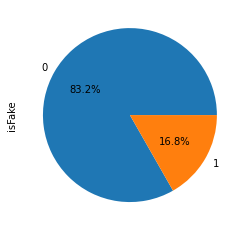

In [ ]:
dataset1['isFake'].value_counts().plot.pie(autopct="%1.1f%%")

## Data exploration - Dataset1

Si visualizzano le distribuzioni delle variabili continue del dataset.

Text(0.5, 0, 'characters')

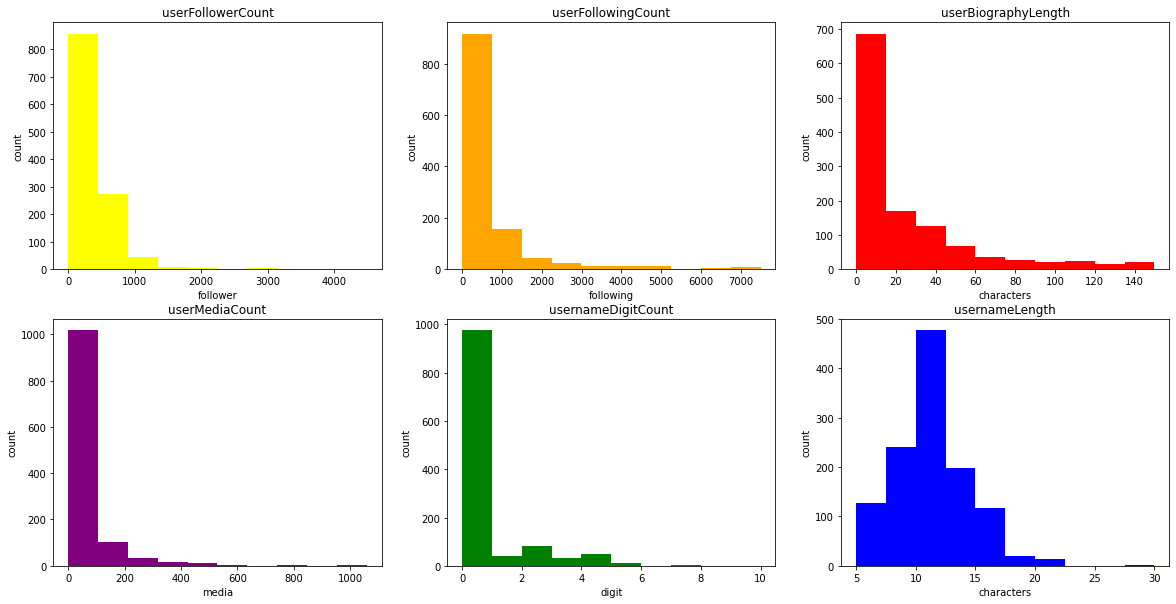

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title("userFollowerCount")
plt.hist(dataset1["userFollowerCount"], color="yellow")
plt.ylabel("count")
plt.xlabel("follower")

plt.subplot(2,3,2)
plt.title("userFollowingCount")
plt.hist(dataset1["userFollowingCount"], color="orange")
plt.ylabel("count")
plt.xlabel("following")

plt.subplot(2,3,3)
plt.title("userBiographyLength")
plt.hist(dataset1["userBiographyLength"], color="red")
plt.ylabel("count")
plt.xlabel("characters")

plt.subplot(2,3,4)
plt.title("userMediaCount")
plt.hist(dataset1["userMediaCount"], color="purple")
plt.ylabel("count")
plt.xlabel("media")

plt.subplot(2,3,5)
plt.title("usernameDigitCount")
plt.hist(dataset1["usernameDigitCount"], color="green")
plt.ylabel("count")
plt.xlabel("digit")

plt.subplot(2,3,6)
plt.title("usernameLength")
plt.hist(dataset1["usernameLength"], color="blue")
plt.ylabel("count")
plt.xlabel("characters")


Dall'istogramma si osserva che la maggior parte degli account ha un numero di follower e following minore di 1000, un numero di post minore di 100 e la lunghezza dell'username compresa tra 10 e 15. Si rappresentano ora i dati con potblox.  

Text(0, 0.5, 'characters')

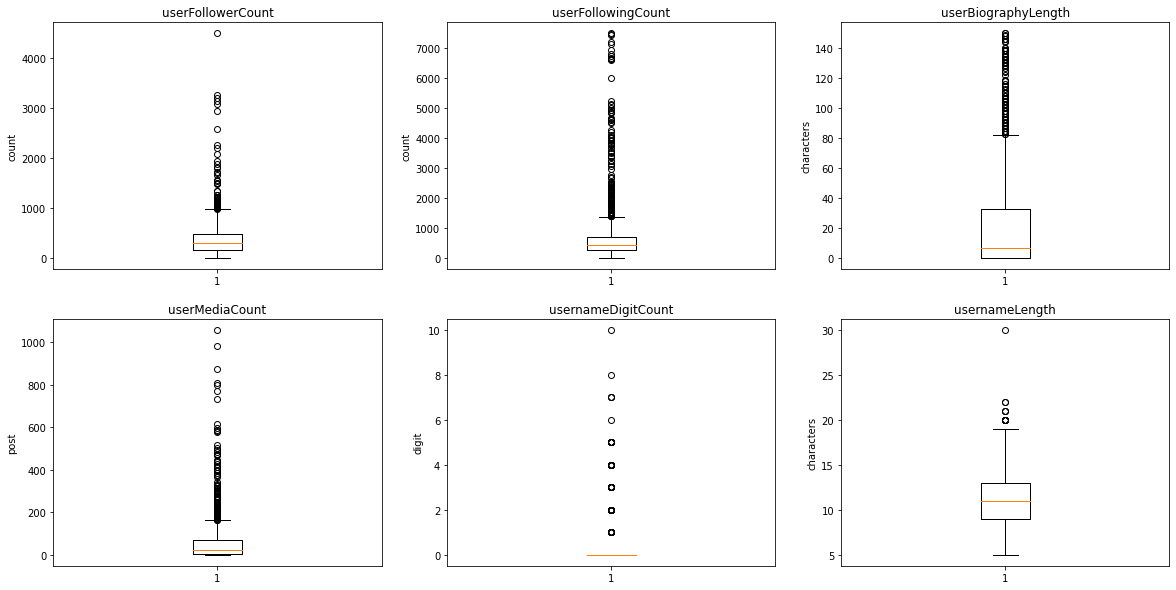

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title("userFollowerCount")
plt.boxplot(dataset1["userFollowerCount"])
plt.ylabel("count")

plt.subplot(2,3,2)
plt.title("userFollowingCount")
plt.boxplot(dataset1["userFollowingCount"])
plt.ylabel("count")

plt.subplot(2,3,3)
plt.title("userBiographyLength")
plt.boxplot(dataset1["userBiographyLength"])
plt.ylabel("characters")

plt.subplot(2,3,4)
plt.title("userMediaCount")
plt.boxplot(dataset1["userMediaCount"])
plt.ylabel("post")

plt.subplot(2,3,5)
plt.title("usernameDigitCount")
plt.boxplot(dataset1["usernameDigitCount"])
plt.ylabel("digit")

plt.subplot(2,3,6)
plt.title("usernameLength")
plt.boxplot(dataset1["usernameLength"])
plt.ylabel("characters")


## Esplorazione relazioni tra features - Dataset1

Per esperienza, si può dire che, a condizionare se un profilo è fake o meno sono principalmente i parametri: numero di seguiti/seguaci e numero di post. Vediamo in che modo, al variare di queste features, sono distribuiti i profili fake e reali.

Partiamo da *userFollowingCount*.

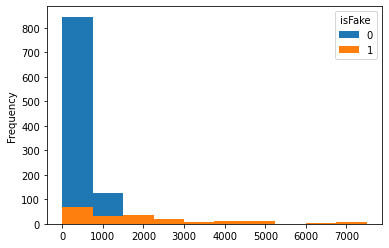

In [ ]:
dataset1.pivot(columns="isFake")["userFollowingCount"].plot.hist()

Dal grafico si evince che gli account fake (quelli in arancione) hanno un numero più alto di seguiti (in blu): questa cosa è alquanto intuitiva, dal momento che vengono solitamente creati per "seguire" chi compra followers. Si provi a vedere il numero medio di seguiti di un account fake e non.

In [ ]:
dataset1[dataset1["isFake"]==0]["userFollowingCount"].mean()

516.138832997988

In [ ]:
dataset1[dataset1["isFake"]==1]["userFollowingCount"].mean()

1878.03

I risultati confermamo quanto sospettato: si vede che la media dei seguiti dei profili fake è più del doppio dei reali.

Osserviamo ora *userFollowerCount*: quello che ci si aspetta è che il numero di seguaci degli account reali è maggiore di quelli fake.



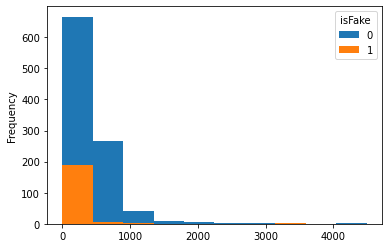

In [ ]:
dataset1.pivot(columns="isFake")["userFollowerCount"].plot.hist()

In [ ]:
dataset1[dataset1["isFake"]==0]["userFollowerCount"].mean()

419.8913480885312

In [ ]:
dataset1[dataset1["isFake"]==1]["userFollowerCount"].mean()

116.64

La previsione era esatta: gli account reali sono seguiti quasi 4 volte in più dei fake. Dunque, appare evidente che le variabili *userFollowingCount* e *userFollowerCount* sono rilevanti ai fini della modellazione, come si vedrà nei passi successivi
.

Nel seguente dizionario viene associato un colore ad ogni classe. **Gli account falsi verranno rappresentati dal colore rosso, quelli veri dal blu.**

In [ ]:
account_color_map ={0:"blue", 1:"red"}
account_colors= dataset1["isFake"].map(account_color_map)

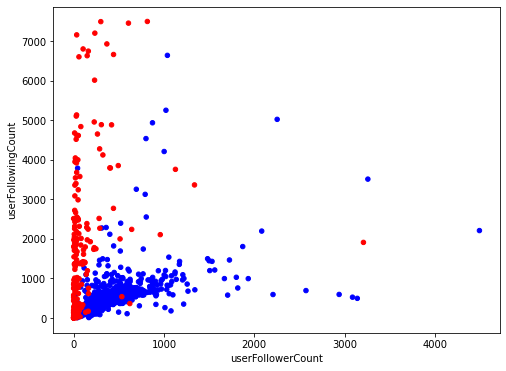

In [ ]:
dataset1.plot.scatter("userFollowerCount", "userFollowingCount", c=account_colors, figsize=(8,6))

Dal grafico si evince che gli account falsi, concentrati a sinistra, hanno pochi seguiti e molti seguaci, al contrario di quelli veri.

Si prova adesso ad osservare un'altra variabile *userHasProfilPic*: ci si aspetta che la maggior parte di account che non hanno la foto sono fake, quelli che la hanno sono reali. Visualizziamo la distribuzione di questa feature nel grafico. 

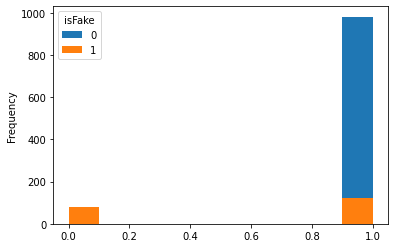

In [ ]:
dataset1.pivot(columns="isFake")["userHasProfilPic"].plot.hist()

Come sospettato, tutti gli account reali hanno una foto profilo, mentre, tra i fake, solo una metà la ha.


## Signficato delle feature - Dataset2

In [ ]:
dataset2.head()

profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.33               1                  0.33   
1            1                  0.00               5                  0.00   
2            1                  0.00               2                  0.00   
3            1                  0.00               1                  0.00   
4            1                  0.50               1                  0.00   

   name==username  description length  external URL  private  #posts  \
0               1                  30             0        1      35   
1               0                  64             0        1       3   
2               0                  82             0        1     319   
3               0                 143             0        1     273   
4               0                  76             0        1       6   

   #followers  #follows  fake  
0         488       604     0  
1          35         6     0  
2         328       668     0  
3       14890      7369     0  
4         225       356     0

- **profile pic**: Indica se l'utente ha una foto profilo (1 = presente, 0 = assente)
- **nums/length username**: Il rapporto tra i numeri presenti nell username e la lunghezza totale dell'username
- **fullname words**: Il numero di parole presenti nel nome completo.
- **nums/length fullname**: Il rapporto tra i numberi presenti nel nome e la lunghezza totale del nome.
- **name == username**: Indica se il nome è identico allo username ( 1 = identico, 0 = diversi)
- **description length**: La lunghezza della descrizione presente nell'account
- **external URL**: Indica se è presente un URL esterno nella descrizione ( 1 = presente, 0 = assente)
- **private**: Indica se l' utente ha un profilo privato.
- **#posts**: Il numero di post
- **#followers**: Il numero di seguaci
- **#follows**: Il numero di profili seguiti
- **fake**: Indica se il profilio è fake ( 1 = fake, 0 = non fake)

In questo dataset, la variabile target è **fake** , binaria, che assume valore 1 se l'account è falso, altrimenti 0.

Per ottenere informazioni sulle features ( media, deviazione standard, distribuzione in termini di masssimi, minimi e percentili), si utilizza il metodo describe.

In [ ]:
dataset2.describe()

profile pic  nums/length username  fullname words  \
count   696.000000            696.000000      696.000000   
mean      0.711207              0.166609        1.475575   
std       0.453527              0.218964        1.076622   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.330000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length  external URL  \
count            696.000000      696.000000          696.000000    696.000000   
mean               0.042170        0.035920           23.412356      0.113506   
std                0.143664        0.186223           38.595721      0.317438   
min                0.000000        0.000000            0.000000      0.000000   
25%                0.000000        0.000000            0.000000      0.000000   
50%                0.000000        0.000000            0.000000      0.000000   
75%                0.000000        0.000000           35.000000      0.000000   
max                1.000000        1.000000          150.000000      1.000000   

          private       #posts    #followers     #follows       fake  
count  696.000000   696.000000  6.960000e+02   696.000000  696.00000  
mean     0.369253   103.244253  7.914991e+04   555.086207    0.50000  
std      0.482950   378.028168  8.428875e+05  1023.613869    0.50036  
min      0.000000     0.000000  0.000000e+00     0.000000    0.00000  
25%      0.000000     0.000000  4.200000e+01    61.000000    0.00000  
50%      0.000000     9.000000  1.655000e+02   252.000000    0.50000  
75%      1.000000    77.000000  6.930000e+02   601.750000    1.00000  
max      1.000000  7389.000000  1.533854e+07  7500.000000    1.00000

Dallo studio del dataset, si evince che:
- In media un account ha più seguiti che seguaci.
- Meno della metà degli account sono privati.
- Il numero di account fake e di account reali è lo stesso.
- Il numero di account che hanno il nome uguale all'username è molto basso.


Osserviamo già una sostanziale differenza dal dataset1: in questo secondo set, il numero medio di seguiti è molto più alto dei follows misurati nel dataset1. E' molto probabile, dunque, che per la realizzazione di questo secondo dataset siano stati considerati account di persone molto famose, come profili reali: ciò spiega l'alto numero di follower.

 Visualizziamo, in un grafico a torta, la percentuale di account fake (in arancione) e reali (in blu).

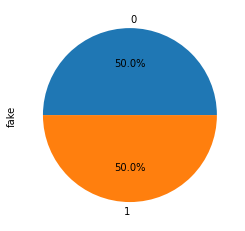

In [ ]:
dataset2['fake'].value_counts().plot.pie(autopct="%1.1f%%")

##Data exploration- dataset2

Si visualizzano le distribuzioni delle variabili continue del dataset

Text(0.5, 0, 'Number of follows')

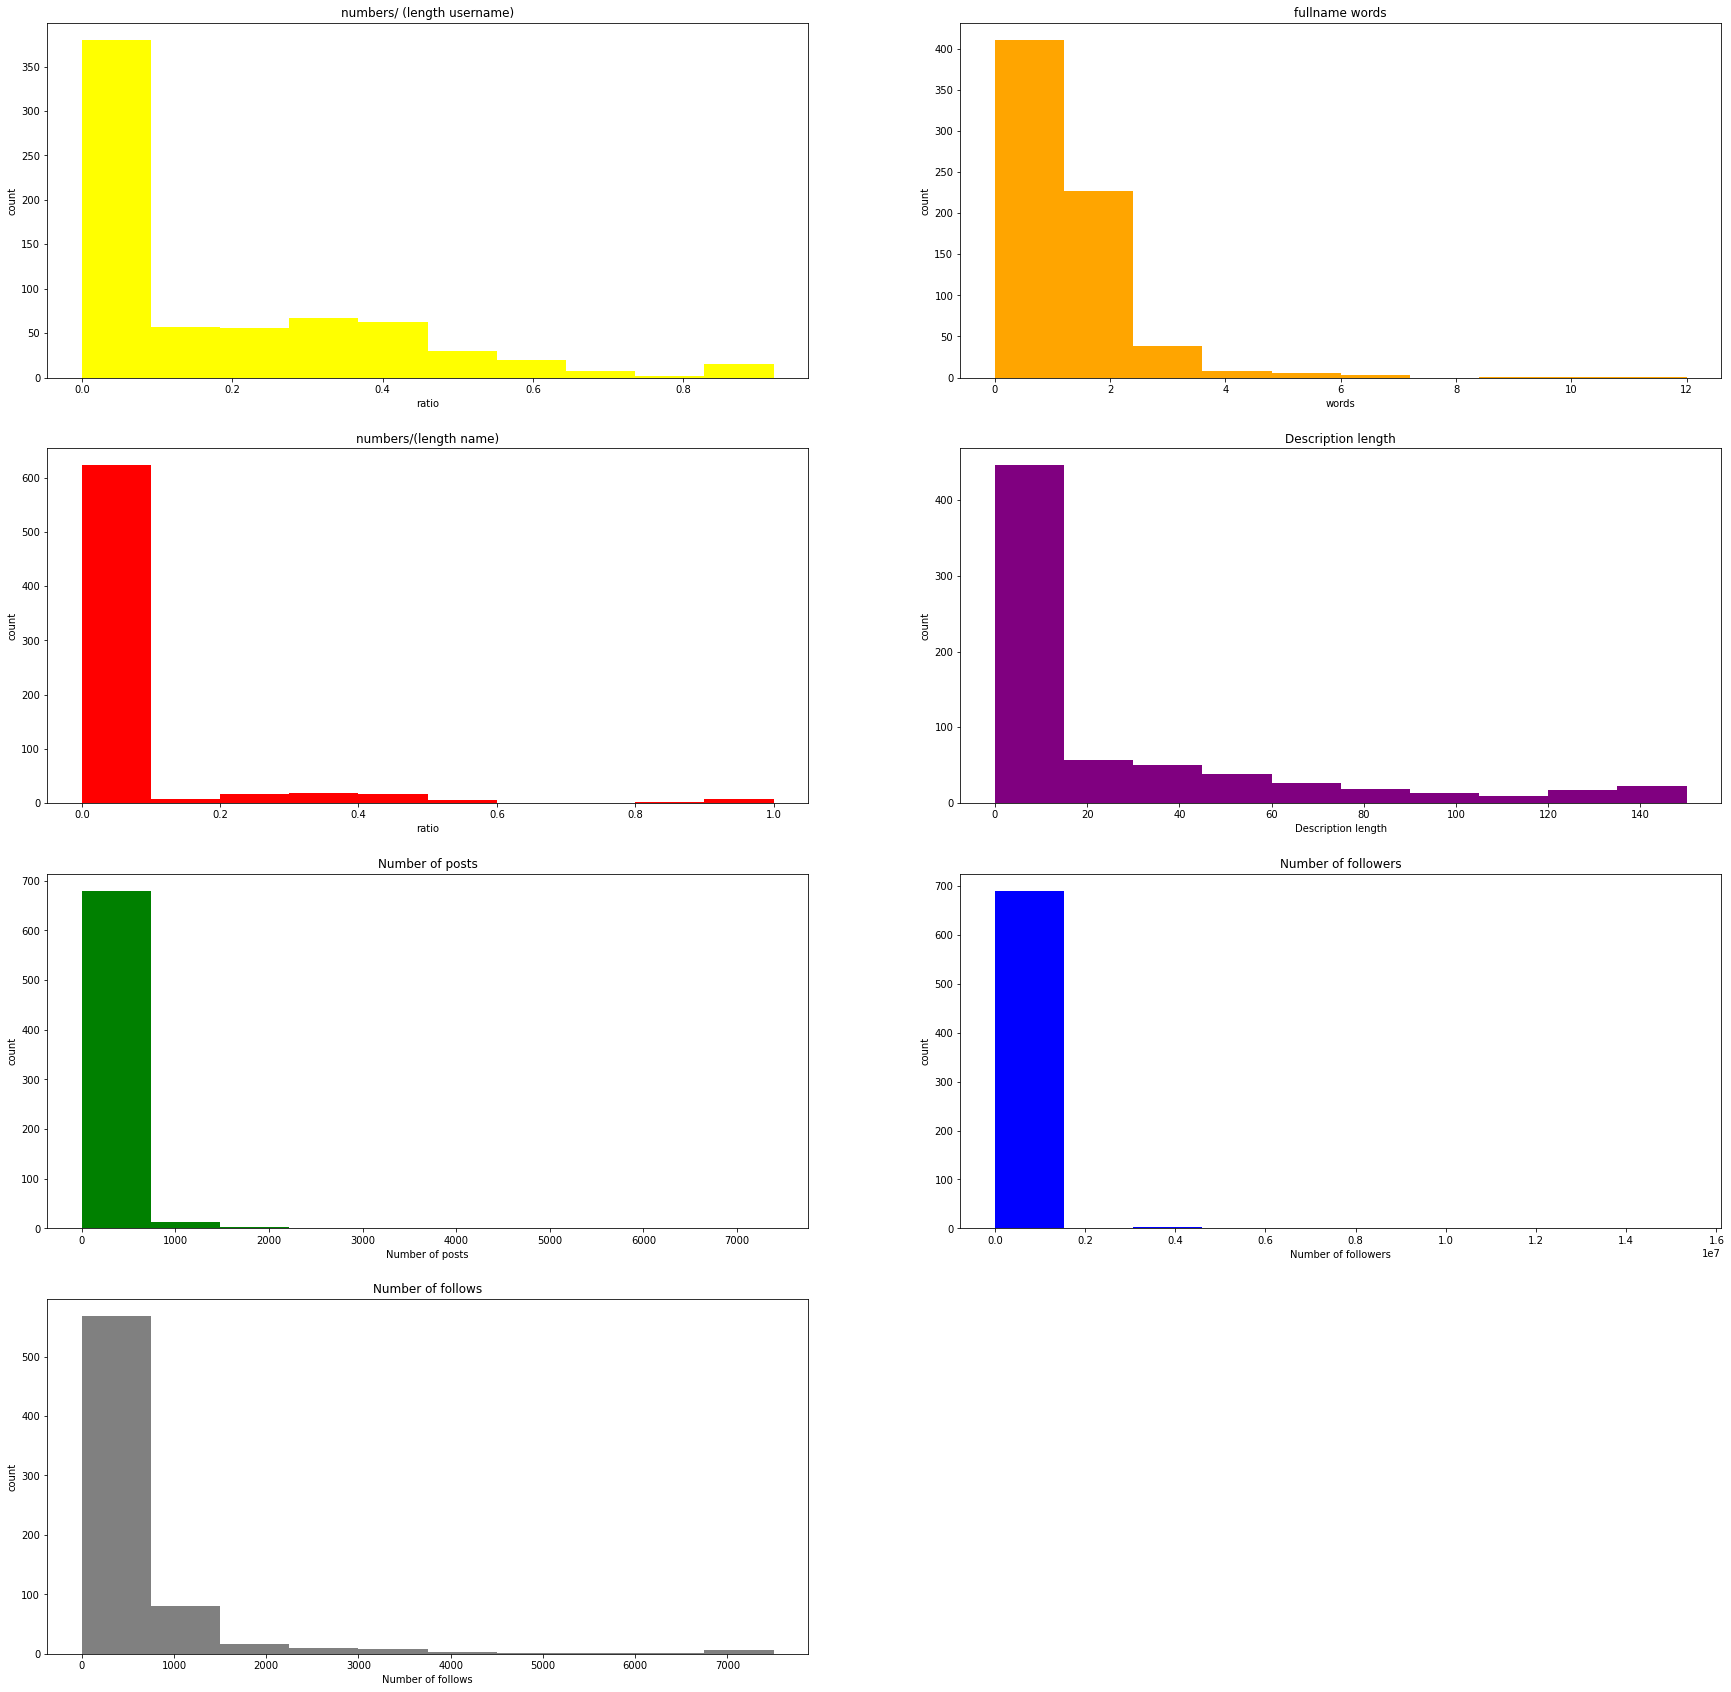

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(4,2,1)
plt.title("numbers/ (length username)")
plt.hist(dataset2["nums/length username"], color="yellow")
plt.ylabel("count")
plt.xlabel("ratio")

plt.subplot(4,2,2)
plt.title("fullname words")
plt.hist(dataset2["fullname words"], color="orange")
plt.ylabel("count")
plt.xlabel("words")

plt.subplot(4,2,3)
plt.title("numbers/(length name)")
plt.hist(dataset2["nums/length fullname"], color="red")
plt.ylabel("count")
plt.xlabel("ratio")

plt.subplot(4,2,4)
plt.title("Description length")
plt.hist(dataset2["description length"], color="purple")
plt.ylabel("count")
plt.xlabel("Description length")

plt.subplot(4,2,5)
plt.title("Number of posts")
plt.hist(dataset2["#posts"], color="green")
plt.ylabel("count")
plt.xlabel("Number of posts")

plt.subplot(4,2,6)
plt.title("Number of followers")
plt.hist(dataset2["#followers"], color="blue")
plt.ylabel("count")
plt.xlabel("Number of followers")

plt.subplot(4,2,7)
plt.title("Number of follows")
plt.hist(dataset2["#follows"], color="grey")
plt.ylabel("count")
plt.xlabel("Number of follows")

Dal grafico si puo osservare che ci sono più numeri nell'username che nel nome completo. Inoltre, la maggior parte degli account ha nome e descrizione composti da poche parole. Passiamo adesso ai boxplot.

Text(0, 0.5, 'Number of follows')

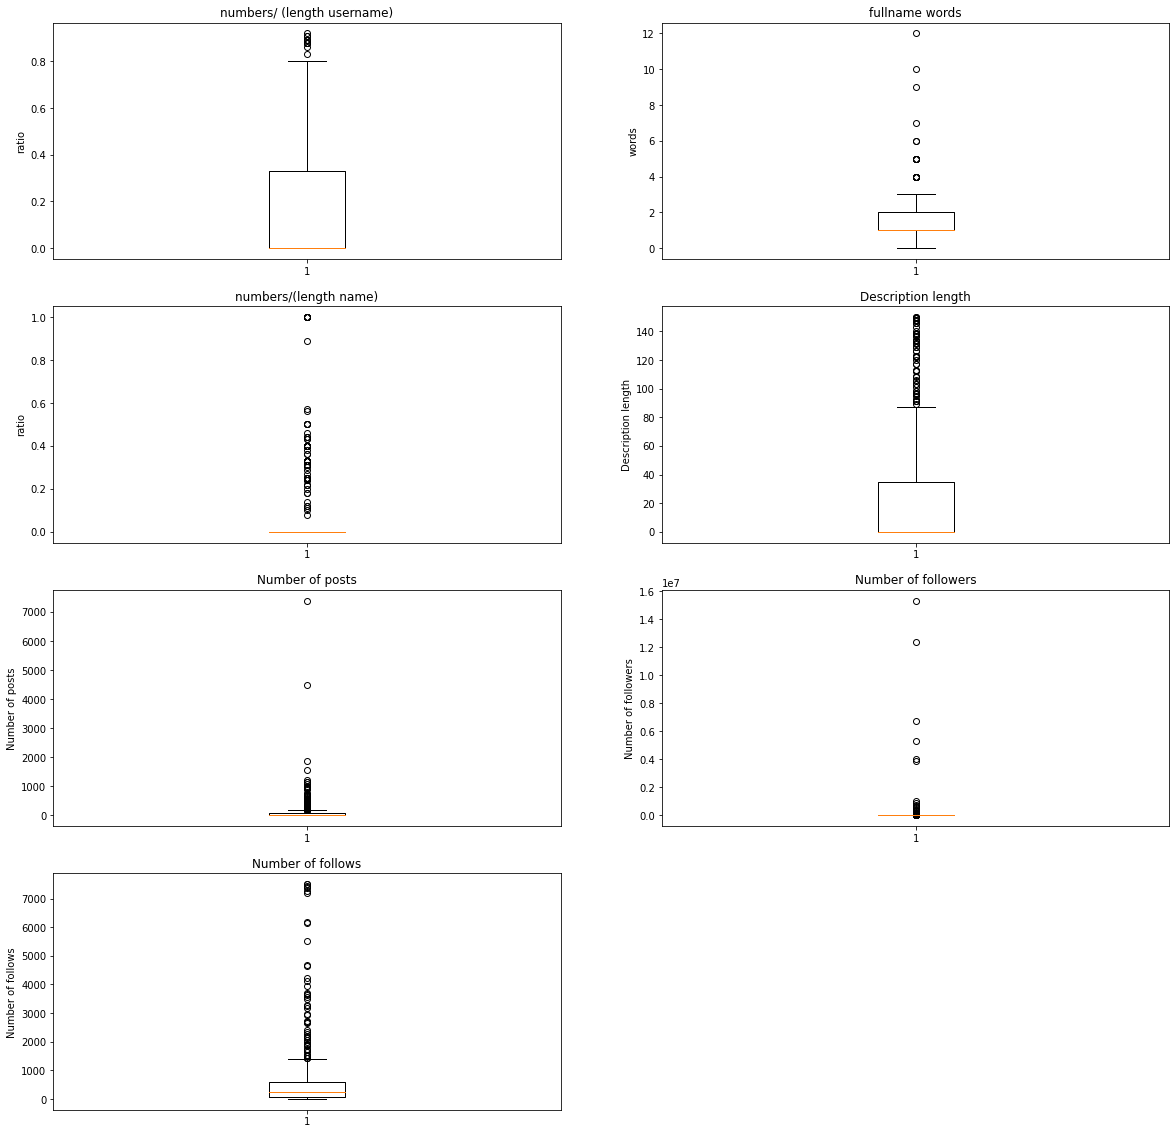

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
plt.title("numbers/ (length username)")
plt.boxplot(dataset2["nums/length username"])
plt.ylabel("ratio")

plt.subplot(4,2,2)
plt.title("fullname words")
plt.boxplot(dataset2["fullname words"])
plt.ylabel("words")

plt.subplot(4,2,3)
plt.title("numbers/(length name)")
plt.boxplot(dataset2["nums/length fullname"])
plt.ylabel("ratio")

plt.subplot(4,2,4)
plt.title("Description length")
plt.boxplot(dataset2["description length"])
plt.ylabel("Description length")

plt.subplot(4,2,5)
plt.title("Number of posts")
plt.boxplot(dataset2["#posts"])
plt.ylabel("Number of posts")

plt.subplot(4,2,6)
plt.title("Number of followers")
plt.boxplot(dataset2["#followers"])
plt.ylabel("Number of followers")

plt.subplot(4,2,7)
plt.title("Number of follows")
plt.boxplot(dataset2["#follows"])
plt.ylabel("Number of follows")

##Esplorazione relazioni tra features - Dataset2

Analizziamo alcune variabili e le loro relazioni con la variabile **fake**

**Profile pic**: osserviamo se la presenza di una foto profilo è più riccorrente negli account veri rispetto a quelli falsi

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff593b54110>,
      dtype=object)

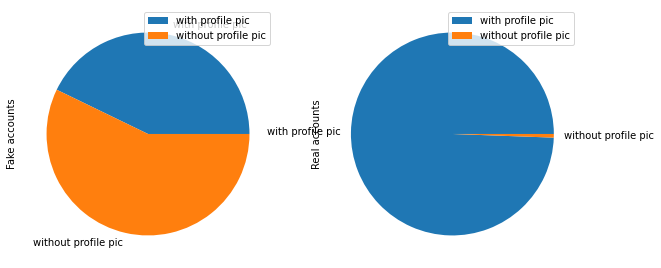

In [ ]:
fakeWithProfile = dataset2[(dataset2['fake'] == 1) & (dataset2['profile pic'] == 1)].shape[0]
fakeNoProfile = dataset2[(dataset2['fake'] == 1) & (dataset2['profile pic'] == 0)].shape[0]
realWithProfile = dataset2[(dataset2['fake'] == 0) & (dataset2['profile pic'] == 1)].shape[0]
realNoProfile = dataset2[(dataset2['fake'] == 0) & (dataset2['profile pic'] == 0)].shape[0]

df = pd.DataFrame({'with profile pic':[fakeWithProfile, realWithProfile],
                   'without profile pic':[fakeNoProfile, realNoProfile]}, 
                  index=['Fake accounts','Real accounts'])
df.T.plot.pie(subplots=True, figsize=(10, 30))

Possiamo osservare che quasi tutti gli account veri hanno una foto profilo.
Negli account falsi la differenza non è cosi evidente. Si può dedurre che un account senza foto profilo all'interno di questo dataset quasi sicuramente sarà un account falso.

In [ ]:
print("Fake with no profile:" , fakeNoProfile)
print("Real with no profile:" , realNoProfile)
print("Fake probability:" , (fakeNoProfile / (fakeNoProfile + realNoProfile)) * 100, "%")

Fake with no profile: 199
Real with no profile: 2
Fake probability: 99.00497512437812 %


Possiamo notare che un account senza foto profilo all'interno del dataset ha una probabilità dell 99% di essere fake.

Si studia ora la feature **num / length username e fullname**. Ci si aspetta che, negli account falsi, i numeri nell'username/fullname sono maggiori rispetto agli account reali, essendo di solito generati randomicamente.



Etichettiamo in **blu gli account veri** e in **rosso quelli falsi**

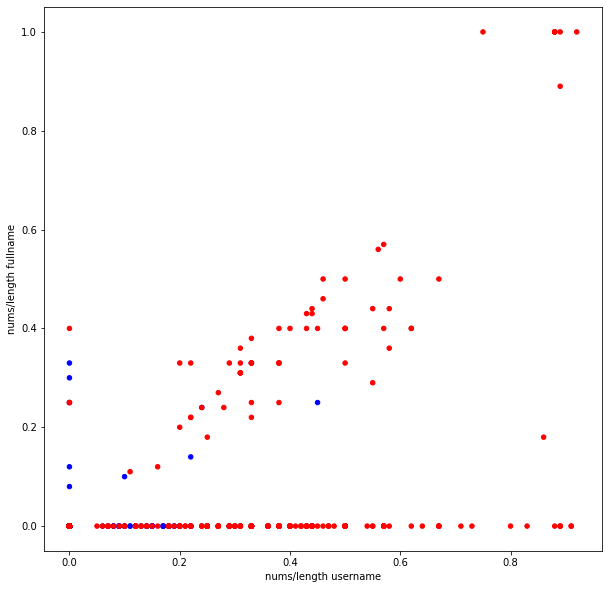

In [ ]:
account_color_map ={0:"blue", 1:"red"}
account_colors= dataset2["fake"].map(account_color_map)

dataset2.plot.scatter("nums/length username", "nums/length fullname", c=account_colors, figsize=(10,10))

Dal grafico osserviamo, come previsto, che la maggior parte degli account che hanno più numeri nel nome e nello username sono falsi. Si nota inoltre che la presenza di numeri nello username è molto più ricorrente rispetto al nome completo. Questo comporta una scarsa importanza dell'attributo *nums/length fullname* al fine di distunguere account veri e falsi.

**Follows and followers number**: Confrontiamo la correlazione tra numero di follower e di follows tra account reali e account falsi. Ci aspettiamo che quelli falsi abbiano un numero di seguiti maggiore rispetto ai seguaci.



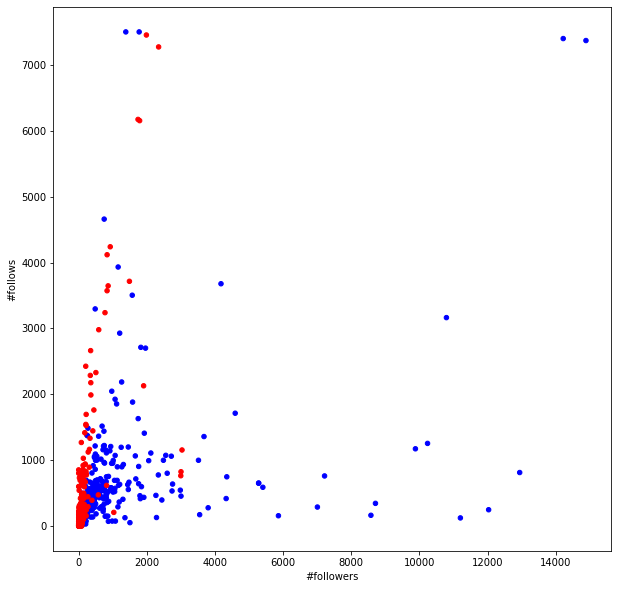

In [ ]:
tmp = dataset2[dataset2["#followers"] < 15000]

tmp.plot.scatter("#followers", "#follows", c=tmp["fake"].map(account_color_map), figsize=(10,10))

Come previsto, gli account falsi hanno un un numero maggiore di follows e pochi followers. Negli account veri si nota il contrario, tranne per alcune eccezioni dove  il numero di followers é molto elevato (probabilmente si tratta di account molto famosi). Queste eccezioni sono state escluse dal grafico per facilitarne la visualizzazione.

**#posts**: Analizziamo il numero di post effettuati dagli account. Ci aspettiamo che gli account falsi abbiano effettuatuo un numero basso di post rispetto agli account veri.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff595232d50>],
      dtype=object)

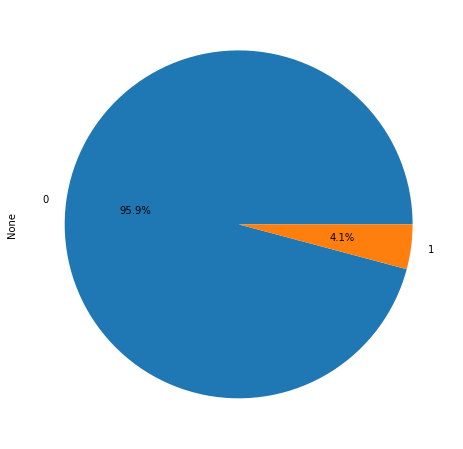

In [ ]:
dataset2.pivot(columns='fake')["#posts"].sum().plot.pie(autopct="%1.1f%%",subplots='true',
            figsize=(8,8))

In effetti, considerando che nel dataset sono presenti lo stesso numeri di account veri e falsi, notiamo che soltanto il 4% dei post totali sono stati effettuati da account falsi.

In [ ]:
fakeMean = dataset2[dataset2["fake"] == True]["#posts"].mean()
realMean = dataset2[dataset2["fake"] == False]["#posts"].mean()


print("Media post account falsi",fakeMean)
print("Media post account veri",realMean)

Media post account falsi 8.568965517241379
Media post account veri 197.91954022988506


Notiamo anche come in media un account falso effettui circa 8 post, mentre un account vero circa 198

# PARTE 2

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import precision_score, recall_score, f1_score


Per osservare le variabili più rilevanti, dopo la divisione dei dati in input in training e validation set, si applica una regolarizzazione L1. Si sceglie, come modello, il Perceptron.

## Studio dataset1

Il set y rappresenta l'output, ovvero la sola feature *isFake* , nel set x ci sono tutte le altre feature

In [ ]:
y = dataset1["isFake"]
x = dataset1.drop(["isFake"], axis=1)

In [ ]:
X_pre_train, X_pre_val, y_pre_train, y_pre_val = train_test_split(
    x,
    y,
    test_size=1/3, random_state=42
)

Definiamo i metodi per fare il training del modello e calcolare lo score.

In [ ]:
def get_coefficients(model, index, model_name="model"):
    return pd.Series(model.named_steps[model_name].coef_[0], index=index)
    
def fit(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    f1_measure = f1_score( y_val,  model.predict(X_val), average="macro")
    print("F1_measure: ", f1_measure)


Si usano i dati divisi precedentemente, usando l'algoritmo Perceptron, per allineare un modello di classificazione. Il parametro *class_weight* permette di aumentare il peso degli errori nella classe con meno istanze (nel dataset1, la maggior parte delle istanze sono relative agli account reali). Come iperparametro *alpha* si è scelto quello che restituisce l'f1_measure maggiore.

In [ ]:
model_coeffs = []
i = 0

for alpha in np.logspace(-4, 0, 5):
    print("alpha {} :\n".format(alpha))
    model = Pipeline([("scaler", StandardScaler()), ("model",  Perceptron(random_state=42, penalty="l1", class_weight={1:5},alpha=alpha))
    ])
    fit(model, X_pre_train, y_pre_train, X_pre_val, y_pre_val)
    model_coeffs.append(get_coefficients(model, X_pre_train.columns))
    i += 1
    print("\n")

alpha 0.0001 :

F1_measure:  0.8170293930649973


alpha 0.001 :

F1_measure:  0.6863300085591044


alpha 0.01 :

F1_measure:  0.7033982511923689


alpha 0.1 :

F1_measure:  0.7716580608146872


alpha 1.0 :

F1_measure:  0.12719298245614033




In [ ]:
std_pen_model = Pipeline([("scaler", StandardScaler()), ("model",  Perceptron(random_state=42,penalty="l1", class_weight={1:5},alpha=0.0001))
    ])
fit(std_pen_model, X_pre_train, y_pre_train, X_pre_val, y_pre_val)

F1_measure:  0.8170293930649973


In [ ]:
std_pen_model_coeff = get_coefficients(std_pen_model, X_pre_train.columns, 'model')
std_pen_model_coeff

userFollowerCount     -18.271008
userFollowingCount     11.227746
userBiographyLength     0.000000
userMediaCount        -26.957048
userHasProfilPic       -3.775095
userIsPrivate           0.000000
usernameDigitCount      5.130855
usernameLength         -0.413539
dtype: float64

L'analisi rivela che le feature *userBiographyLength* e *userIsPrivate* sono irrilevanti. Al contrario, il numero di follower, following e post influenzano molto nella classificazione.

Successivamente viene mostrata una heat map che, utilizzando la **Correlazione di Pearson**, visualizza tutte le correlazioni tra features.

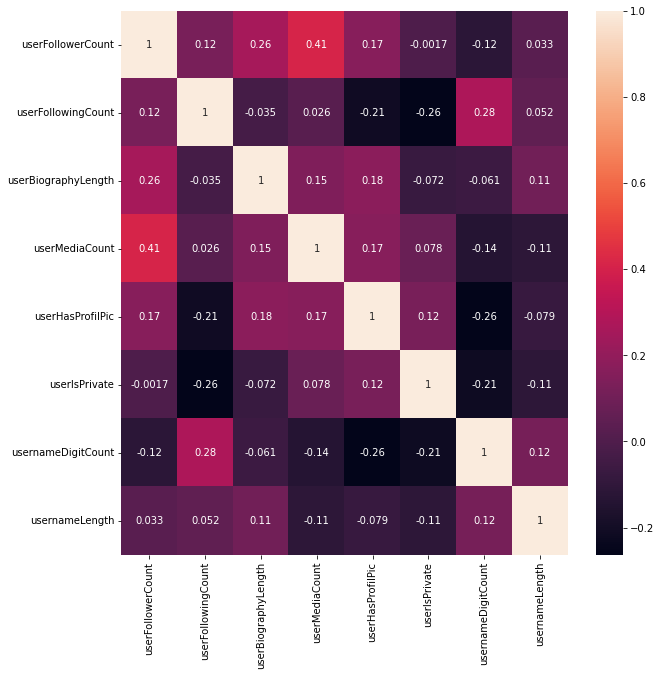

In [ ]:
pearson_correlation = X_pre_train.corr(method='pearson')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sb.heatmap(pearson_correlation, annot=True)

plt.show()

Dal grafico non si evidenziano correlazioni.

Nel grafico a dispersione sottostante vengono rappresentate, nelle tre dimensione, le feature più rilevanti: *userFollowingCount*, *userHasProfilPic* e *userMediaCount*. Osserviamo come, effettivamente, gli account fake (in rosso) e reali (in blu) si distribuiscono in maniera ben diversa: gli account fake hanno un alto numero di following, un numero di post quasi nullo e pochi follower. Al contrario, i reali tendono ad avere un numero di seguiti basso ma un alto numero di follower e post.

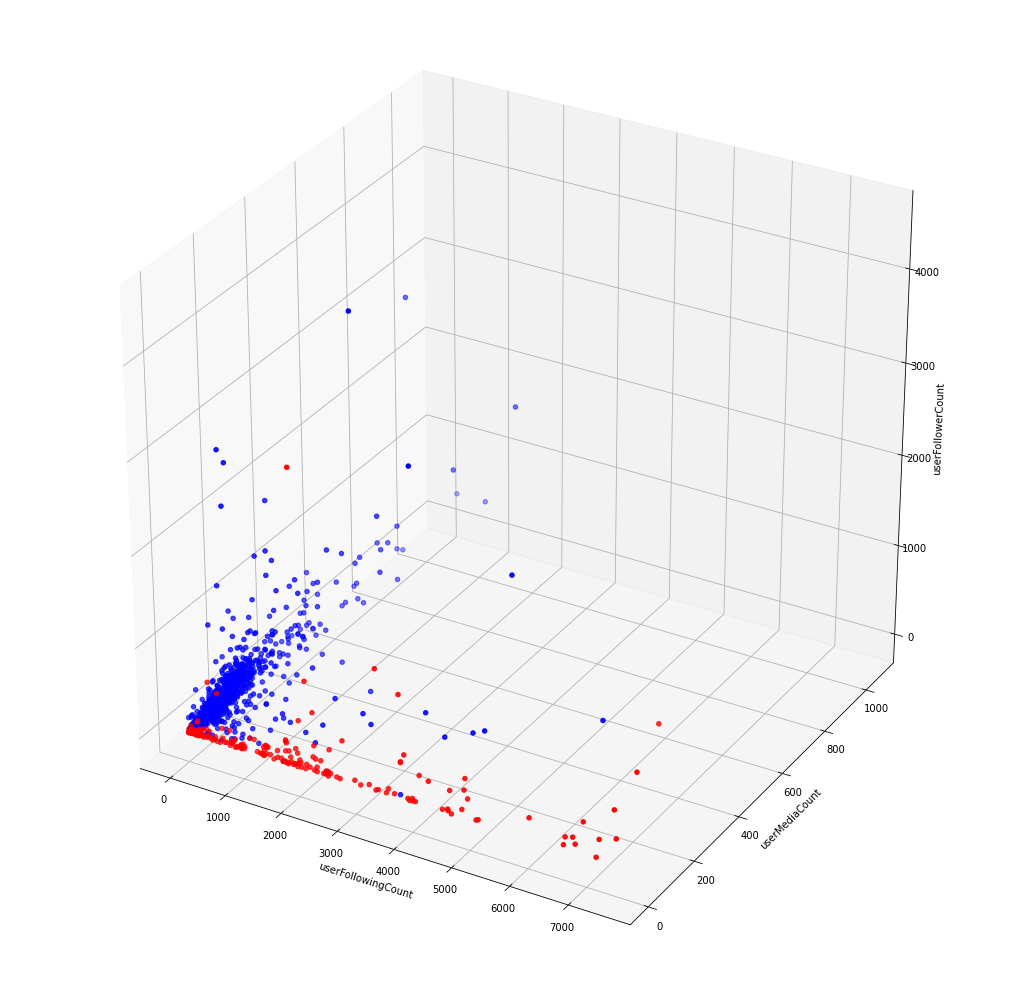

In [ ]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(projection='3d')
x = "userFollowingCount"
z = "userFollowerCount"
y = "userMediaCount"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
tmp = dataset1
account_colors= tmp["isFake"].map(account_color_map)

ax.scatter(tmp[x], tmp[y], tmp[z], c=account_colors)

## Studio dataset2

Per lo studio delle feature più irrilevanti, vengono eseguiti gli stessi procedimenti già visti nel dataset1.

In [ ]:
y2 =dataset2["fake"]
x2 = dataset2.drop(["fake"], axis=1)

In [ ]:
X_pre_train2, X_pre_val2, y_pre_train2, y_pre_val2 = train_test_split(
    x2,
    y2,
    test_size=1/3, random_state=42
)


In [ ]:
model_coeffs = []
i = 0

for alpha in np.logspace(-4, 0, 5):
    print("alpha {} :\n".format(alpha))
    model = Pipeline([("scaler", StandardScaler()), ("model",  Perceptron(random_state=42,penalty="l1", alpha=alpha))
    ])
    fit(model, X_pre_train2, y_pre_train2, X_pre_val2, y_pre_val2)
    model_coeffs.append(get_coefficients(model, X_pre_train2.columns))
    i += 1
    print("\n")

alpha 0.0001 :

F1_measure:  0.8832541235672351


alpha 0.001 :

F1_measure:  0.8515842552871227


alpha 0.01 :

F1_measure:  0.8558056314153875


alpha 0.1 :

F1_measure:  0.7858932102834542


alpha 1.0 :

F1_measure:  0.33524355300859593




In [ ]:
std_pen_model2 = Pipeline([
    ("scaler", StandardScaler()),

    ("model",  Perceptron(random_state=42, penalty="l1", alpha=0.0001))
])
fit(std_pen_model2, X_pre_train2, y_pre_train2, X_pre_val2, y_pre_val2)

F1_measure:  0.8832541235672351


In [ ]:
std_pen_coeff2 = get_coefficients(std_pen_model2, X_pre_train2.columns)
std_pen_coeff2

profile pic             -5.316305
nums/length username     5.220439
fullname words           0.487139
nums/length fullname    -0.184297
name==username           0.006764
description length      -1.561101
external URL            -2.158775
private                 -2.234697
#posts                  -7.439511
#followers             -18.860433
#follows                 0.291686
dtype: float64

Le variabili più influenti (come ci si aspettava, avendole già studiate nella parte 1) sono *#followers*, *#posts* e *profile pic*.

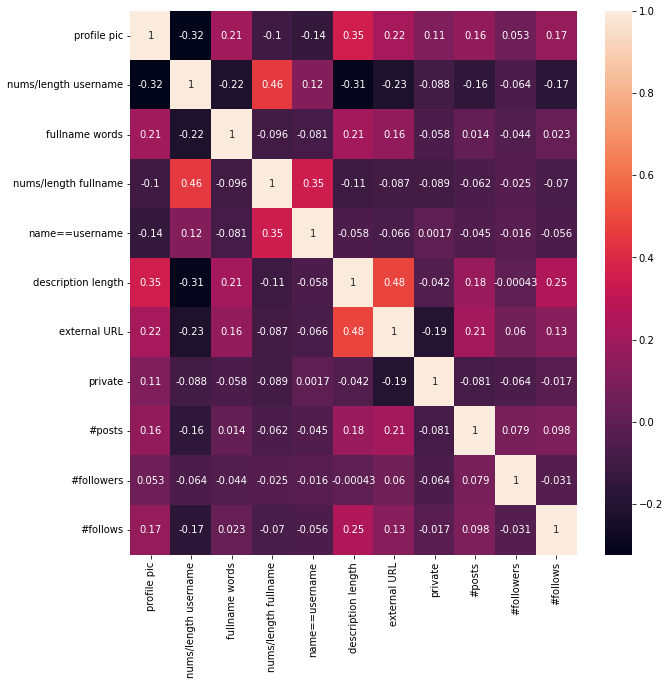

In [ ]:
pearson_correlation = X_pre_train2.corr(method='pearson')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sb.heatmap(pearson_correlation, annot=True)

plt.show()

Dal grafico non si evidenziano rilevanti correlazioni.

Per effettuare il confronto con il dataset1, sono stati realizzati i seguenti grafici a dispersione, disponendo, negli assi, le stesse features. A destra c'è il grafico realtivo al dataset1 (già rappresentato in precedenza), a sinistra c'è quello relativo al secondo dataset. Osservandoli, la distribuzione degli account fake e reali al variare delle stesse feature è molto simile.

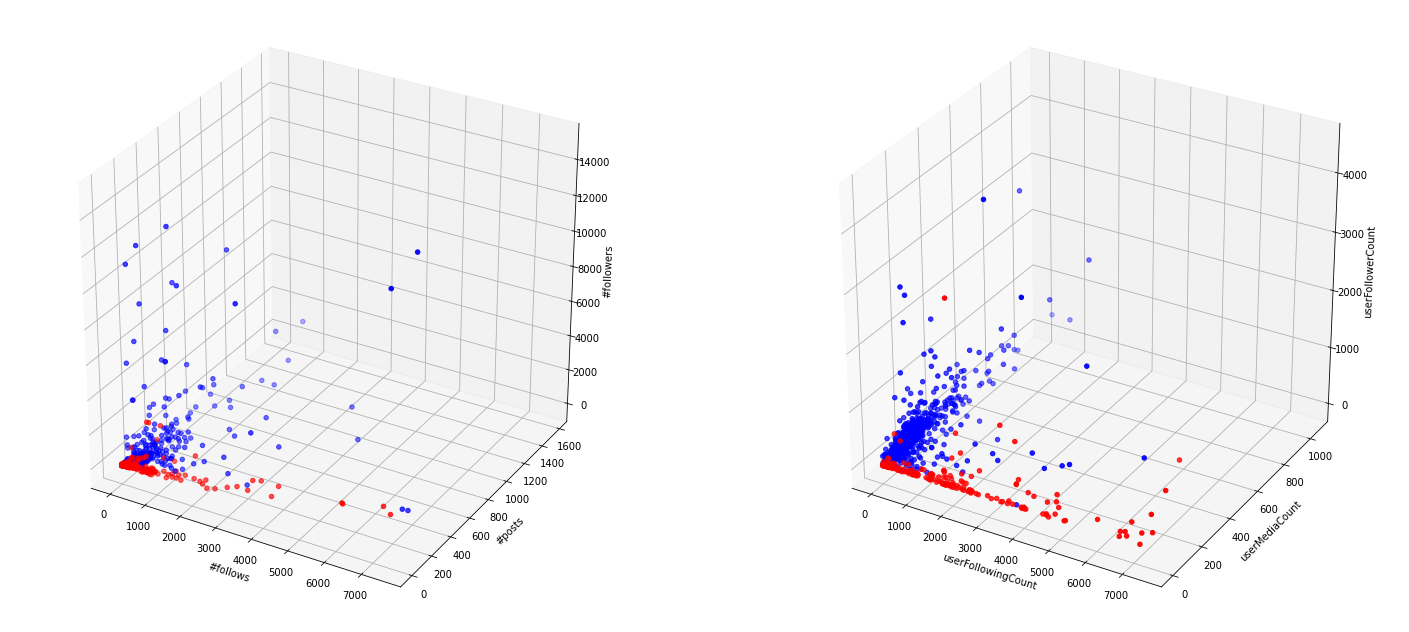

In [ ]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(2,2,1,projection='3d')
x = "#follows"
z = "#followers"
y = "#posts"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
tmp = dataset2[dataset2["#followers"] < 15000]
account_colors= tmp["fake"].map(account_color_map)
ax.scatter(tmp[x], tmp[y], tmp[z], c=account_colors)

ax = fig.add_subplot(2,2,2,projection='3d')
x = "userFollowingCount"
z = "userFollowerCount"
y = "userMediaCount"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
tmp = dataset1
account_colors= tmp["isFake"].map(account_color_map)

ax.scatter(tmp[x], tmp[y], tmp[z], c=account_colors)

# PARTE 3

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


La seguente funziona confronta il modello con i diversi iperparametri e ritorna il modello che ha restituito la f1_measure migliore. 

In [ ]:
from sklearn.utils import class_weight
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
models = {}

def print_k_cross_validation_scores(model, X, y, kf):
    scores = cross_val_score(model, X, y, cv=kf)
    print("            Scores: {}\n              Mean: {}\nStandard deviation: {}".format(scores, scores.mean(), scores.std()))

def grid_search_with_cross_validation(model, grid, kf, dataset, class_attribute, scoring=None):
    grid_search = GridSearchCV(model, grid, scoring=scoring, cv=kf, n_jobs=-1)

    X_train, X_val, y_train, y_val = train_test_split(
        dataset.drop([class_attribute], axis=1),
        dataset[class_attribute],
        test_size=1/3, random_state=42
    )

    grid_search.fit(X_train, y_train)
    
    score = grid_search.score(X_val, y_val)

    print("Best cross validation score: {}\n".format(grid_search.best_score_))
    print("             Test set score: {}\n".format(score))
    print("                Best params: {}\n".format(grid_search.best_params_))
    print("             Best estimator: {}\n".format(grid_search.best_estimator_))
    return grid_search.best_estimator_, score
    #print(pd.DataFrame(grid_search.cv_results_))


Le seguenti funzioni verrranno usate per graficare i modelli, per ogni combinazione di features.

In [ ]:
def separator_2d(model, x1, nameModel, m, n):
    # ricaviamo w e b dal modello
    w = model.named_steps[nameModel].coef_[0]
    b = model.named_steps[nameModel].intercept_
    return -x1 * w[m] / w[n] - b / w[n]

In [ ]:
def separator_3d(model, x1,y1, nameModel, i,j,t):
    # ricaviamo w e b dal modello
    w = model.named_steps[nameModel].coef_[0]
    b = model.named_steps[nameModel].intercept_
    return ((-x1 * w[i]) / w[t]) -((y1* w[j])/w[t]) - (b / w[t])

In [ ]:
def draw_line(model, nameModel, i, j, color):
    xlim, ylim = plt.xlim(), plt.ylim()
    sep_x = np.linspace(*xlim, 2)
    sep_y = separator_2d(model, sep_x, nameModel, i , j)
    plt.plot(sep_x, sep_y, c=color, linewidth=2, label=nameModel)
    plt.xlim(xlim); plt.ylim(ylim)


def plot_separator_on_data(X, y, dataset,avoidList, model=None, nameModel=None,
                           repeatCombination = True, newFig = True,
                           lineColor = "green"):
    X = np.array(X)
    n, m = X.shape
    colors = pd.Series(y).map(account_color_map)
    if(newFig):
      plt.figure(figsize=(50, 50))
    k = 0
    for i in range(m): 
      g = 0 if repeatCombination else i+1
      for j in range(g,m):
        if(j!=i and i not in(avoidList) and j not in (avoidList)):
          k+=1
          plt.subplot(m, m, k)
          plt.scatter(X[:, i], X[:, j], c=colors)
          plt.xlabel(dataset.columns[i])
          plt.ylabel(dataset.columns[j])
          if model is not None:
            draw_line(model,nameModel, i, j, lineColor)
             

Di seguito viene definita una funzione che calcola tutti i dati utili per valutare un modello.
- Accuratezza: percentuale di classificazioni corrette (in caso di sbilanciamento tra classi, non molto utile)
- Precision: indica la percentuale di esempi classificati in una classe che sono realmente tali
- Recall: indica la percentuale di esempi realmente di una classe che sono stati classificati come tali
- F1-measure: media armonica tra precision e recall: misura unica della performance di un modello 

In [ ]:
def measureModel(x_val, y_val, y_pred, model):
  accuracy = model.score(x_val, y_val)
  precision_fake = precision_score(y_val, y_pred, pos_label=1)
  precision_real = precision_score(y_val, y_pred, pos_label=0)
  recall_fake = recall_score(y_val, y_pred, pos_label=1)
  recall_real = recall_score(y_val, y_pred, pos_label=0)
  f1_measure = f1_score(y_val, y_pred, average="macro")
  print("Accuracy: {}\n".format(accuracy))
  print("Precision fake: {}\n".format(precision_fake))
  print("Precision real: {}\n".format(precision_real))
  print("Recall fake: {}\n".format(recall_fake))
  print("Recall real: {}\n".format(recall_real))
  print("f1_measure: {}\n".format(f1_measure))

## Perceptron - Dataset1

Si utilizza il seguente metodo per ottenere la migliore combinazione di iperparametri sul metodo Perceptron, utilizzando il K-fold-cross-validation. Si usa il parametro *class_weight* per aumentare il peso degli errori nella classe con meno istanze.

In [ ]:
%%time

per_model = Pipeline([
    ("scaler", StandardScaler()),
    ("per", Perceptron(n_jobs=-1, random_state=42, class_weight={1:5}))
])

#print(per_model.get_params())

per_grid = {
    "scaler": [None, StandardScaler()],
    "per__penalty": ["l2", "l1", "elasticnet"],
    "per__alpha": np.logspace(-3, 3, 7),
    "per__fit_intercept": [False, True]
}

per_model, score = grid_search_with_cross_validation(per_model, per_grid, k_fold, dataset1, "isFake", scoring = "f1_macro")
models["Perceptron1"] = {"Model": per_model, "Score": score}


Best cross validation score: 0.8790868708729432

             Test set score: 0.8974169328178405

                Best params: {'per__alpha': 0.1, 'per__fit_intercept': False, 'per__penalty': 'l1', 'scaler': None}

             Best estimator: Pipeline(steps=[('scaler', None),
                ('per',
                 Perceptron(alpha=0.1, class_weight={1: 5}, fit_intercept=False,
                            n_jobs=-1, penalty='l1', random_state=42))])

CPU times: user 996 ms, sys: 49 ms, total: 1.04 s
Wall time: 4.08 s


In [ ]:
model = Pipeline(steps=[('scaler', None),
                ('per',
                 Perceptron(alpha=0.1, class_weight={1: 5}, fit_intercept=False,
                            n_jobs=-1, penalty='l1', random_state=42))])
model.fit(X_pre_train, y_pre_train)

f1_measure = f1_score( y_pre_val,  model.predict(X_pre_val), average="macro")
models["Perceptron1"] = {"Model": model, "Score": f1_measure}



In [ ]:
y_pred = model.predict(X_pre_val)
measureModel(X_pre_val, y_pre_val, y_pred, model)

Accuracy: 0.9422110552763819

Precision fake: 0.7272727272727273

Precision real: 0.9937694704049844

Recall fake: 0.9655172413793104

Recall real: 0.9382352941176471

f1_measure: 0.8974169328178405



Il valore più basso tra quelli osservati è la precision degli account fake, ovvero la percentuale di account predetti come falsi che erano veramente falsi. Si osserva inoltre che la precision degli account reali è molto alta. La recall, ovvero la percentuale di account predetti correttamente sui totali, è alta in entrambe le classi.

Successivamente, si visualizzano i valori dei coefficienti a seguito dell'applicazione del modello. A causa della regolarizzazione L1, delle variabili hanno assunto valore nullo. Se andassimo a graficare, la retta non sarebbe visibile a causa della divisione per zero. Dunque, viene creato un array *not draw* che contiene l'indice dei coefficienti da non rappresentare. Questo procedimento verrà eseguito anche nei successivi modelli.

In [ ]:
print(model.named_steps["per"].coef_)
print(model.named_steps["per"].intercept_)

[[-14116.6   6523.6      0.  -29373.6      0.       0.     245.6      0. ]]
[0.]


In [ ]:
not_draw = [2,4, 5, 7]

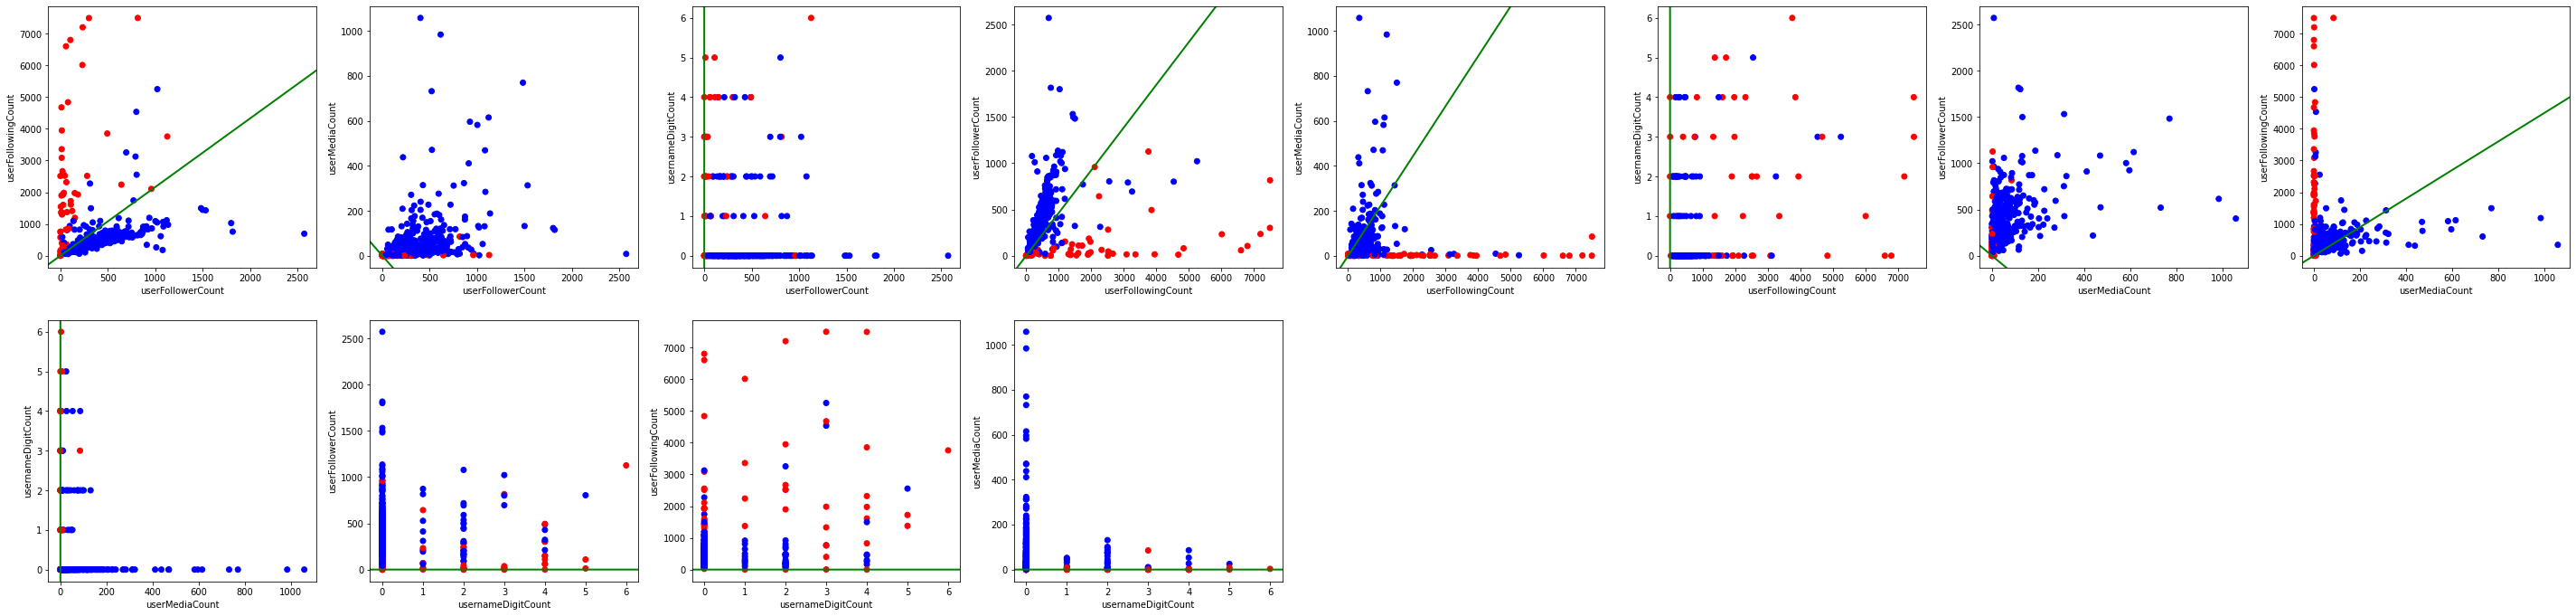

In [ ]:
plot_separator_on_data(X_pre_val, y_pre_val, dataset1,not_draw,model, "per")

## Perceptron - Dataset2

Si applica il Perceptron al dataset2 : in questo caso non si usa il parametro *class_weight* poichè le due classi sono perfettamente equilibrate.

In [ ]:
%%time

per_model = Pipeline([
    ("scaler", StandardScaler()),
    ("per", Perceptron(n_jobs=-1, random_state=42))
])

#print(per_model.get_params())

per_grid = {
    "scaler": [None, StandardScaler()],
    "per__penalty": ["l2", "l1", "elasticnet"],
    "per__alpha": np.logspace(-3, 3, 7),
    "per__fit_intercept": [False, True]
}

per_model, score = grid_search_with_cross_validation(per_model, per_grid, k_fold, dataset2, "fake", scoring = "f1_macro")
models["Perceptron2"] = {"Model": per_model, "Score": score}

Best cross validation score: 0.8834419549801138

             Test set score: 0.9003268889511533

                Best params: {'per__alpha': 0.001, 'per__fit_intercept': True, 'per__penalty': 'elasticnet', 'scaler': StandardScaler()}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.001, n_jobs=-1, penalty='elasticnet',
                            random_state=42))])

CPU times: user 890 ms, sys: 3.3 ms, total: 894 ms
Wall time: 2.93 s


In [ ]:
model2 = Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.001, n_jobs=-1, penalty='elasticnet',
                            random_state=42))])
model2.fit(X_pre_train2, y_pre_train2)
f1_measure = f1_score( y_pre_val2,  model2.predict(X_pre_val2), average="macro")

models["Perceptron2"] = {"Model": model2, "Score": f1_measure}

In [ ]:
y_pred2 = model2.predict(X_pre_val2)
measureModel(X_pre_val2, y_pre_val2, y_pred2, model2)

Accuracy: 0.9008620689655172

Precision fake: 0.96

Precision real: 0.8560606060606061

Recall fake: 0.8347826086956521

Recall real: 0.9658119658119658

f1_measure: 0.9003268889511533



Si nota che la precision degli account fake è molto alta, quello dei reali è più bassa (al contrario di come accadeva nel dataset1). Viceversa, la recall dei reali è più alta di quelli fake.

In [ ]:
model2.named_steps["per"].coef_

array([[-4.88904508,  5.24656688, -2.14208346,  0.        ,  1.51284663,
        -0.55310358, -2.70165384,  0.        , -3.21546777, -0.05327954,
        -2.90658207]])

Le feature che non verranno visualizzate nel grafico (perchè con la regolarizzazione sono azzerate) sono: *nums/length fullname* e *private*.
Inoltre anche la feature **#followers** non verrá visualizzata a causa della sua notevole differenza di grandezza rispetto al resto delle feature.

In [ ]:
not_draw = [3,7,9]

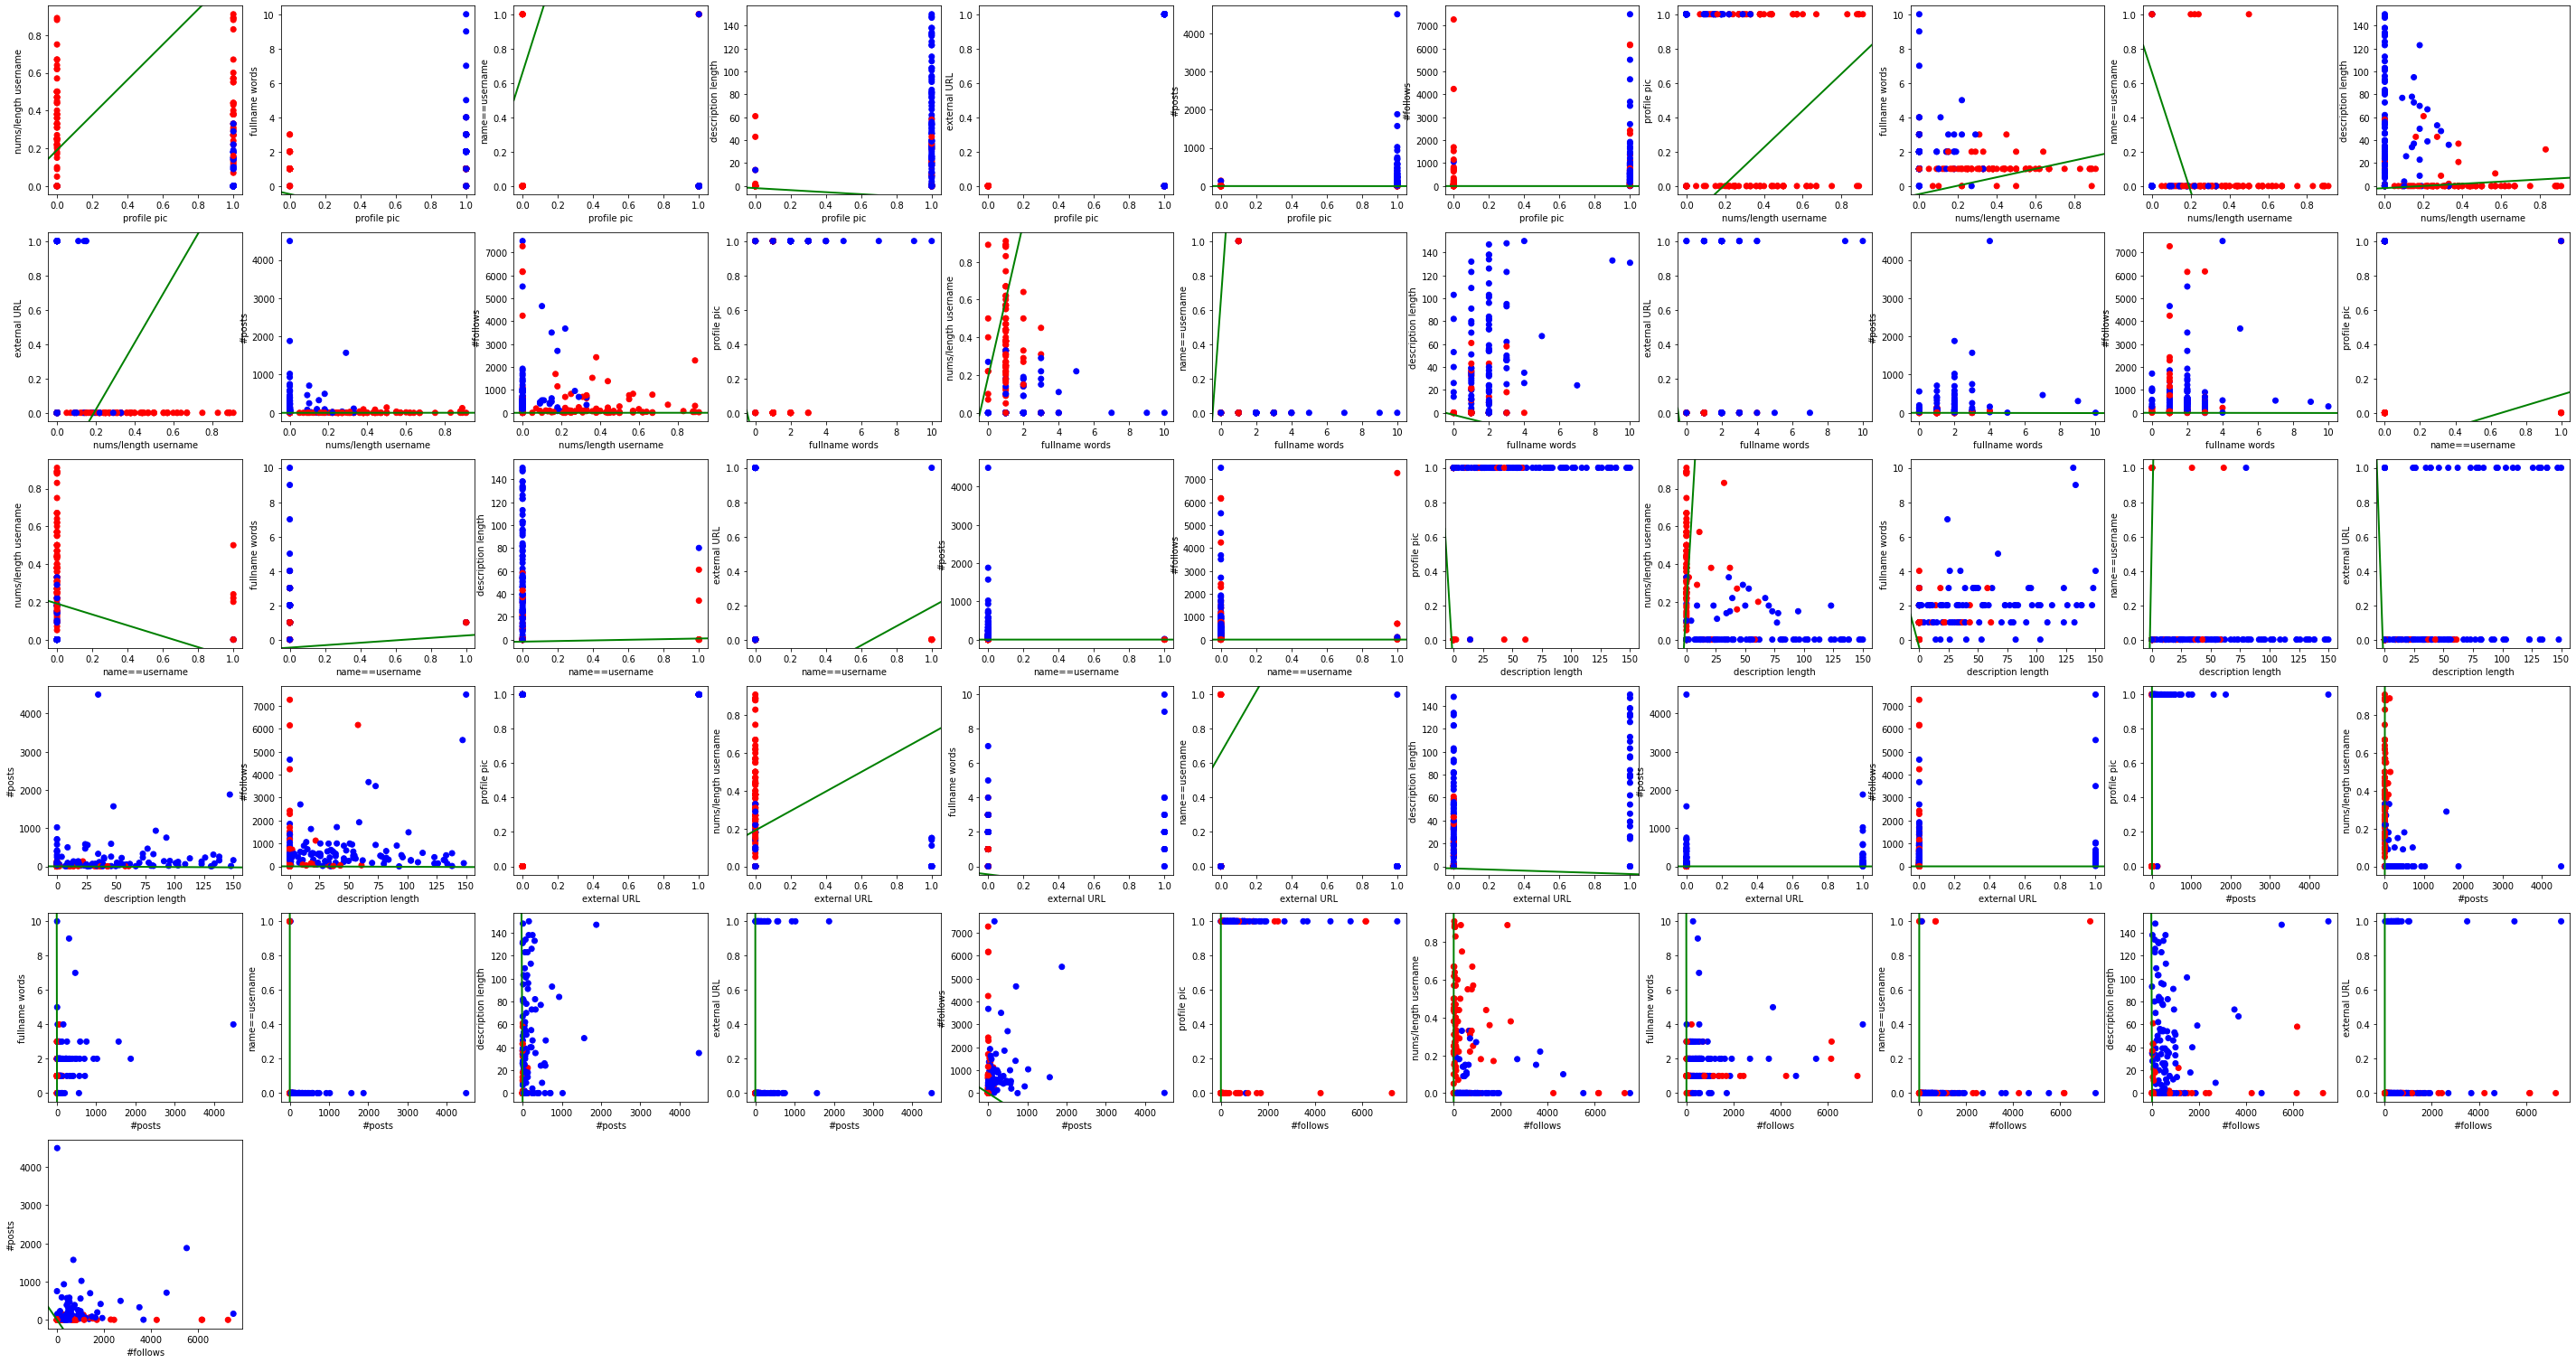

In [ ]:
plot_separator_on_data(X_pre_val2, y_pre_val2, dataset2 ,not_draw, model2, "per")

## Regressione Logistica - Dataset1

Si passa ora a studiare la regressione logistica. I procedimenti sono gli stessi visti per il Perceptron.

In [ ]:
%%time

log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver='liblinear', class_weight={1:5}, random_state=42))
])

#print(log_model.get_params())

log_grid = {
    "scaler": [None, StandardScaler()],
    "lr__penalty": ["l2", "l1"],
    "lr__C": np.logspace(-4, 2, 7),
    "lr__fit_intercept": [False, True]
}

log_model, score = grid_search_with_cross_validation(log_model, log_grid, k_fold, dataset1,"isFake", scoring = "f1_macro")
models["Logistic Regression1"] = {"Model" : log_model, "Score": score}

Best cross validation score: 0.8958052613795898

             Test set score: 0.9069049401197605

                Best params: {'lr__C': 0.001, 'lr__fit_intercept': False, 'lr__penalty': 'l1', 'scaler': None}

             Best estimator: Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(C=0.001, class_weight={1: 5},
                                    fit_intercept=False, penalty='l1',
                                    random_state=42, solver='liblinear'))])

CPU times: user 661 ms, sys: 12.5 ms, total: 673 ms
Wall time: 2.38 s


In [ ]:
log_model = Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(C=0.001, class_weight={1: 5},penalty="l1",
                                    fit_intercept=False,
                                    random_state=42, solver='liblinear'))])
log_model.fit(X_pre_train, y_pre_train)
f1_measure = f1_score( y_pre_val,  log_model.predict(X_pre_val), average="macro")
models["Logistic Regression1"] = {"Model" : log_model, "Score": f1_measure}


In [ ]:
measureModel(X_pre_val, y_pre_val, log_model.predict(X_pre_val), log_model)

Accuracy: 0.949748743718593

Precision fake: 0.7714285714285715

Precision real: 0.9878048780487805

Recall fake: 0.9310344827586207

Recall real: 0.9529411764705882

f1_measure: 0.9069049401197605



Si nota come la precision fake sia molto bassa, mentre quella dei reali sia molto alta (come nel Perceptron). Le recall sono alquanto simili tra loro mentre la f1_measure risulta migliore del Perceptron.

In [ ]:
log_model.named_steps["lr"].coef_

array([[-0.00526939,  0.00222906,  0.        , -0.02946675,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [ ]:
not_draw = [2,4,5,6,7]

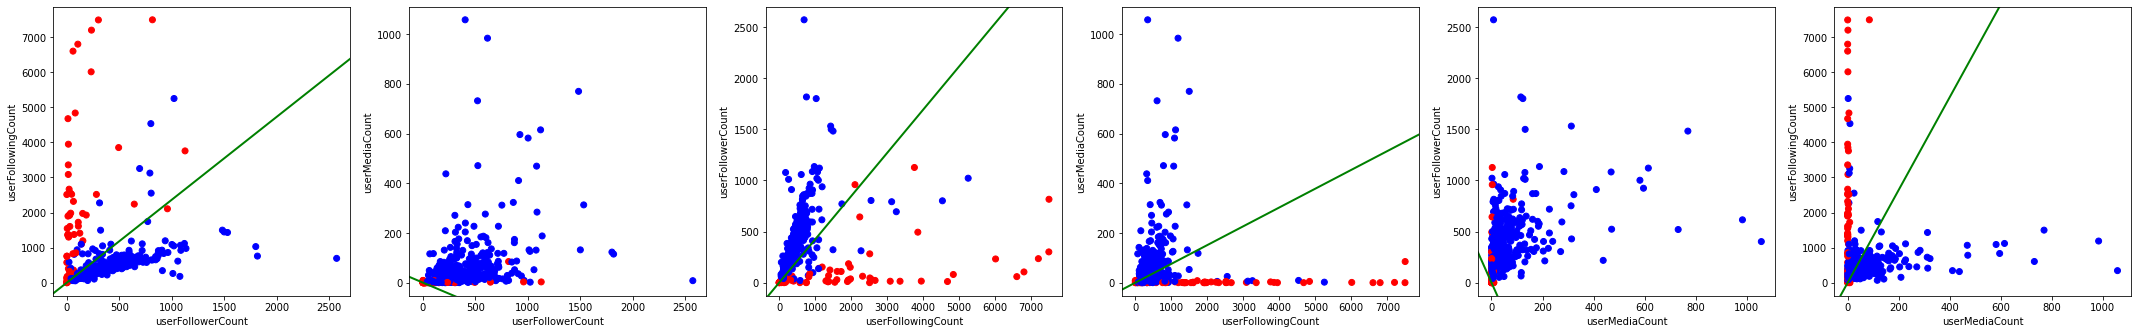

In [ ]:
plot_separator_on_data(X_pre_val, y_pre_val,dataset1,not_draw,log_model, "lr")

## Regressione logistica - Dataset 2

In [ ]:
%%time

log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver='liblinear', random_state=42))
])

#print(log_model.get_params())

log_grid = {
    "scaler": [None, StandardScaler()],
    "lr__penalty": ["l2", "l1"],
    "lr__C": np.logspace(-4, 2, 7),
    "lr__fit_intercept": [False, True]
}

log_model, score = grid_search_with_cross_validation(log_model, log_grid, k_fold, dataset2,"fake", scoring = "f1_macro")
models["Logistic Regression2"] = {"Model" : log_model, "Score": score}

Best cross validation score: 0.8997530192721612

             Test set score: 0.935141179759575

                Best params: {'lr__C': 1.0, 'lr__fit_intercept': True, 'lr__penalty': 'l1', 'scaler': None}

             Best estimator: Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

CPU times: user 667 ms, sys: 6.48 ms, total: 673 ms
Wall time: 3.03 s


In [ ]:
log_model2 =Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

log_model2.fit(X_pre_train2, y_pre_train2)
f1_measure = f1_score( y_pre_val2,  log_model2.predict(X_pre_val2), average="macro")

models["Logistic Regression2"] = {"Model" : log_model2, "Score": f1_measure}

In [ ]:
measureModel(X_pre_val2, y_pre_val2, log_model2.predict(X_pre_val2), log_model2)

Accuracy: 0.9353448275862069

Precision fake: 0.9807692307692307

Precision real: 0.8984375

Recall fake: 0.8869565217391304

Recall real: 0.9829059829059829

f1_measure: 0.935141179759575



Si nota come, equivalentemente al Perceptron, la precision dei fake risulta più alta dei reali mentre la recall fake è più bassa della recall real. La f1_measure rivela un netto miglioramento della Logistic Regression rispetto al Perceptron.

In [ ]:
log_model2.named_steps["lr"].coef_

array([[-2.56554611e+00,  5.56877011e+00, -2.08070631e-01,
         0.00000000e+00,  4.46024941e-01, -8.65973425e-03,
        -1.24953290e+00, -7.33685903e-01, -1.10151682e-02,
        -2.89603810e-03,  9.33706555e-04]])

In [ ]:
not_draw = [3]

Per visualizzare meglio i grafici, vengono filtrate e rappresentate solo le istanze con un numero di followers minore di 10000.

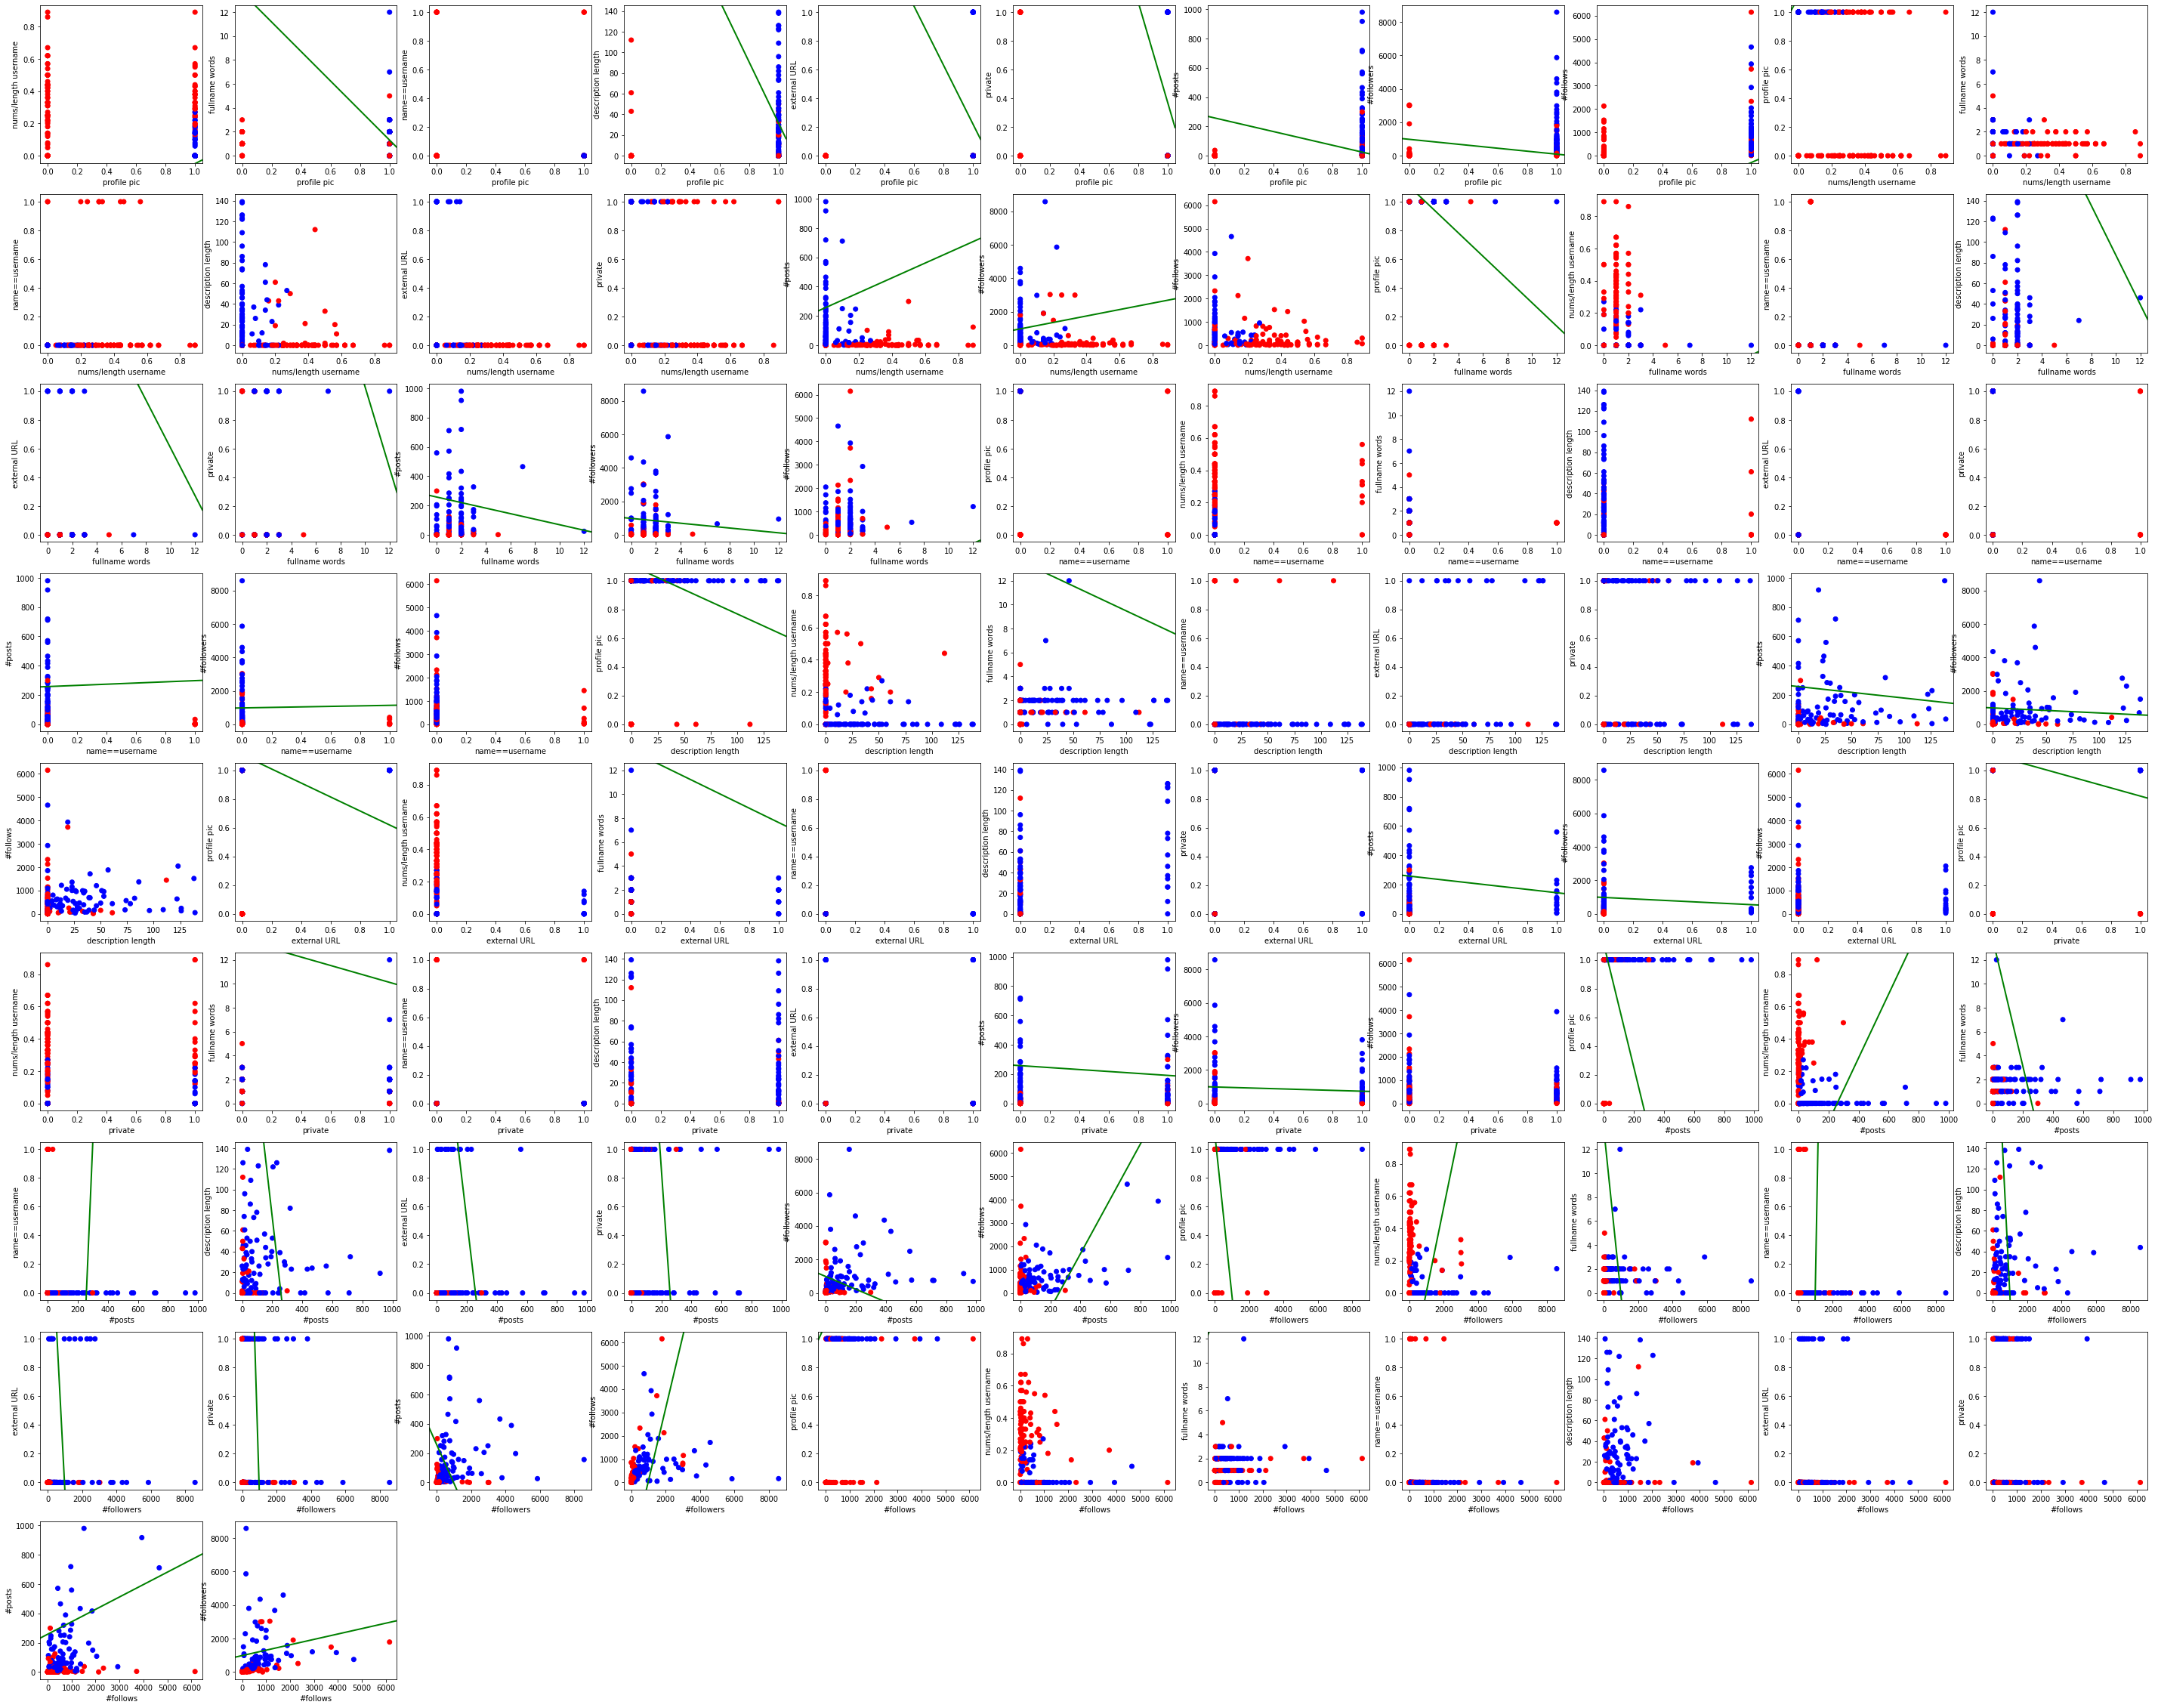

In [ ]:
y2f =dataset2[dataset2["#followers"] < 10000]["fake"]
x2f = dataset2[dataset2["#followers"] < 10000].drop(["fake"], axis=1)
i1, i2, i3, i4 = train_test_split(
    x2f,y2f,test_size=1/3, random_state=42)
plot_separator_on_data(i2, i4, dataset2 ,not_draw, log_model2, "lr")


## Support Vector Machine - Dataset1 

In [ ]:
%%time

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=42, class_weight={1:5}))
])

#print(svm_model.get_params())

svm_grid = [
  {'svc__C': np.logspace(3, 5, 3), 'svc__kernel': ['linear']},
  {'svc__C': np.logspace(3, 5, 3), 'svc__gamma': ['scale'], 'svc__kernel': ['rbf']},
]

svm_model, score= grid_search_with_cross_validation(svm_model, svm_grid, k_fold,  dataset1, "isFake",  scoring = "f1_macro")
models["Support Vector Machine1"] = {"Model": svm_model, "Score": score}

KeyboardInterrupt: ignored

In [ ]:
svm_model = Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=10000.0, class_weight={1: 5}, kernel='linear',
                     random_state=42))])
svm_model.fit(X_pre_train, y_pre_train)
f1_measure = f1_score( y_pre_val,  svm_model.predict(X_pre_val), average="macro")
models["Support Vector Machine1"] = {"Model": svm_model, "Score": f1_measure}

In [ ]:
measureModel(X_pre_val, y_pre_val, svm_model.predict(X_pre_val), svm_model)

Accuracy: 0.9271356783919598

Precision fake: 0.6883116883116883

Precision real: 0.9844236760124611

Recall fake: 0.9137931034482759

Recall real: 0.9294117647058824

f1_measure: 0.8706561326833642



Questi dati rivelano un peggioramento rispetto ai modelli visualizzati in precedenza: la precision fake in particolare ha infatti un valore molto più basso di quelli visti negli altri modelli. La f1_measure risulta essere la peggiore misurata fino ad ora.

In [ ]:
svm_model.named_steps["svc"].coef_

array([[-1.68321335,  1.40405595,  0.02204831, -1.65651004, -0.78492609,
        -0.50058011,  0.4172987 , -0.32855379]])

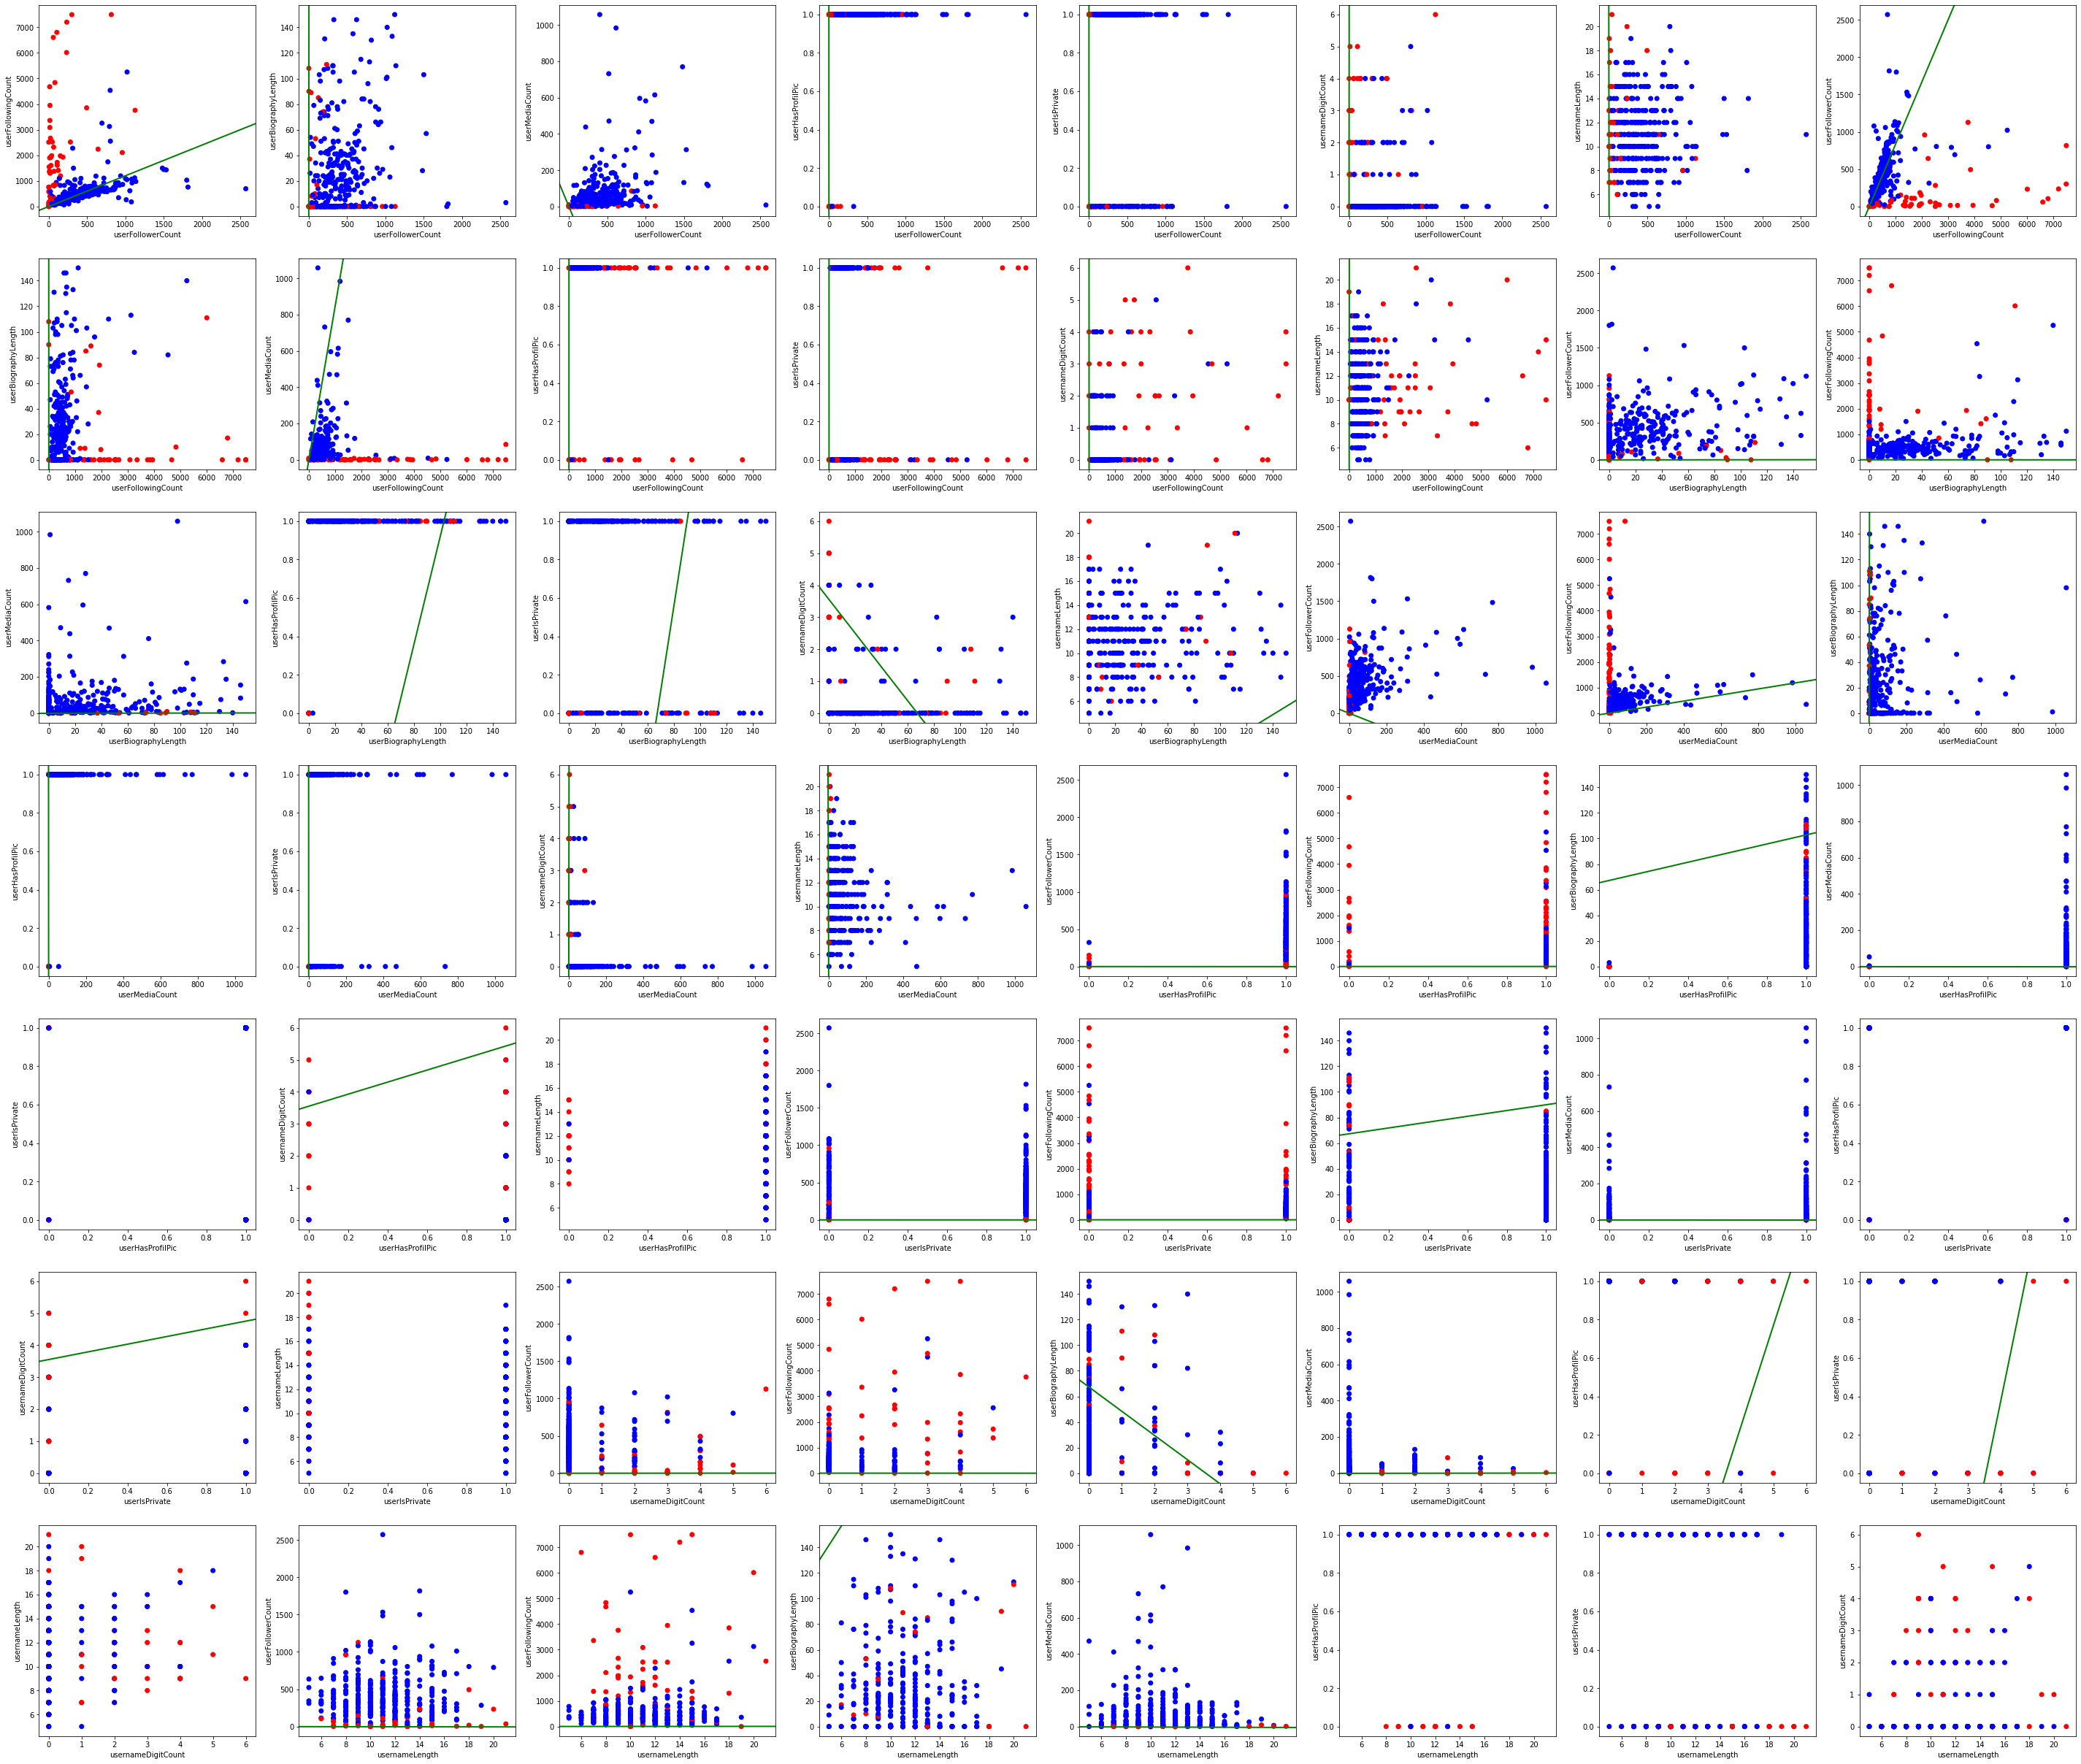

In [ ]:
plot_separator_on_data(X_pre_val, y_pre_val, dataset1, [], svm_model, "svc")

Dal grafico si nota che non in tutti i quadranti è presente la retta: questo perchè i coefficienti di entrambe le features sono negativi e la retta non passa per il primo quadrante.

## Support Vector Machine - Dataset2

In [ ]:
%%time

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=42))
])

#print(svm_model.get_params())

svm_grid = [
  {'svc__C': np.logspace(3, 5, 3), 'svc__kernel': ['linear']},
  {'svc__C': np.logspace(3, 5, 3), 'svc__gamma': ['scale'], 'svc__kernel': ['rbf']},
]

svm_model, score= grid_search_with_cross_validation(svm_model, svm_grid, k_fold,  dataset2, "fake",  scoring = "f1_macro")
models["Support Vector Machine2"] = {"Model": svm_model, "Score": score}

Best cross validation score: 0.8909584679327232

             Test set score: 0.9309061127242946

                Best params: {'svc__C': 100000.0, 'svc__kernel': 'linear'}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=100000.0, kernel='linear', random_state=42))])

CPU times: user 15.5 s, sys: 120 ms, total: 15.6 s
Wall time: 2min 31s


In [ ]:
svm_model2 = Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=100000.0, kernel='linear', random_state=42))])
svm_model2.fit(X_pre_train2, y_pre_train2)
f1_measure = f1_score( y_pre_val2,  svm_model2.predict(X_pre_val2), average="macro")
models["Support Vector Machine2"] = {"Model": svm_model2, "Score": f1_measure}

In [ ]:
measureModel(X_pre_val2, y_pre_val2, svm_model2.predict(X_pre_val2), svm_model2)

Accuracy: 0.9310344827586207

Precision fake: 0.9626168224299065

Precision real: 0.904

Recall fake: 0.8956521739130435

Recall real: 0.9658119658119658

f1_measure: 0.9309061127242946



Al contrario di quanto visto per il dataset1, il SVM ha restituito un buon valore di f1_measure, leggermente inferiore a quello ottimo rilevato della regressione logistica. Gli altri valori, ad eccezione della recall fake che è leggermente più bassa, sono tutti alti.

In [ ]:
svm_model2.named_steps["svc"].intercept_

array([-62.8174044])

In [ ]:
svm_model2.named_steps["svc"].coef_

array([[-1.13740416e+00,  1.08905620e+00, -3.70130424e-01,
         8.72772600e-02,  2.63130140e-01, -2.16240952e-01,
        -4.96503886e-01, -2.31685844e-01, -2.42371003e+00,
        -7.56995410e+02,  5.04573414e-01]])

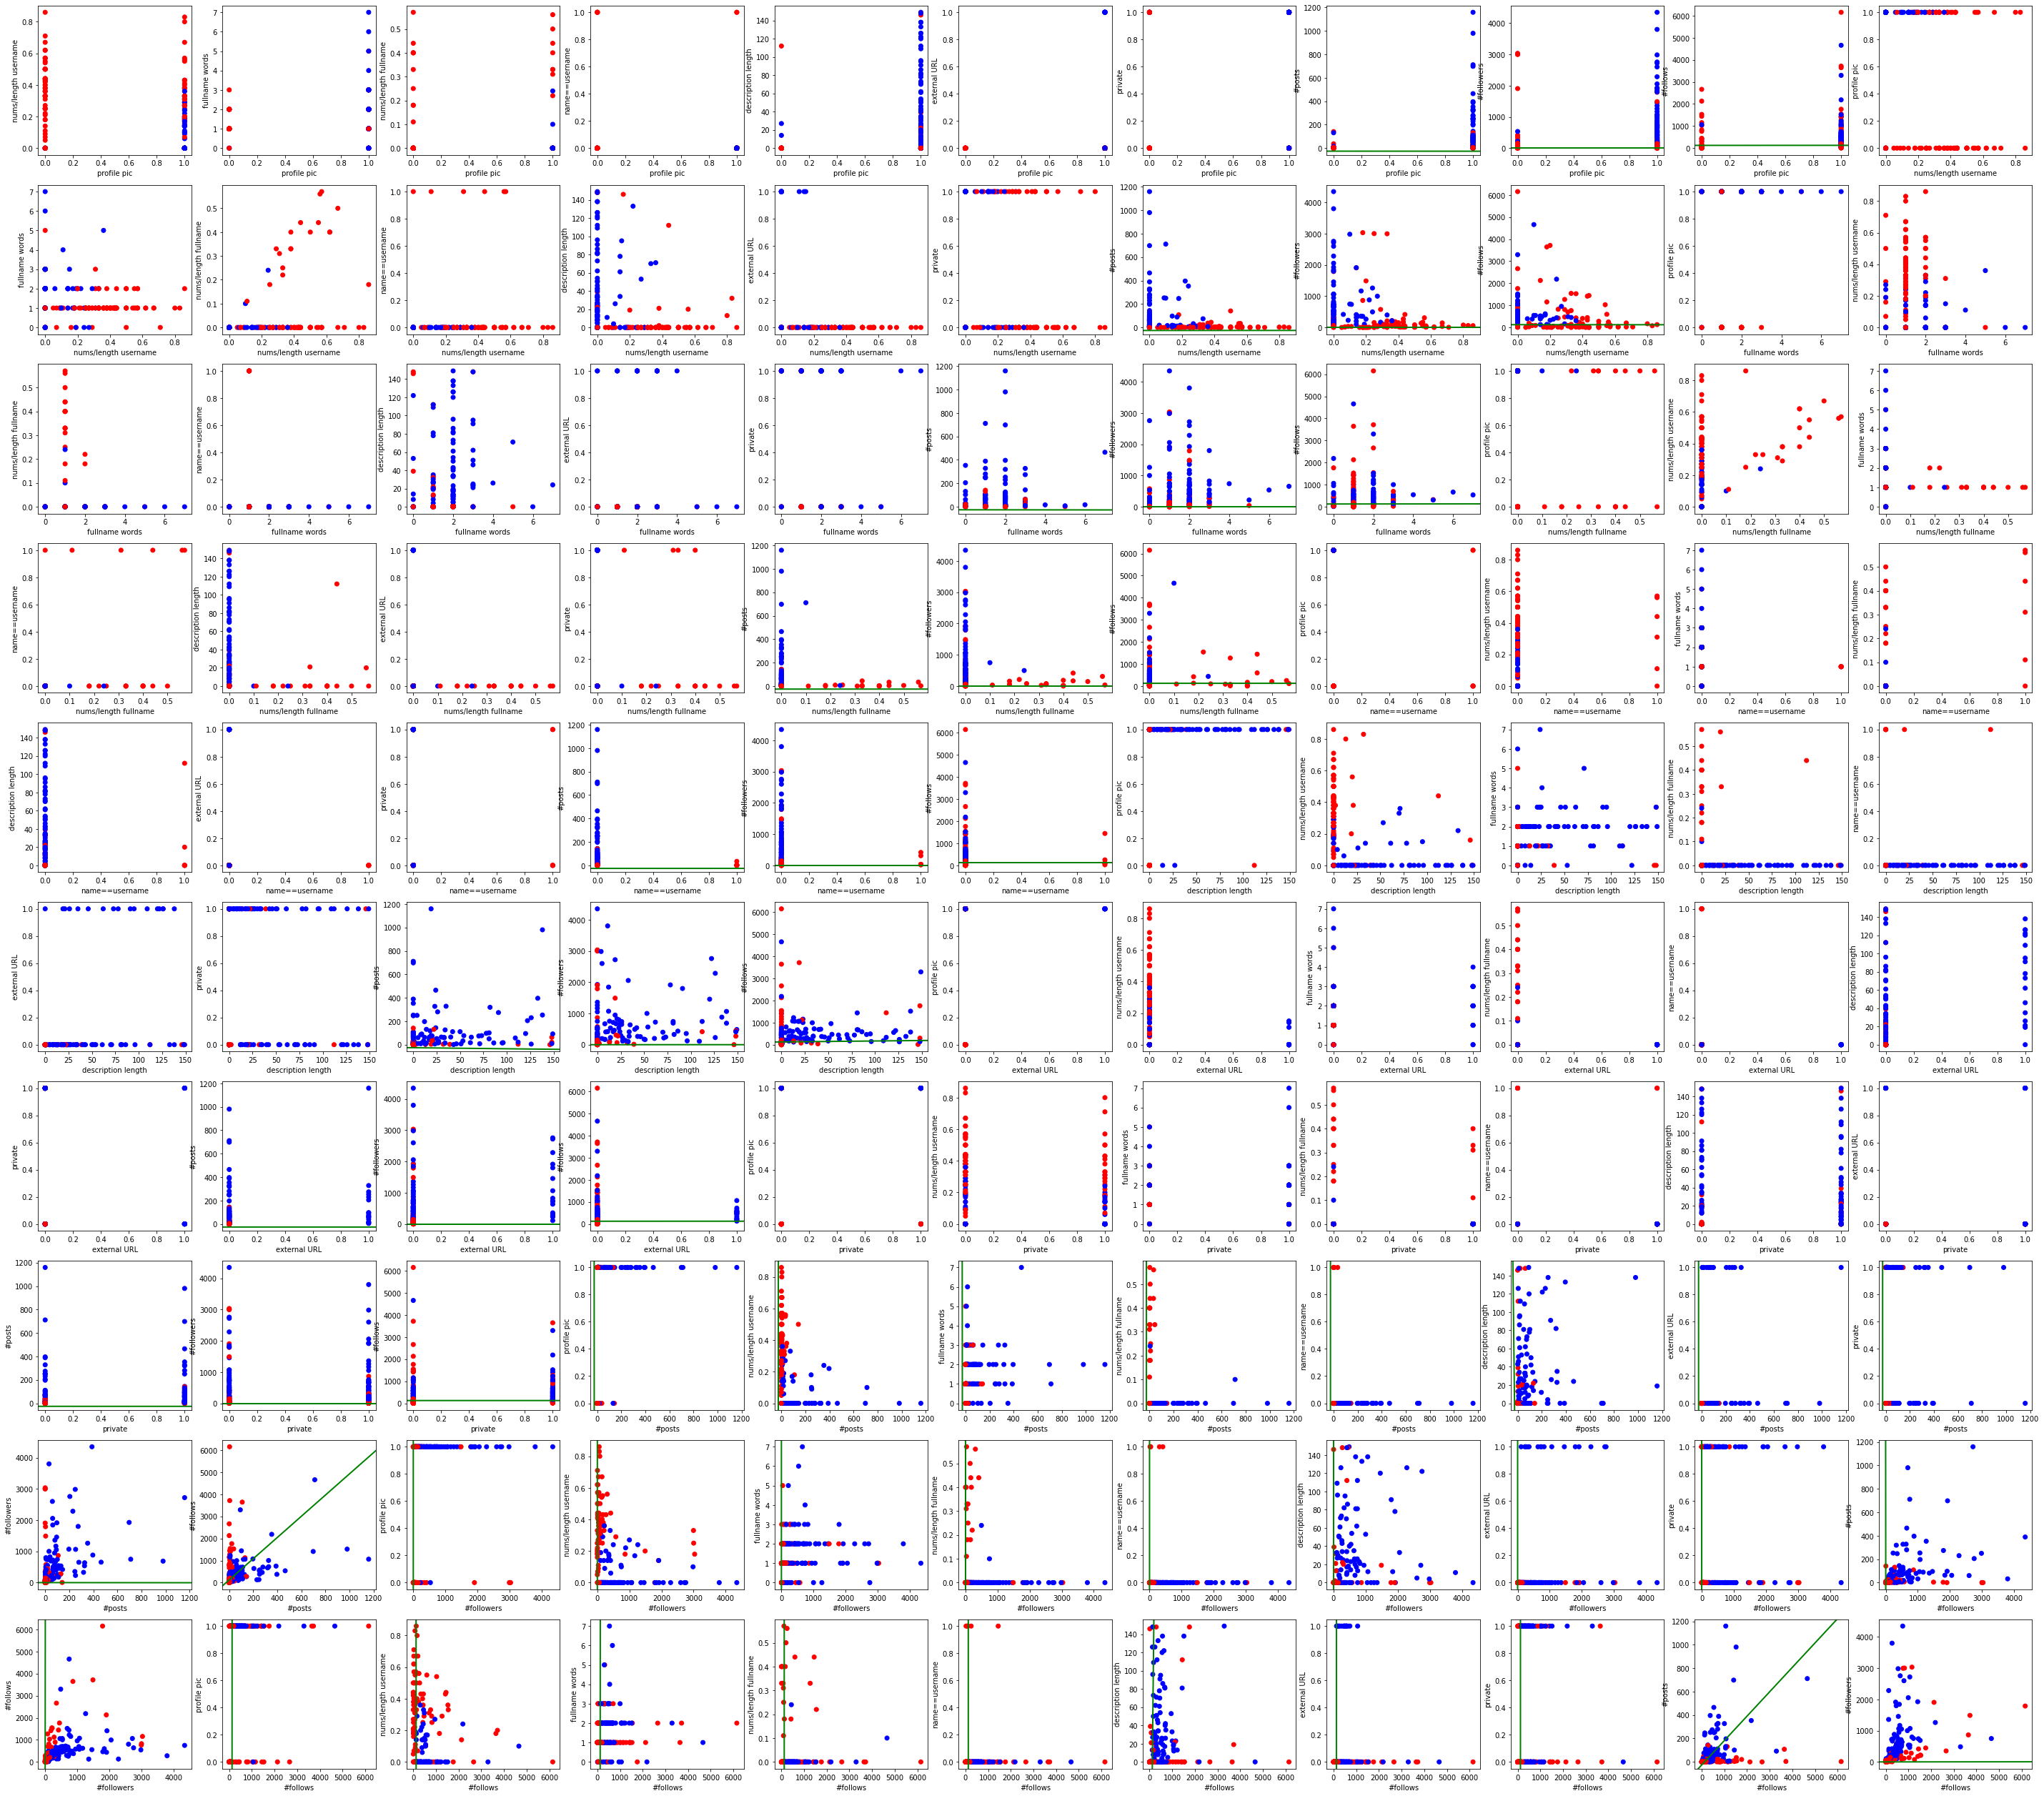

In [ ]:
y2f =dataset2[dataset2["#followers"] < 5000]["fake"]
x2f = dataset2[dataset2["#followers"] < 5000].drop(["fake"], axis=1)
i1, i2, i3, i4 = train_test_split(
    x2f,y2f,test_size=1/3, random_state=42)
plot_separator_on_data(i2, i4, dataset2 ,[], svm_model2, "svc")

Non in tutti i grafici è visualizzabile la retta: ciò è dovuto a un valore dell'intercetta molto basso e al fatto che alcuni coefficienti hanno valore negativo.

 # PARTE 4

In [ ]:
from scipy import stats

## Dataset1

Il seguente metodo permette di confrontare i diversi modelli con intervallo di confidenza al 95%.

In [ ]:
def difference_between_two_models(error1, error2, confidence, dataset, y_val):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

per_error = 1 - models["Perceptron1"]["Score"]
lre_error = 1 - models["Logistic Regression1"]["Score"]
svm_error = 1 - models["Support Vector Machine1"]["Score"]

print("Support Vector Machine vs Logistic Regression, intervallo di confidenza:")
difference_between_two_models(svm_error, lre_error, 0.95, dataset1, y_pre_val)

print("Support Vector Machine vs Perceptron, intervallo di confidenza:")
difference_between_two_models(svm_error, per_error, 0.95, dataset1, y_pre_val)

print("Logistic Regression vs Perceptron, intervallo di confidenza:")
difference_between_two_models( lre_error, per_error, 0.95, dataset1, y_pre_val)


Support Vector Machine vs Logistic Regression, intervallo di confidenza:
Valore minimo: -0.0003498847112275577
Valore massimo: 0.07284749958402027

Support Vector Machine vs Perceptron, intervallo di confidenza:
Valore minimo: -0.010539889449302564
Valore massimo: 0.06406148971825526

Logistic Regression vs Perceptron, intervallo di confidenza:
Valore minimo: -0.025149250147774457
Valore massimo: 0.044125264751614476



Si nota una somiglianza tra Logistic Regression e Perceptron, come si evidenzia anche dall'f1_measure molto simile.

In [ ]:
print("F1_measure Perceptron:", models["Perceptron1"]["Score"])
print("F1_measure Logistic Regression: ", models["Logistic Regression1"]["Score"])
print("F1_measure Support Vector Machine: ", models["Support Vector Machine1"]["Score"])


F1_measure Perceptron: 0.8974169328178405
F1_measure Logistic Regression:  0.9069049401197605
F1_measure Support Vector Machine:  0.8706561326833642


Successivamente vengono generate le matrice di confusione dei diversi modelli.

In [ ]:
def confusion_matrix_calculation(model):
    return confusion_matrix(y_pre_val, model.predict(X_pre_val))


Matrice di confusione del Perceptron.

In [ ]:
model = Pipeline(steps=[('scaler', None),
                ('per',
                 Perceptron(alpha=0.1, class_weight={1: 5}, fit_intercept=False,
                            n_jobs=-1, penalty='l1', random_state=42))])

model.fit(X_pre_train, y_pre_train)
conf_perc = pd.DataFrame(confusion_matrix_calculation(model))
conf_perc

0   1
0  319  21
1    2  56

In [ ]:
measureModel(X_pre_val, y_pre_val, model.predict(X_pre_val), model)

Accuracy: 0.9422110552763819

Precision fake: 0.7272727272727273

Precision real: 0.9937694704049844

Recall fake: 0.9655172413793104

Recall real: 0.9382352941176471

f1_measure: 0.8974169328178405



Matrice di confusione del Logistic Regression.

In [ ]:
conf_log_reg = pd.DataFrame(confusion_matrix_calculation(log_model))
conf_log_reg

0   1
0  324  16
1    4  54

In [ ]:
measureModel(X_pre_val, y_pre_val, model.predict(X_pre_val), log_model)

Accuracy: 0.949748743718593

Precision fake: 0.7272727272727273

Precision real: 0.9937694704049844

Recall fake: 0.9655172413793104

Recall real: 0.9382352941176471

f1_measure: 0.8974169328178405



Matrice di confidenza Support Vector Machine.

In [ ]:
conf_SVM = pd.DataFrame(confusion_matrix_calculation(svm_model))
conf_SVM

0   1
0  316  24
1    5  53

In [ ]:
measureModel(X_pre_val, y_pre_val, model.predict(X_pre_val), svm_model)

Accuracy: 0.9271356783919598

Precision fake: 0.7272727272727273

Precision real: 0.9937694704049844

Recall fake: 0.9655172413793104

Recall real: 0.9382352941176471

f1_measure: 0.8974169328178405



Adesso vengono calcolati gli intervalli di confidenza al 95% per ogni modello.

In [ ]:
def confidence(acc, N, Z):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

def calculate_accuracy(conf_matrix):
    return np.diag(conf_matrix).sum() / conf_matrix.sum().sum()

In [ ]:
#con confidenza del 0.95 si ha Z=1.96
pd.DataFrame([confidence(calculate_accuracy(conf_perc), len(X_pre_val), 1.96),
              confidence(calculate_accuracy(conf_log_reg), len(X_pre_val), 1.96),
              confidence(calculate_accuracy(conf_SVM), len(X_pre_val), 1.96)],
                 index=["perceptron", "logreg", "SVM"], columns=["inf", "sup"])

inf       sup
perceptron  0.914780  0.961187
logreg      0.923660  0.967238
SVM         0.897313  0.948791

Dagli intervalli di confidenza al 95% abbiamo la conferma che la Logistic Regression è il modello più accurato.



Di seguito possiamo confrontare le rette create utilizzando i diversi modelli, sovrapposte al grafico considerando le feature: numero di followers, numero di follows. 
* linea verde: Perceptron
* linea viola: Regressione logistica
* linea nera: Support vector machine

In [ ]:
hidden = [2,3,4,5,6,7]

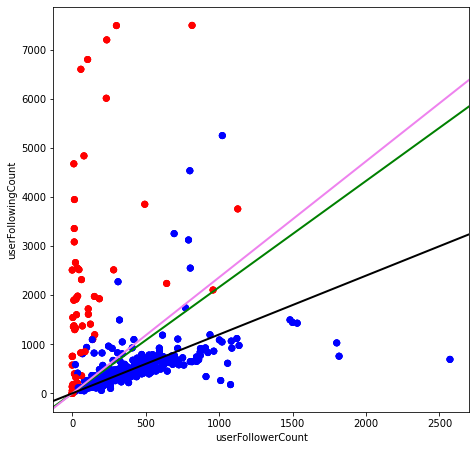

In [ ]:
plt.figure(figsize=(70, 70))
plot_separator_on_data(X_pre_val, y_pre_val, dataset1 ,hidden, models["Perceptron1"]["Model"], "per", repeatCombination=False, newFig = False, lineColor="green")
plot_separator_on_data(X_pre_val, y_pre_val, dataset1 ,hidden, models["Logistic Regression1"]["Model"], "lr", repeatCombination=False, newFig = False, lineColor="violet")
plot_separator_on_data(X_pre_val, y_pre_val, dataset1 ,hidden, models["Support Vector Machine1"]["Model"], "svc", repeatCombination=False, newFig = False, lineColor="black")


Ricordiamo che, dalla misura dell'f1_measure, il modello migliore è Logistic Regression, seguito da Perceptron e da Support Vector Machine.
Di seguito un grafico tridimensionale che rappresenta il piano ottenuto con logistic regression.


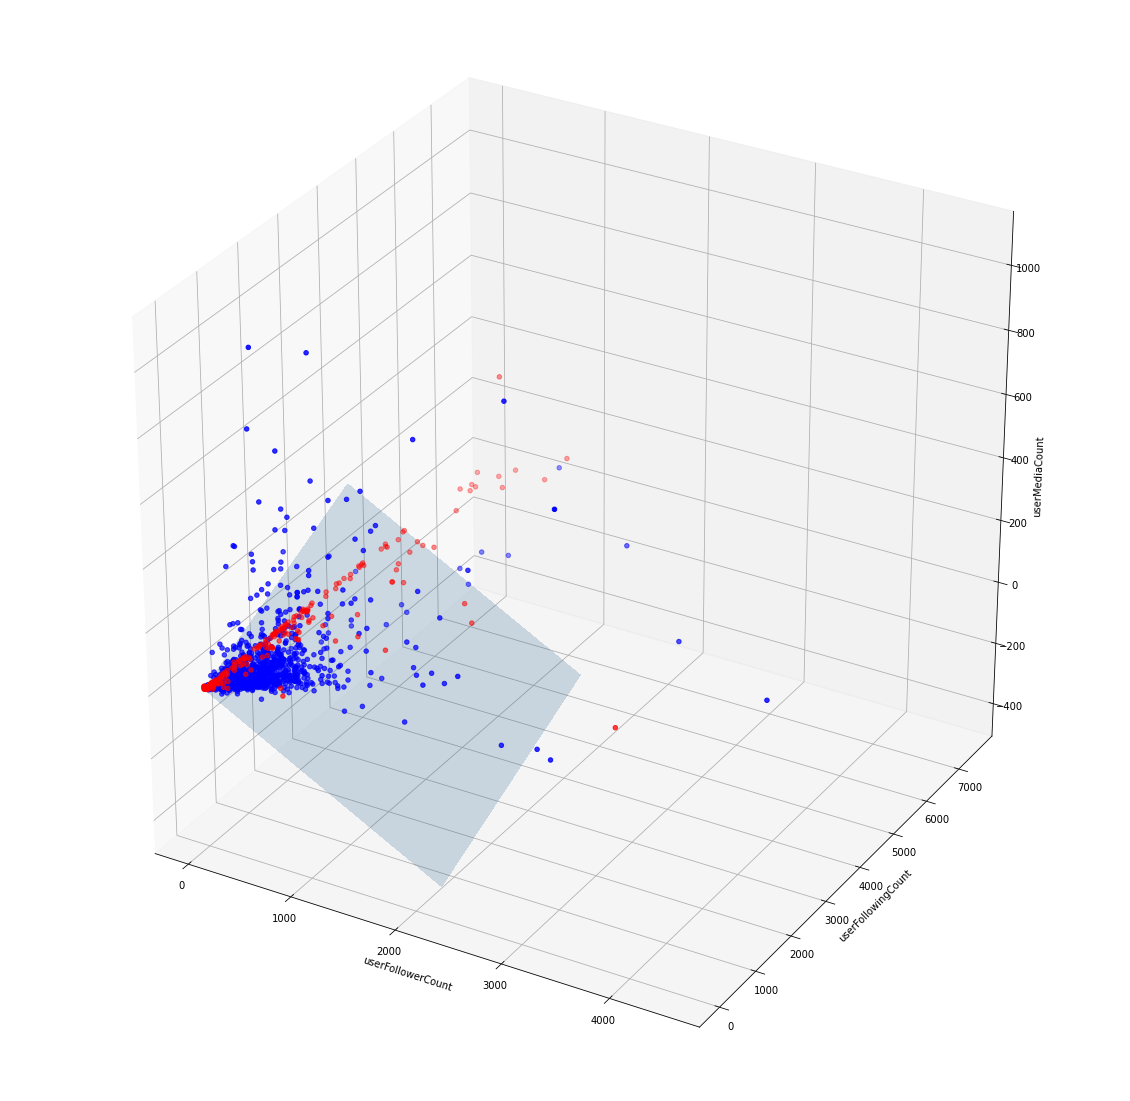

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

tmp = dataset1
xi = 0
yi = 1
zi = 3
x = tmp.columns[xi]
y = tmp.columns[yi]
z = tmp.columns[zi]

fake =  "isFake"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

account_colors= tmp[fake].map(account_color_map)
# Plot Curve Fit
# Create dataframe with of x_fit and y_fit

#print(tmp)

# Pass to the model's predict() method to return z-fit


#print(zz)

#ax.set_zlim(0,10000)

ax.scatter(tmp[x], tmp[y], tmp[z], c=account_colors)
xlim, ylim = plt.xlim(), plt.ylim()

X = np.arange(0, tmp[x].max(), tmp[x].max()/2)
Y = np.arange(0,tmp[y].max(), tmp[y].max()/2)
X, Y = np.meshgrid(X, Y)
Z = separator_3d(log_model, X, Y,"lr",xi,yi,zi)

Z = np.asarray(Z).reshape(-1, 2)

surf = ax.plot_surface(X,Y,Z, linewidth=0, antialiased=False, alpha = 0.2)
plt.show()

## Dataset2

Si effettuano gli stessi passaggi visti per il dataset1, per studiare il dataset2.

In [ ]:
def difference_between_two_models(error1, error2, confidence, y_val):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

per_error = 1 - models["Perceptron2"]["Score"]
lre_error = 1 - models["Logistic Regression2"]["Score"]
svm_error = 1 - models["Support Vector Machine2"]["Score"]

print("Support Vector Machine vs Logistic Regression, intervallo di confidenza:")
difference_between_two_models(svm_error, lre_error, 0.95,  y_pre_val2)

print("Support Vector Machine vs Perceptron, intervallo di confidenza:")
difference_between_two_models(svm_error, per_error, 0.95, y_pre_val2)

print("Logistic Regression vs Perceptron, intervallo di confidenza:")
difference_between_two_models( lre_error, per_error, 0.95, y_pre_val2)


Support Vector Machine vs Logistic Regression, intervallo di confidenza:
Valore minimo: -0.0339408744170689
Valore massimo: 0.042411008487629756

Support Vector Machine vs Perceptron, intervallo di confidenza:
Valore minimo: -0.01180710677057363
Valore massimo: 0.07296555431685615

Logistic Regression vs Perceptron, intervallo di confidenza:
Valore minimo: -0.0070644405905988805
Valore massimo: 0.07669302220744226



Dallo studio degli intervalli di confidenza, i modelli che sono più simili sono SVM (f1_score=0.930) e Logistic Regression(f1_score=0.935).




In [ ]:
print("F1_measure Perceptron: ", models["Perceptron2"]["Score"])
print("F1_measure Logistic Regression: ", models["Logistic Regression2"]["Score"])
print("F1_measure Support Vector Machine: ", models["Support Vector Machine2"]["Score"])


F1_measure Perceptron:  0.9003268889511533
F1_measure Logistic Regression:  0.935141179759575
F1_measure Support Vector Machine:  0.9309061127242946


Il modello migliore del dataset2 è Logistic Regression. Di seguito vengono rappresentate le matrici di confidenza.

In [ ]:
def confusion_matrix_calculation(model):
    return confusion_matrix(y_pre_val2, model.predict(X_pre_val2))


Matrice di confidenza del perceptron.

In [ ]:
conf_perc2 = pd.DataFrame(confusion_matrix_calculation(model2))
conf_perc2

0   1
0  113   4
1   19  96

In [ ]:
measureModel(X_pre_val2, y_pre_val2, model2.predict(X_pre_val2), model2)

Accuracy: 0.9008620689655172

Precision fake: 0.96

Precision real: 0.8560606060606061

Recall fake: 0.8347826086956521

Recall real: 0.9658119658119658

f1_measure: 0.9003268889511533



Matrice di confidenza di Logistic Regression.

In [ ]:
conf_log_reg2 = pd.DataFrame(confusion_matrix_calculation(log_model2))
conf_log_reg2

0    1
0  115    2
1   13  102

In [ ]:
measureModel(X_pre_val2, y_pre_val2, log_model2.predict(X_pre_val2), model2)


Accuracy: 0.9008620689655172

Precision fake: 0.9807692307692307

Precision real: 0.8984375

Recall fake: 0.8869565217391304

Recall real: 0.9829059829059829

f1_measure: 0.935141179759575



Matrice di confidenza di Support Vector Machine.

In [ ]:
conf_SVM2 = pd.DataFrame(confusion_matrix_calculation(svm_model2))
conf_SVM2

0    1
0  113    4
1   12  103

In [ ]:
measureModel(X_pre_val2, y_pre_val2, svm_model2.predict(X_pre_val2), model2)

Accuracy: 0.9008620689655172

Precision fake: 0.9626168224299065

Precision real: 0.904

Recall fake: 0.8956521739130435

Recall real: 0.9658119658119658

f1_measure: 0.9309061127242946



In [ ]:
#con confidenza del 0.95 si ha Z=1.96
pd.DataFrame([confidence(calculate_accuracy(conf_perc2), len(X_pre_val2), 1.96),
              confidence(calculate_accuracy(conf_log_reg2), len(X_pre_val2), 1.96),
              confidence(calculate_accuracy(conf_SVM2), len(X_pre_val2), 1.96)],
                 index=["perceptron", "logreg", "SVM"], columns=["inf", "sup"])

inf       sup
perceptron  0.855636  0.933029
logreg      0.896077  0.960430
SVM         0.890920  0.957107

Dagli intervalli di confidenza al 95% abbiamo la conferma che Logistic Regression è il modello più accurato.

E' possible confrontare le rette realtive ai 3 modelli, sovrapponendole al grafico generato utilizzando alcune feature del dataset.

* linea verde: Perceptron
* linea viola: Regressione logistica
* linea nera: Support vector machines


<Figure size 10800x10800 with 0 Axes>

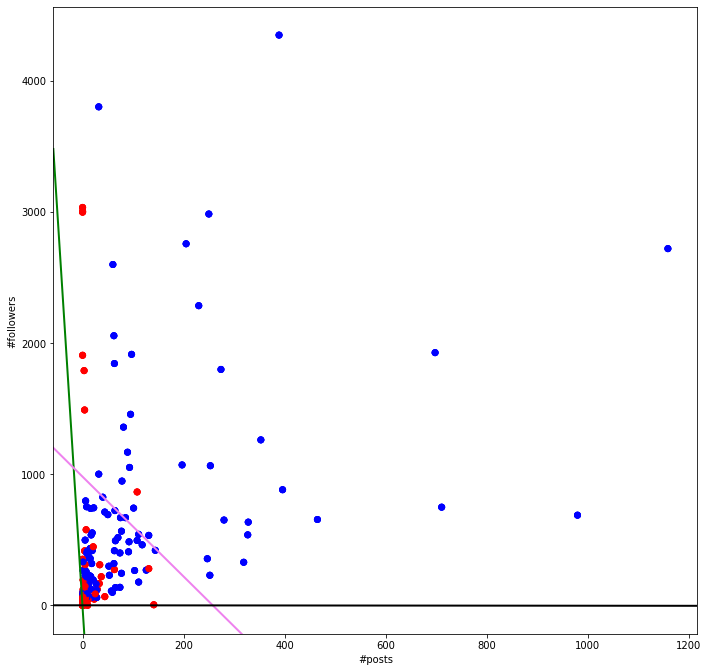

<Figure size 10800x10800 with 0 Axes>

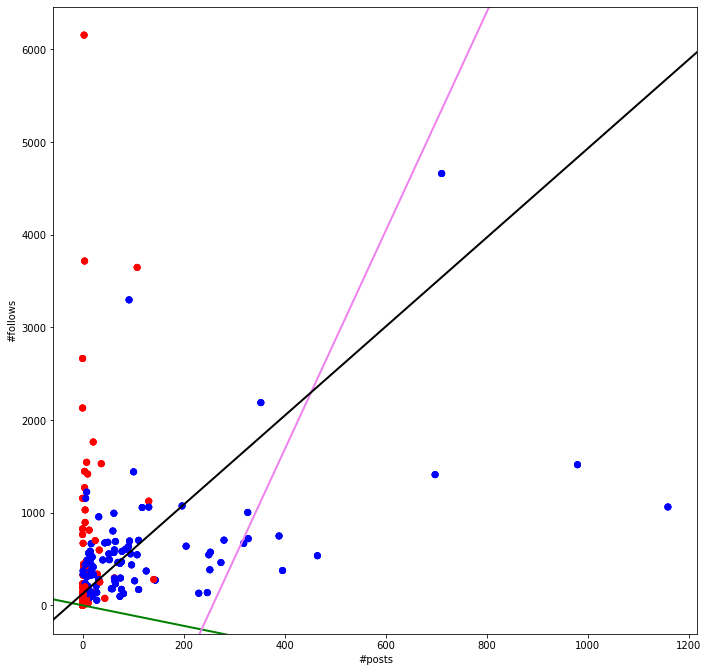

<Figure size 10800x10800 with 0 Axes>

In [ ]:
y2f =dataset2[dataset2["#followers"] < 5000]["fake"]
x2f = dataset2[dataset2["#followers"] < 5000].drop(["fake"], axis=1)
i1, i2, i3, i4 = train_test_split(
    x2f,y2f,test_size=1/3, random_state=42)
hidden = [0,1,2,3,4,5,6,7,10]
plt.figure(figsize=(150, 150))
plot_separator_on_data(i2, i4, dataset2 ,hidden, models["Perceptron2"]["Model"], "per", repeatCombination=False, newFig = False, lineColor="green")
plot_separator_on_data(i2, i4, dataset2 ,hidden, models["Logistic Regression2"]["Model"], "lr", repeatCombination=False, newFig = False, lineColor="violet")
plot_separator_on_data(i2, i4, dataset2 ,hidden, models["Support Vector Machine2"]["Model"], "svc", repeatCombination=False, newFig = False, lineColor="black")
plt.figure(figsize=(150, 150))
hidden = [0,1,2,3,4,5,6,7,9]
plt.figure(figsize=(150, 150))
plot_separator_on_data(i2, i4, dataset2 ,hidden, models["Perceptron2"]["Model"], "per", repeatCombination=False, newFig = False, lineColor="green")
plot_separator_on_data(i2, i4, dataset2 ,hidden, models["Logistic Regression2"]["Model"], "lr", repeatCombination=False, newFig = False, lineColor="violet")
plot_separator_on_data(i2, i4, dataset2 ,hidden, models["Support Vector Machine2"]["Model"], "svc", repeatCombination=False, newFig = False, lineColor="black")
plt.figure(figsize=(150, 150))

Ricordiamo che, dalla misura dell'f1_measure, il modello migliore è Logistic Regression, seguito da Support Vector Machine e da Perceptron. Di seguito il grafico tridimensionale che rappresenta il piano ottenuto con il modello migliore.



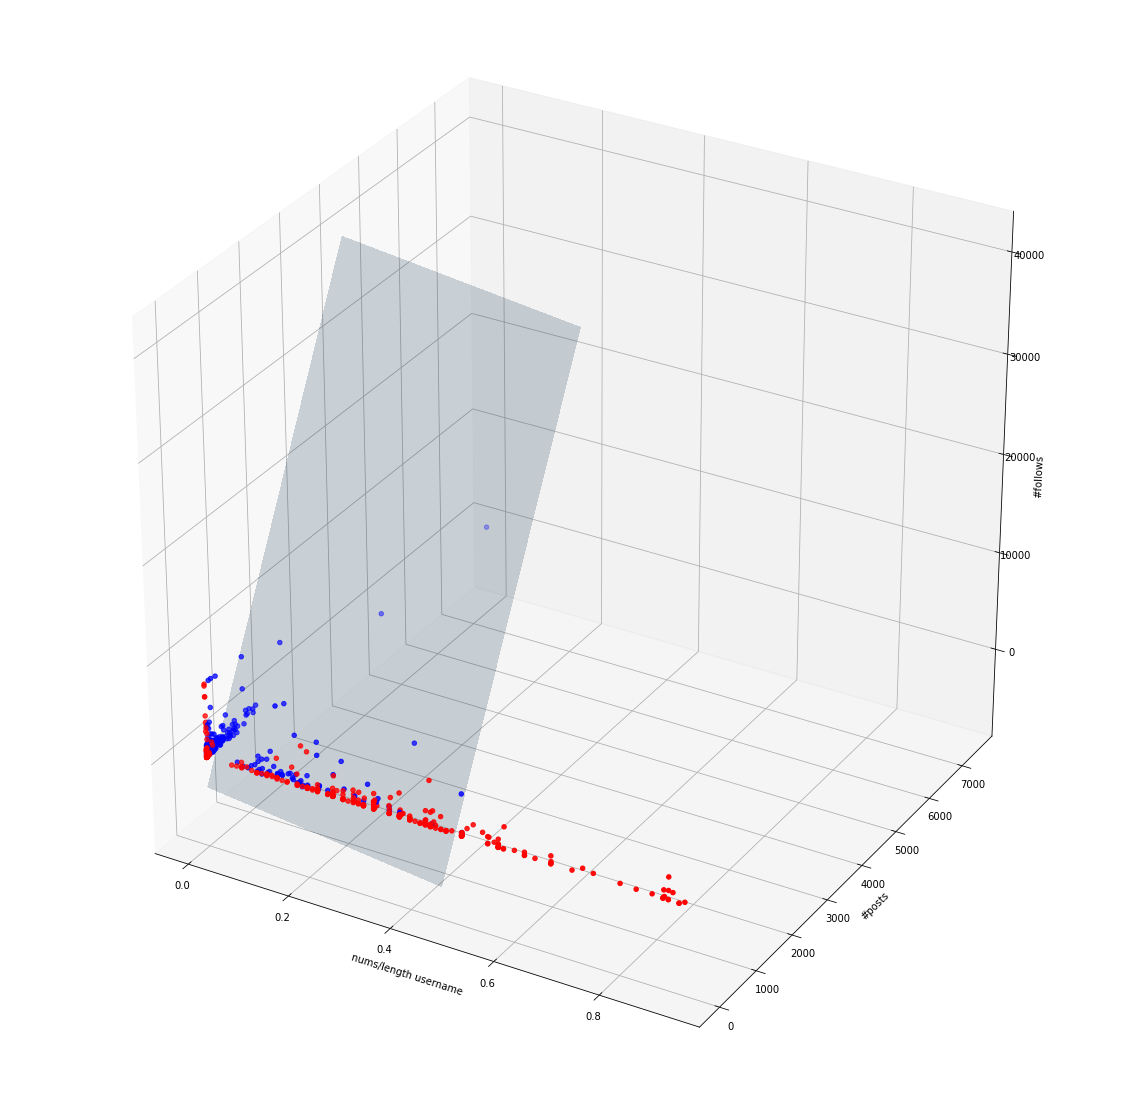

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

tmp = dataset2
xi = 1
yi = 8
zi = 10
x = tmp.columns[xi]
y = tmp.columns[yi]
z = tmp.columns[zi]

fake =  "fake"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

account_colors= tmp[fake].map(account_color_map)
# Plot Curve Fit
# Create dataframe with of x_fit and y_fit

#print(tmp)

# Pass to the model's predict() method to return z-fit


#print(zz)

#ax.set_zlim(0,10000)

ax.scatter(tmp[x], tmp[y], tmp[z], c=account_colors)
xlim, ylim = plt.xlim(), plt.ylim()

X = np.arange(0, tmp[x].max(), tmp[x].max()/2)
Y = np.arange(0,tmp[y].max(), tmp[y].max()/2)
X, Y = np.meshgrid(X, Y)
Z = separator_3d(log_model2, X, Y,"lr",xi,yi,zi)

Z = np.asarray(Z).reshape(-1, 2)

surf = ax.plot_surface(X,Y,Z, linewidth=0, antialiased=False, alpha = 0.2)
plt.show()

# PARTE 5

## Dataset1

Si effettua uno studio sui coefficienti del modello che ha restituito il miglior risultato: logistic regression.

In [ ]:
log_model = Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(C=0.001, class_weight={1: 5},penalty="l1",
                                    fit_intercept=False,
                                    random_state=42, solver='liblinear'))])
log_model.fit(X_pre_train, y_pre_train)
log_model_coeff = get_coefficients(log_model, X_pre_train.columns, "lr")
log_model_coeff

userFollowerCount     -0.005269
userFollowingCount     0.002229
userBiographyLength    0.000000
userMediaCount        -0.029467
userHasProfilPic       0.000000
userIsPrivate          0.000000
usernameDigitCount     0.000000
usernameLength         0.000000
dtype: float64

In [ ]:
min_values = dataset1.min()
max_values = dataset1.max()
denormalized_df= log_model_coeff * (max_values - min_values) + min_values
denormalized_df

isFake                       NaN
userBiographyLength     0.000000
userFollowerCount     -23.670085
userFollowingCount     16.711272
userHasProfilPic        0.000000
userIsPrivate           0.000000
userMediaCount        -31.175824
usernameDigitCount      0.000000
usernameLength          5.000000
dtype: float64

A seguito della denormalizzazione, si nota, dallo studio dei coefficienti, che molte variabili vengono azzerate. Quella più rilevante è il numero di media, seguita dal numero di follower e di following. Ci si aspetta che un account con molti post e molti follower è, con buona probabilità, un account reale. Al contrario, se un account ha molti seguiti, un username lungo, pochi follower e pochi post, molto probabilmente sarà un account fake.


## Dataset2

Si effettua lo studio dei coefficienti anche sul dataset2. Il miglior risultato dell'f1_score è stato ottenuto, anche in questo caso, applicando la regressione logistica.

In [ ]:
log_model2 =Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

log_model2.fit(X_pre_train2, y_pre_train2)

log_model_coeff2 = get_coefficients(log_model2, X_pre_train2.columns, "lr")
log_model_coeff2

profile pic            -2.565546
nums/length username    5.568770
fullname words         -0.208071
nums/length fullname    0.000000
name==username          0.446025
description length     -0.008660
external URL           -1.249533
private                -0.733686
#posts                 -0.011015
#followers             -0.002896
#follows                0.000934
dtype: float64

In [ ]:
min_values = dataset2.min()
max_values = dataset2.max()
denormalized_df= log_model_coeff2 * (max_values - min_values) + min_values
denormalized_df

#followers             -44420.990511
#follows                    7.002799
#posts                    -81.391078
description length         -1.298960
external URL               -1.249533
fake                             NaN
fullname words             -2.496848
name==username              0.446025
nums/length fullname        0.000000
nums/length username        5.123269
private                    -0.733686
profile pic                -2.565546
dtype: float64

Dopo aver denormalizzato, come già osservato precedentemente, risulta che la variabile più influente è il numero di follower, seguita dal numero di post e dal numero di follows. Ci si aspetta che un account con molti follower è quasi sicuramente reale. Al contrario, se ha pochi follower, pochi post e molti seguiti, allora l'account sarà falso. 

## Nuovo dataset2

Studiando il dataset2, si nota che ci sono valori molto alti per il numero di followers: questo potrebbe peggiorare il modello. Si vuole provare, dunque, a eliminare dal dataset queste variabili e riaddestrare i modelli.

In [ ]:
new_dataset2 = dataset2[dataset2["#followers"]< 10000]

In [ ]:
new_y2 =new_dataset2["fake"]
new_x2 = new_dataset2.drop(["fake"], axis=1)

In [ ]:
new_X_pre_train2, new_X_pre_val2, new_y_pre_train2, new_y_pre_val2 = train_test_split(
    new_x2,
    new_y2,
    test_size=1/3, random_state=42
)

### Perceptron

In [ ]:
%%time

per_model = Pipeline([
    ("scaler", StandardScaler()),
    ("per", Perceptron(n_jobs=-1, random_state=42))
])

#print(per_model.get_params())

per_grid = {
    "scaler": [None, StandardScaler()],
    "per__penalty": ["l2", "l1", "elasticnet"],
    "per__alpha": np.logspace(-3, 3, 7),
    "per__fit_intercept": [False, True]
}

per_model, score = grid_search_with_cross_validation(per_model, per_grid, k_fold, new_dataset2, "fake", scoring = "f1_macro")
models["Perceptron2_new"] = {"Model": per_model, "Score": score}

Best cross validation score: 0.883139364667487

             Test set score: 0.9126519302223062

                Best params: {'per__alpha': 0.001, 'per__fit_intercept': False, 'per__penalty': 'l2', 'scaler': StandardScaler()}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.001, fit_intercept=False, n_jobs=-1,
                            penalty='l2', random_state=42))])

CPU times: user 1.04 s, sys: 221 ms, total: 1.26 s
Wall time: 5.16 s


In [ ]:
new_per_model2 =Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.001, fit_intercept=False, n_jobs=-1,
                            penalty='l2', random_state=42))])
new_per_model2.fit(new_X_pre_train2, new_y_pre_train2)
f1Measure = f1_score(new_y_pre_val2, new_per_model2.predict(new_X_pre_val2),average="macro")
models["Perceptron2_new"] = {"Model": new_per_model2, "Score": f1Measure}

new_std_pen_coeff2 = get_coefficients(new_per_model2, new_X_pre_train2.columns, "per")
new_std_pen_coeff2

profile pic            -0.709578
nums/length username    2.502823
fullname words         -2.039019
nums/length fullname    2.327978
name==username          1.149335
description length     -1.135985
external URL           -2.989390
private                -1.439660
#posts                 -3.560375
#followers             -4.623307
#follows                3.402878
dtype: float64

In [ ]:
measureModel(new_X_pre_val2, new_y_pre_val2, new_per_model2.predict(new_X_pre_val2), new_per_model2)

Accuracy: 0.91324200913242

Precision fake: 0.8934426229508197

Precision real: 0.9381443298969072

Recall fake: 0.9478260869565217

Recall real: 0.875

f1_measure: 0.9126519302223062



Si nota già che la f1_measure è migliorata: nel dataset2 originale valeva 0.900, ora 0.912.

### Logistic Regression

In [ ]:
%%time

log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver='liblinear', random_state=42))
])

#print(log_model.get_params())

log_grid = {
    "scaler": [None, StandardScaler()],
    "lr__penalty": ["l2", "l1"],
    "lr__C": np.logspace(-4, 2, 7),
    "lr__fit_intercept": [False, True]
}

log_model, score = grid_search_with_cross_validation(log_model, log_grid, k_fold, new_dataset2,"fake", scoring = "f1_macro")
models["Logistic Regression2_new"] = {"Model" : log_model, "Score": score}

KeyboardInterrupt: ignored

In [ ]:
new_log_model2 = Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.0001, random_state=42,
                                    solver='liblinear'))])
new_log_model2.fit(new_X_pre_train2, new_y_pre_train2)
f1Measure = f1_score(new_y_pre_val2, new_log_model2.predict(new_X_pre_val2),average="macro")
models["Logistic regression2_new"] = {"Model": new_log_model2, "Score": f1Measure}

new_std_pen_coeff2 = get_coefficients(new_log_model2, new_X_pre_train2.columns, "lr")
new_std_pen_coeff2

profile pic            -0.012606
nums/length username    0.011294
fullname words         -0.006691
nums/length fullname    0.004840
name==username          0.002671
description length     -0.010315
external URL           -0.006746
private                -0.002990
#posts                 -0.008043
#followers             -0.008178
#follows               -0.002062
dtype: float64

In [ ]:
measureModel(new_X_pre_val2, new_y_pre_val2, new_log_model2.predict(new_X_pre_val2), new_log_model2)

Con la logistic regressione, la f1_measure è peggiorata di pochissimo.

### Support Vector Machine

In [ ]:
%%time

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=42))
])

#print(svm_model.get_params())

svm_grid = [
  {'svc__C': np.logspace(3, 5, 3), 'svc__kernel': ['linear']},
  {'svc__C': np.logspace(3, 5, 3), 'svc__gamma': ['scale'], 'svc__kernel': ['rbf']},
]

svm_model, score= grid_search_with_cross_validation(svm_model, svm_grid, k_fold,  new_dataset2, "fake",  scoring = "f1_macro")
models["Support Vector Machine2_new"] = {"Model": svm_model, "Score": score}

In [ ]:
new_svm_model2 = Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1000.0, kernel='linear', random_state=42))])
new_svm_model2.fit(new_X_pre_train2, new_y_pre_train2)
f1Measure = f1_score(new_y_pre_val2, new_svm_model2.predict(new_X_pre_val2),average="macro")
models["Support Vector Machine2_new"] = {"Model": new_svm_model2, "Score": f1Measure}
fit(new_svm_model2, new_X_pre_train2, new_y_pre_train2, new_X_pre_val2, new_y_pre_val2)

F1_measure:  0.9451769025367156


La support vectore machine è migliorata notevolmente: col nuovo dataset l'f1_measure vale 0.945, prima era 0.9309.

In [ ]:
measureModel(new_X_pre_val2, new_y_pre_val2, new_svm_model2.predict(new_X_pre_val2), new_svm_model2)

In [ ]:
new_std_pen_coeff2 = get_coefficients(new_svm_model2, new_X_pre_train2.columns, "svc")
new_std_pen_coeff2

Confrontiamo le rette dei 3 modelli sovrapposte al grafico considerando le feature #followers, #follows

In [ ]:
hidden =[0,1,2,3,4,5,6,7,8]

In [ ]:
plt.figure(figsize=(150, 150))
plot_separator_on_data(new_X_pre_val2, new_y_pre_val2, new_dataset2, hidden, models["Perceptron2_new"]["Model"], 
                       "per", lineColor="green", newFig= False, repeatCombination=False)
plot_separator_on_data(new_X_pre_val2, new_y_pre_val2, new_dataset2, hidden, models["Logistic regression2_new"]["Model"],
                       "lr", lineColor="violet", newFig= False, repeatCombination=False)
plot_separator_on_data(new_X_pre_val2, new_y_pre_val2, new_dataset2, hidden, models["Support Vector Machine2_new"]["Model"],
                       "svc", lineColor="black", newFig= False, repeatCombination=False)

# Dataset3

Il dataset3 viene creato combinando i due dataset precedentemente utilizzati. Per farlo, vengono rinominate alcune features e fatto un merge sulle colonne in comune.

In [ ]:
dataset3 = dataset1.copy()

In [ ]:
dataset3["nums/length username"] = round(dataset3["usernameDigitCount"] / dataset3["usernameLength"] ,2)
dataset3.rename(columns = {'userFollowerCount':'#followers', 'userFollowingCount':'#follows', 'userBiographyLength': 'description length',
                           'userMediaCount': '#posts','userHasProfilPic': 'profile pic', 'userIsPrivate':'private', 'isFake':'fake' }, inplace = True)
dataset3 = dataset3.drop(columns = ["usernameDigitCount", "usernameLength"])
dataset3 = pd.concat([new_dataset2, dataset3], ignore_index=True, join='inner')

In [ ]:
dataset3

profile pic  nums/length username  description length  private  #posts  \
0               1                  0.33                  30        1      35   
1               1                  0.00                  64        1       3   
2               1                  0.00                  82        1     319   
3               1                  0.50                  76        1       6   
4               1                  0.00                   0        1       6   
...           ...                   ...                 ...      ...     ...   
1845            1                  0.00                 138        0       6   
1846            1                  0.43                  52        0       6   
1847            1                  0.07                  92        0       9   
1848            1                  0.08                  60        0       5   
1849            1                  0.20                 108        0       6   

      #followers  #follows  fake  
0            488       604     0  
1             35         6     0  
2            328       668     0  
3            225       356     0  
4            362       424     0  
...          ...       ...   ...  
1845           0        25     1  
1846           0         0     1  
1847           0         1     1  
1848           1         0     1  
1849           0         0     1  

[1850 rows x 8 columns]

In [ ]:
dataset3[dataset3["fake"]==0].value_counts()

profile pic  nums/length username  description length  private  #posts  #followers  #follows  fake
1            0.00                  48                  0        222     5282        652       0       2
                                   0                   1        21      202         201       0       2
                                   98                  1        272     619         793       0       2
                                   0                   0        53      225         446       0       2
                                   59                  0        21      634         648       0       2
                                                                                                     ..
                                   4                   1        11      234         242       0       1
                                                                5       383         419       0       1
                                                                4    

In [ ]:
dataset3[dataset3["fake"]==1].value_counts()

profile pic  nums/length username  description length  private  #posts  #followers  #follows  fake
0            0.00                  0                   0        0       1           8         1       2
1            0.91                  0                   0        0       75          26        1       2
             0.27                  0                   0        0       45          64        1       2
0            0.00                  0                   0        0       69          694       1       2
                                                       1        0       0           71        1       2
                                                                                                     ..
             0.33                  0                   0        0       3208        1911      1       1
                                                                        2997        764       1       1
                                                                     

Il nuovo dataset ha in totale 1890 istanze, di queste 1312 sono account reali. Nel seguente grafico si visualizza la distribuzione delle due classi (la parte blu rappresenta gli account reali).

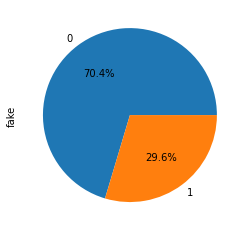

In [ ]:
dataset3['fake'].value_counts().plot.pie(autopct="%1.1f%%")

## PARTE 1

## Significato delle feature

Text(0.5, 0, 'Number of follows')

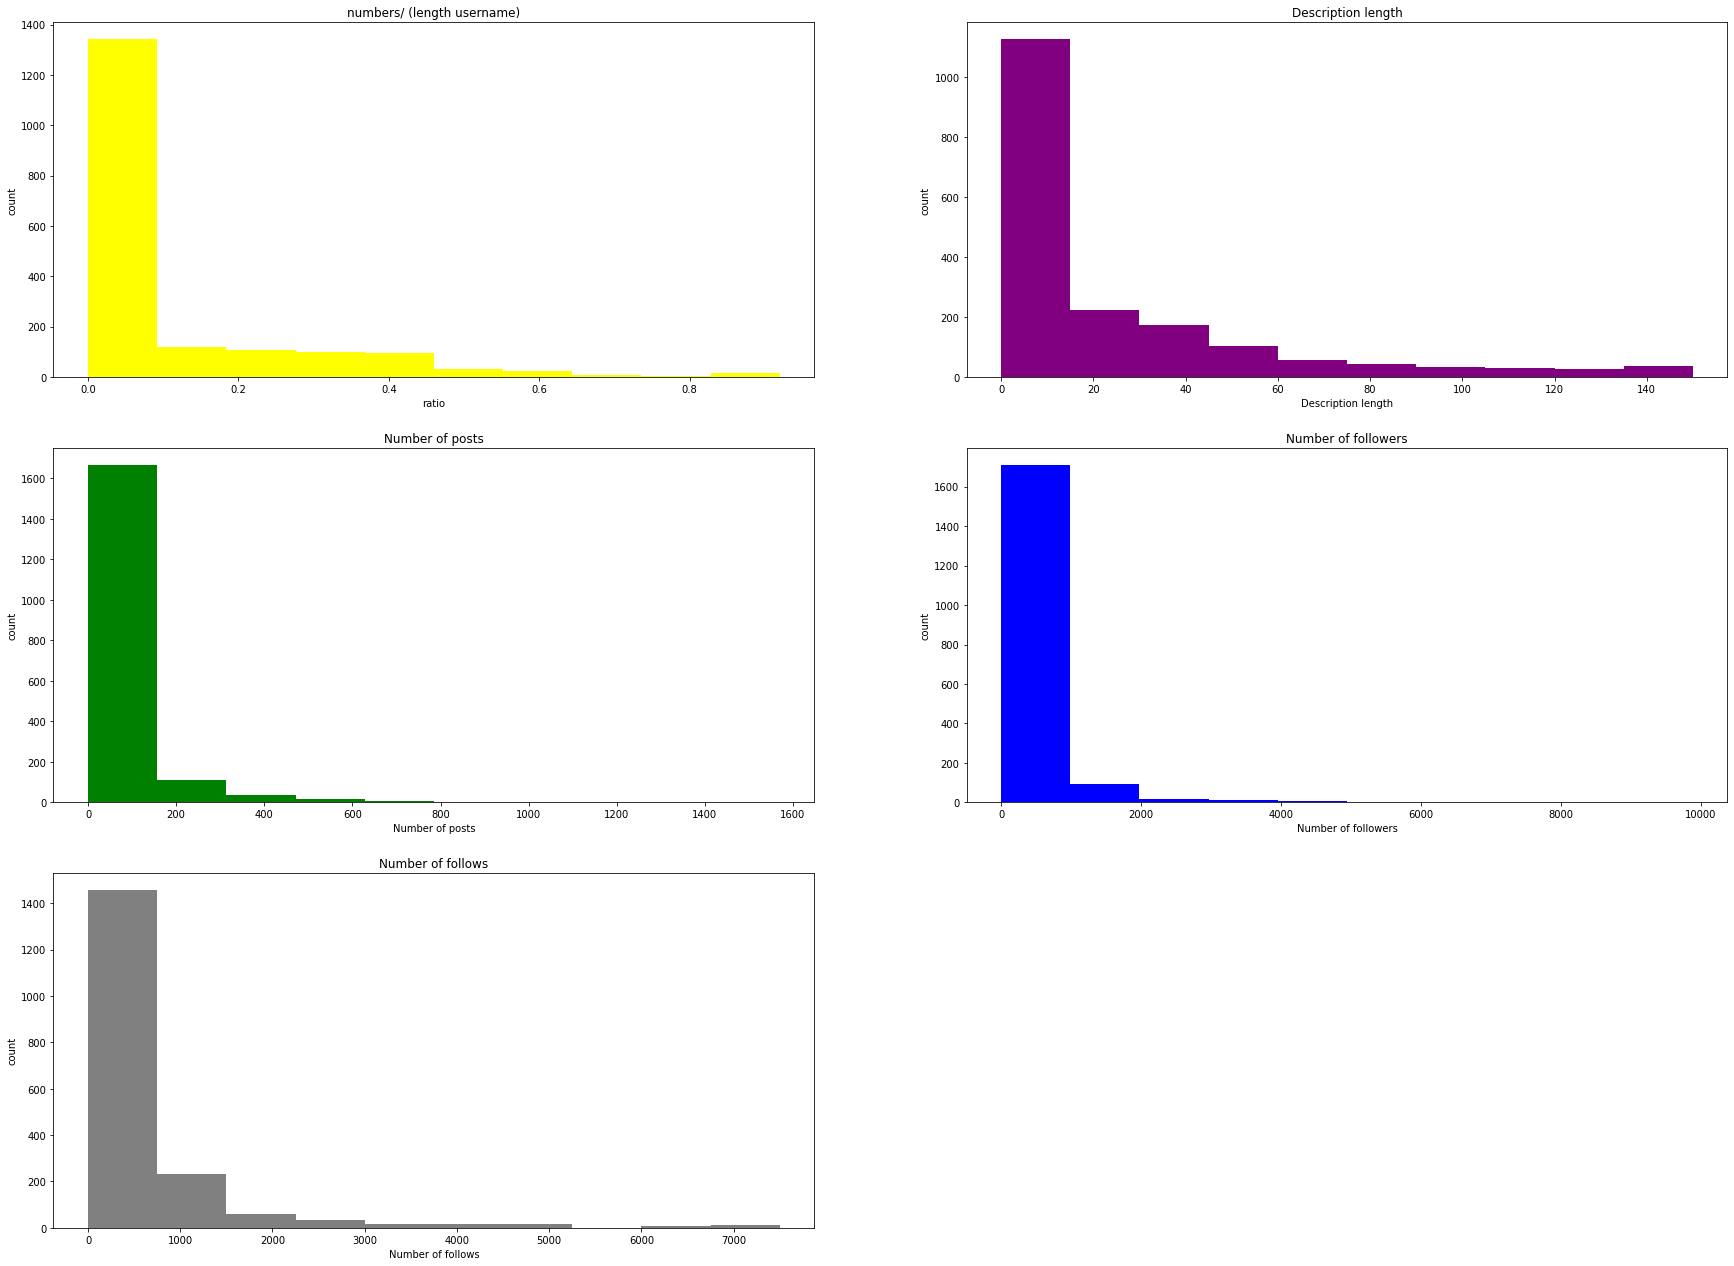

In [ ]:
plt.figure(figsize=(30,30))

plt.subplot(4,2,1)
plt.title("numbers/ (length username)")
plt.hist(dataset3["nums/length username"], color="yellow")
plt.ylabel("count")
plt.xlabel("ratio")

plt.subplot(4,2,2)
plt.title("Description length")
plt.hist(dataset3["description length"], color="purple")
plt.ylabel("count")
plt.xlabel("Description length")

plt.subplot(4,2,3)
plt.title("Number of posts")
plt.hist(dataset3["#posts"], color="green")
plt.ylabel("count")
plt.xlabel("Number of posts")

plt.subplot(4,2,4)
plt.title("Number of followers")
plt.hist(dataset3["#followers"], color="blue")
plt.ylabel("count")
plt.xlabel("Number of followers")

plt.subplot(4,2,5)
plt.title("Number of follows")
plt.hist(dataset3["#follows"], color="grey")
plt.ylabel("count")
plt.xlabel("Number of follows")

Text(0, 0.5, 'Number of follows')

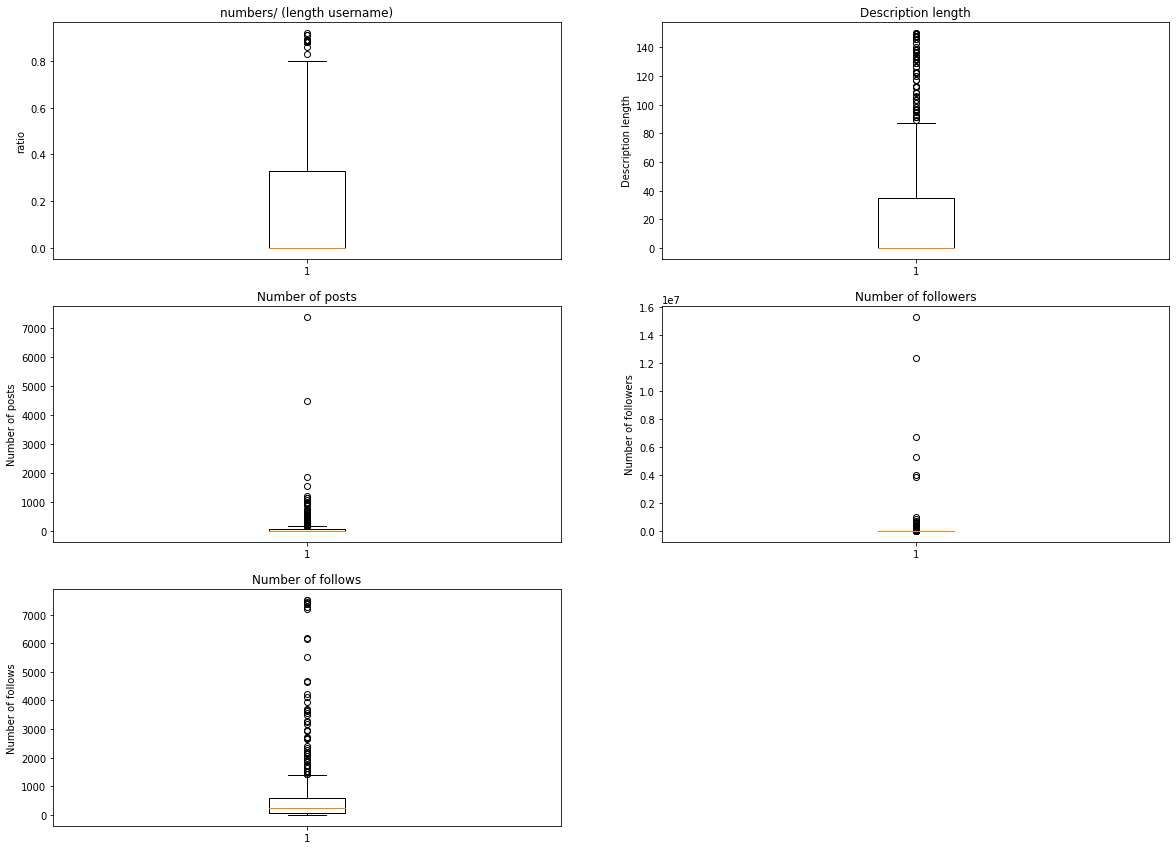

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
plt.title("numbers/ (length username)")
plt.boxplot(dataset2["nums/length username"])
plt.ylabel("ratio")

plt.subplot(4,2,2)
plt.title("Description length")
plt.boxplot(dataset2["description length"])
plt.ylabel("Description length")

plt.subplot(4,2,3)
plt.title("Number of posts")
plt.boxplot(dataset2["#posts"])
plt.ylabel("Number of posts")

plt.subplot(4,2,4)
plt.title("Number of followers")
plt.boxplot(dataset2["#followers"])
plt.ylabel("Number of followers")

plt.subplot(4,2,5)
plt.title("Number of follows")
plt.boxplot(dataset2["#follows"])
plt.ylabel("Number of follows")

Analizziamo alcune variabili e le loro correlazioni con la variabile **fake**

**Profile pic**: osserviamo se la presenza di una foto profilo è più riccorrente negli account veri rispetto a quelli falsi

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5906d8bd0>,
      dtype=object)

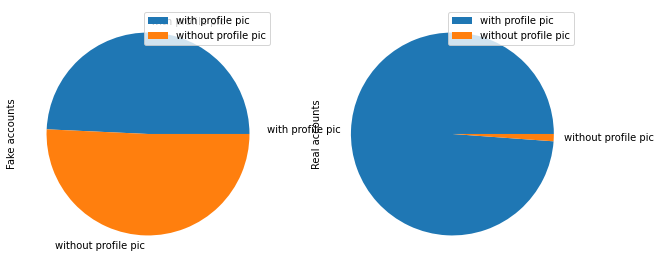

In [ ]:
fakeWithProfile = dataset3[(dataset3['fake'] == 1) & (dataset3['profile pic'] == 1)].shape[0]
fakeNoProfile = dataset3[(dataset3['fake'] == 1) & (dataset3['profile pic'] == 0)].shape[0]
realWithProfile = dataset3[(dataset3['fake'] == 0) & (dataset3['profile pic'] == 1)].shape[0]
realNoProfile = dataset3[(dataset3['fake'] == 0) & (dataset3['profile pic'] == 0)].shape[0]

df = pd.DataFrame({'with profile pic':[fakeWithProfile, realWithProfile],
                   'without profile pic':[fakeNoProfile, realNoProfile]}, 
                  index=['Fake accounts','Real accounts'])
df.T.plot.pie(subplots=True, figsize=(10, 30))

Possiamo osservare che quasi tutti gli account veri hanno una foto profilo.
Negli account falsi circa la meta'. Si può dedurre che un account senza foto profilo anche all'interno di questo dataset quasi sicuramente sarà un account falso.

In [ ]:
print("Fake with no profile:" , fakeNoProfile)
print("Real with no profile:" , realNoProfile)
print("Fake probability:" , (fakeNoProfile / (fakeNoProfile + realNoProfile)) * 100, "%")

Fake with no profile: 278
Real with no profile: 15
Fake probability: 94.88054607508532 %


Possiamo notare che un account senza foto profilo all'interno del dataset ha una probabilità dell 95% di essere fake.

**Follows and followers number**: Confrontiamo la relazione tra numero di follower e di follows tra account reali e account falsi. Ci aspettiamo che quelli falsi abbiano un numero di seguiti maggiore rispetto ai seguaci.



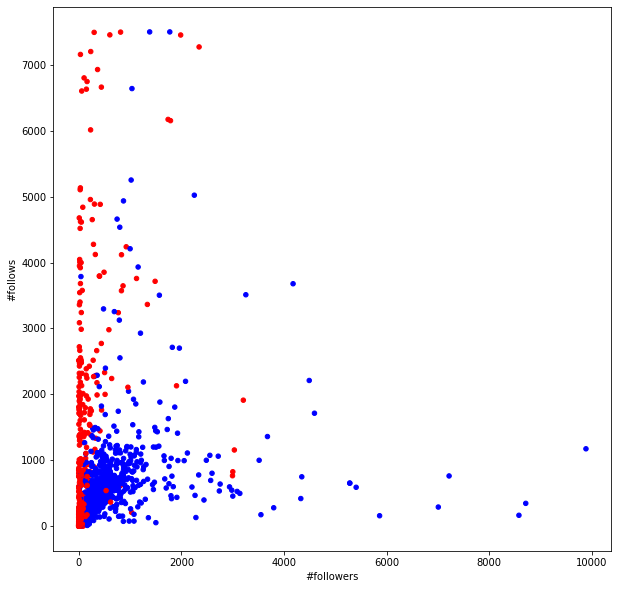

In [ ]:
account_color_map ={0:"blue", 1:"red"}
account_colors= dataset3["fake"].map(account_color_map)
tmp = dataset3

tmp.plot.scatter("#followers", "#follows", c=tmp["fake"].map(account_color_map), figsize=(10,10))

Come previsto gli account falsi hanno un un numero maggiore di follows e pochi followers. Negli account veri si nota il contrario, tranne per alcune eccezioni dove il numero di followers é molto elevato (probabilmente si tratta di account molto famosi). Queste eccezioni sono state escluse dal grafico per facilitarne la visualizzazione.

## PARTE 2

Si effettua lo studio sui coefficienti più rilevanti del dataset3, procedendo come per gli altri due dataset.

In [ ]:
y3 = dataset3["fake"]
x3 = dataset3.drop(["fake"], axis=1)

In [ ]:
X_pre_train3, X_pre_val3, y_pre_train3, y_pre_val3 = train_test_split(
    x3,
    y3,
    test_size=1/3, random_state=42
)

In [ ]:
def get_coefficients(model, index, model_name="model"):
    return pd.Series(model.named_steps[model_name].coef_[0], index=index)
    
def fit(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    f1_measure = f1_score( y_val,  model.predict(X_val), average="macro")
    print("F1_measure: ", f1_measure)

In [ ]:
model_coeffs = []
i = 0

for alpha in np.logspace(-4, 0, 5):
    print("alpha {} :\n".format(alpha))
    model = Pipeline([("scaler", StandardScaler()), ("model",  Perceptron(random_state=42, penalty="l1", class_weight={1:3},alpha=alpha))
    ])
    fit(model, X_pre_train3, y_pre_train3, X_pre_val3, y_pre_val3)
    model_coeffs.append(get_coefficients(model, X_pre_train3.columns))
    i += 1
    print("\n")

alpha 0.0001 :

F1_measure:  0.8513200583035547


alpha 0.001 :

F1_measure:  0.8736691236691236


alpha 0.01 :

F1_measure:  0.8273535629896779


alpha 0.1 :

F1_measure:  0.7807890174231873


alpha 1.0 :

F1_measure:  0.24108241082410822




In [ ]:
std_pen_model3 = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Perceptron( random_state=42, class_weight={1:3}, penalty="l1", alpha=0.001))
])

fit(std_pen_model3, X_pre_train3, y_pre_train3, X_pre_val3, y_pre_val3)

F1_measure:  0.8736691236691236


In [ ]:
std_pen_model_coeff3 = get_coefficients(std_pen_model3, X_pre_train3.columns)
std_pen_model_coeff3

profile pic             -5.343934
nums/length username     9.403515
description length      -0.496029
private                 -2.827827
#posts                  -6.177083
#followers             -13.975752
#follows                 4.331970
dtype: float64

L'analisi, a seguito di standardizzazione l1 con alpha=0.001(che produce il miglior f1_score con perceptron), rivela che la feature più irrilevante è *description length*. La più importante è il numero di follwer, seguita dal numero di post e di follows.

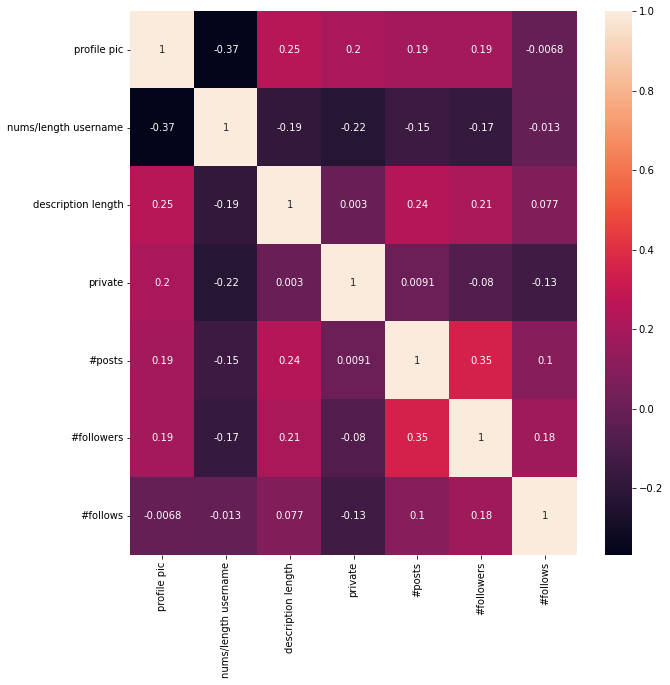

In [ ]:
pearson_correlation = X_pre_train3.corr(method='pearson')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sb.heatmap(pearson_correlation, annot=True)

plt.show()

Non si evidenziano rilevanti correlazioni.

Il seguente grafico mostra la distribuzione degli account veri e falsi al variare delle feature più importanti: *#follows*, *#followers* e *#posts*. Tale distribuzione è molto simile a quella studiata precdentemente negli altri dataset.

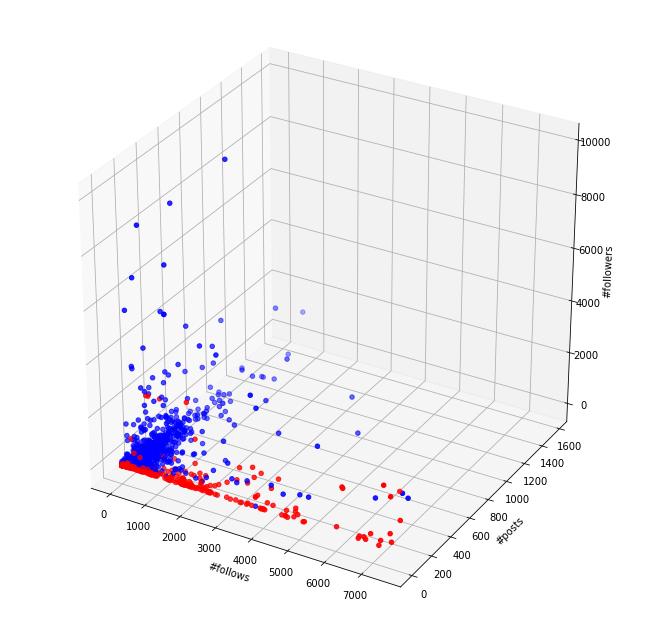

In [ ]:
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(2,2,1,projection='3d')
x = "#follows"
z = "#followers"
y = "#posts"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
tmp = dataset3[dataset3["#followers"] < 15000]
account_colors= tmp["fake"].map(account_color_map)
ax.scatter(tmp[x], tmp[y], tmp[z], c=account_colors)


## PARTE 3

In questa parte si confrontano i diversi modelli, così come fatto precedentemente.

### Perceptron

In [ ]:
%%time

per_model = Pipeline([
    ("scaler", StandardScaler()),
    ("per", Perceptron(n_jobs=-1, random_state=42, class_weight={1:3}))
])

#print(per_model.get_params())

per_grid = {
    "scaler": [None, StandardScaler()],
    "per__penalty": ["l2", "l1", "elasticnet"],
    "per__alpha": np.logspace(-3, 3, 7),
    "per__fit_intercept": [False, True]
}

per_model3, score = grid_search_with_cross_validation(per_model, per_grid, k_fold, dataset3, "fake", scoring = "f1_macro")
models["Perceptron3"] = {"Model": per_model, "Score": score}


Best cross validation score: 0.8777132886037758

             Test set score: 0.8273535629896779

                Best params: {'per__alpha': 0.01, 'per__fit_intercept': True, 'per__penalty': 'l1', 'scaler': StandardScaler()}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.01, class_weight={1: 3}, n_jobs=-1,
                            penalty='l1', random_state=42))])

CPU times: user 1.33 s, sys: 76.8 ms, total: 1.4 s
Wall time: 4.88 s


In [ ]:
model3 =Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.01, class_weight={1: 3}, n_jobs=-1,
                            penalty='l1', random_state=42))])

model3.fit(X_pre_train3, y_pre_train3)
f1_measure = f1_score( y_pre_val3,  model3.predict(X_pre_val3), average="macro")

models["Perceptron3"] = {"Model": model3, "Score": f1_measure}


In [ ]:
y_pred3 = model3.predict(X_pre_val3)
measureModel(X_pre_val3, y_pre_val3, y_pred3, model3)

Accuracy: 0.8541329011345219

Precision fake: 0.797752808988764

Precision real: 0.876993166287016

Recall fake: 0.7244897959183674

Recall real: 0.9144893111638955

f1_measure: 0.8273535629896779



In [ ]:
model3.named_steps["per"].coef_

array([[-1.81426301,  0.11798729, -5.93671817,  0.        ,  0.        ,
        -8.91023545, 13.78121505]])

In [ ]:
hidden=[3,4]

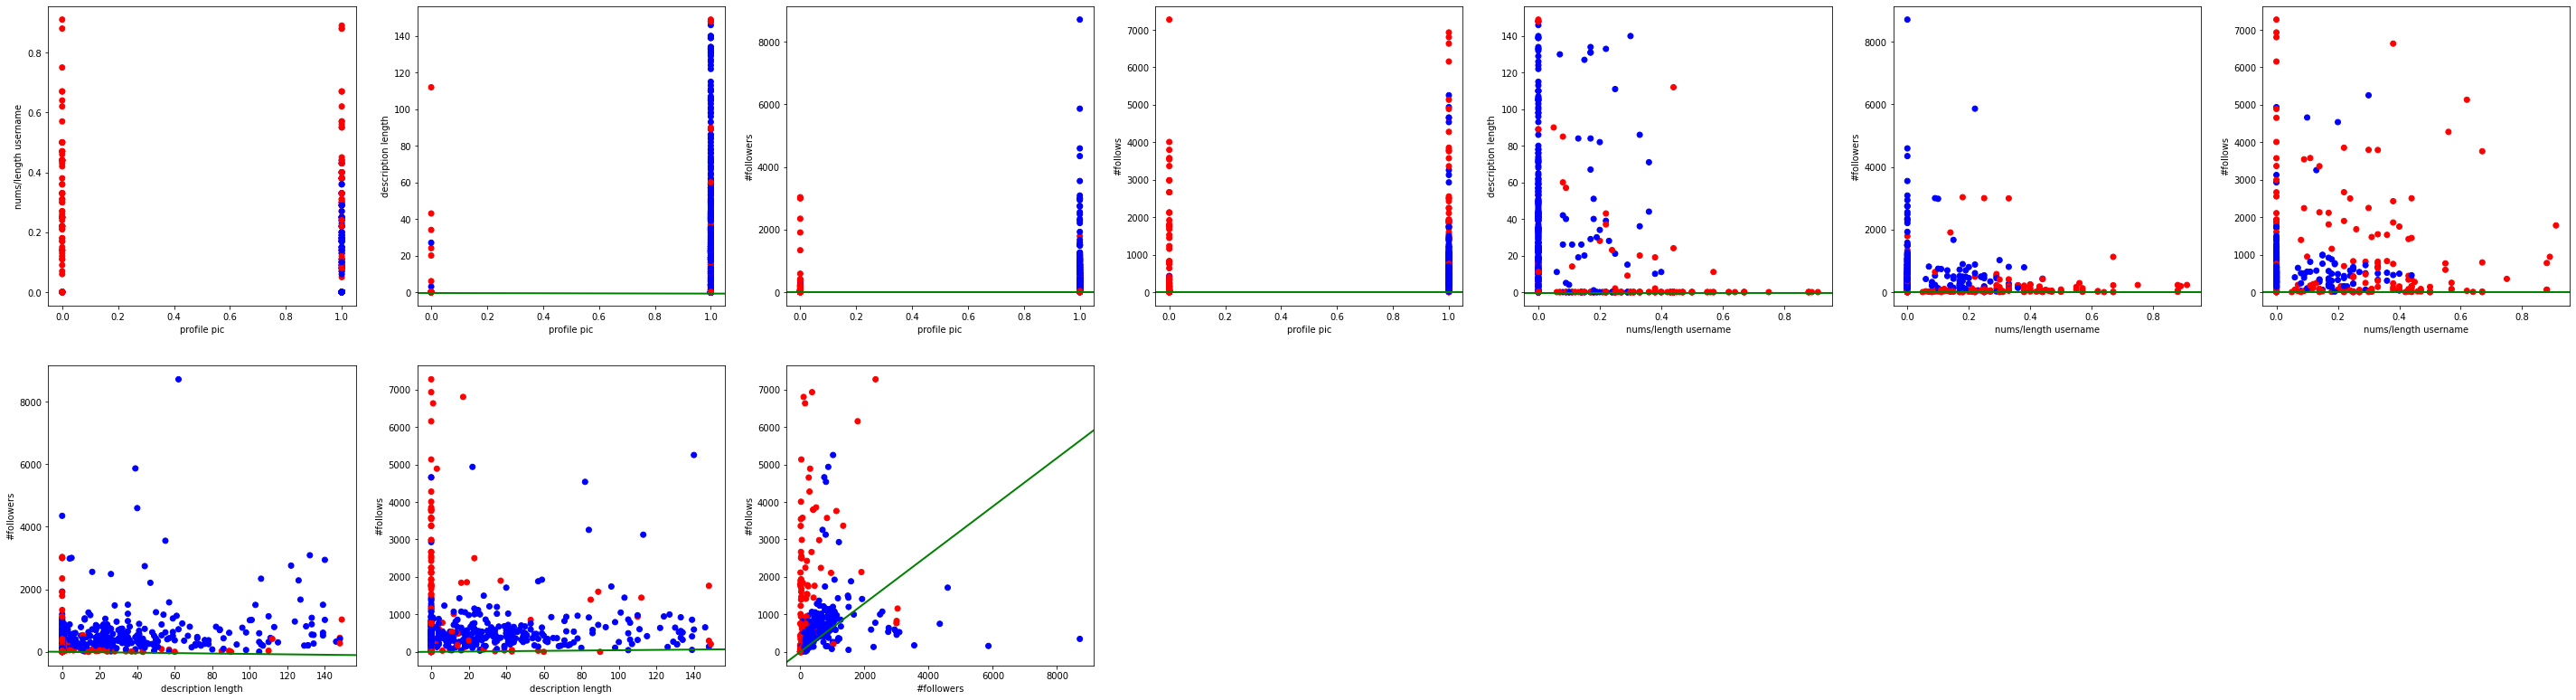

In [ ]:
plot_separator_on_data(X_pre_val3, y_pre_val3, dataset3 ,hidden, model3, "per", repeatCombination = False)

Il perceptron ha ottenuto l'f1_measure più basso rispetto al dataset2 e al dataset1.

### Regressione Logistica

In [ ]:
%%time

log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver='liblinear', class_weight={1:3}, random_state=42))
])

#print(log_model.get_params())

log_grid = {
    "scaler": [None, StandardScaler()],
    "lr__penalty": ["l2", "l1"],
    "lr__C": np.logspace(-4, 2, 7),
    "lr__fit_intercept": [False, True]
}

log_model, score = grid_search_with_cross_validation(log_model, log_grid, k_fold, dataset3,"fake", scoring = "f1_macro")
models["Logistic Regression3"] = {"Model" : log_model, "Score": score}

Best cross validation score: 0.9133589480963069

             Test set score: 0.8998641533023971

                Best params: {'lr__C': 1.0, 'lr__fit_intercept': True, 'lr__penalty': 'l2', 'scaler': None}

             Best estimator: Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(class_weight={1: 3}, random_state=42,
                                    solver='liblinear'))])

CPU times: user 904 ms, sys: 22.3 ms, total: 927 ms
Wall time: 5.09 s


In [ ]:
log_model3 = Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(class_weight={1: 3}, random_state=42,
                                    solver='liblinear'))])

log_model3.fit(X_pre_train3, y_pre_train3)
f1_measure = f1_score( y_pre_val3,  log_model3.predict(X_pre_val3), average="macro")
models["Logistic Regression3"] = {"Model" : log_model3, "Score": f1_measure}

In [ ]:
y_pred3 = log_model3.predict(X_pre_val3)
measureModel(X_pre_val3, y_pre_val3, y_pred3, log_model3)

Accuracy: 0.9124797406807131

Precision fake: 0.8514851485148515

Precision real: 0.9421686746987952

Recall fake: 0.8775510204081632

Recall real: 0.9287410926365796

f1_measure: 0.8998641533023971



In [ ]:
print(log_model3.named_steps['lr'].intercept_)
log_model3.named_steps["lr"].coef_

[3.44011397]


array([[-3.16810975e+00,  6.24756770e+00, -1.09667865e-02,
        -1.04123403e+00, -1.26418408e-02, -5.83896610e-03,
         1.67660572e-03]])

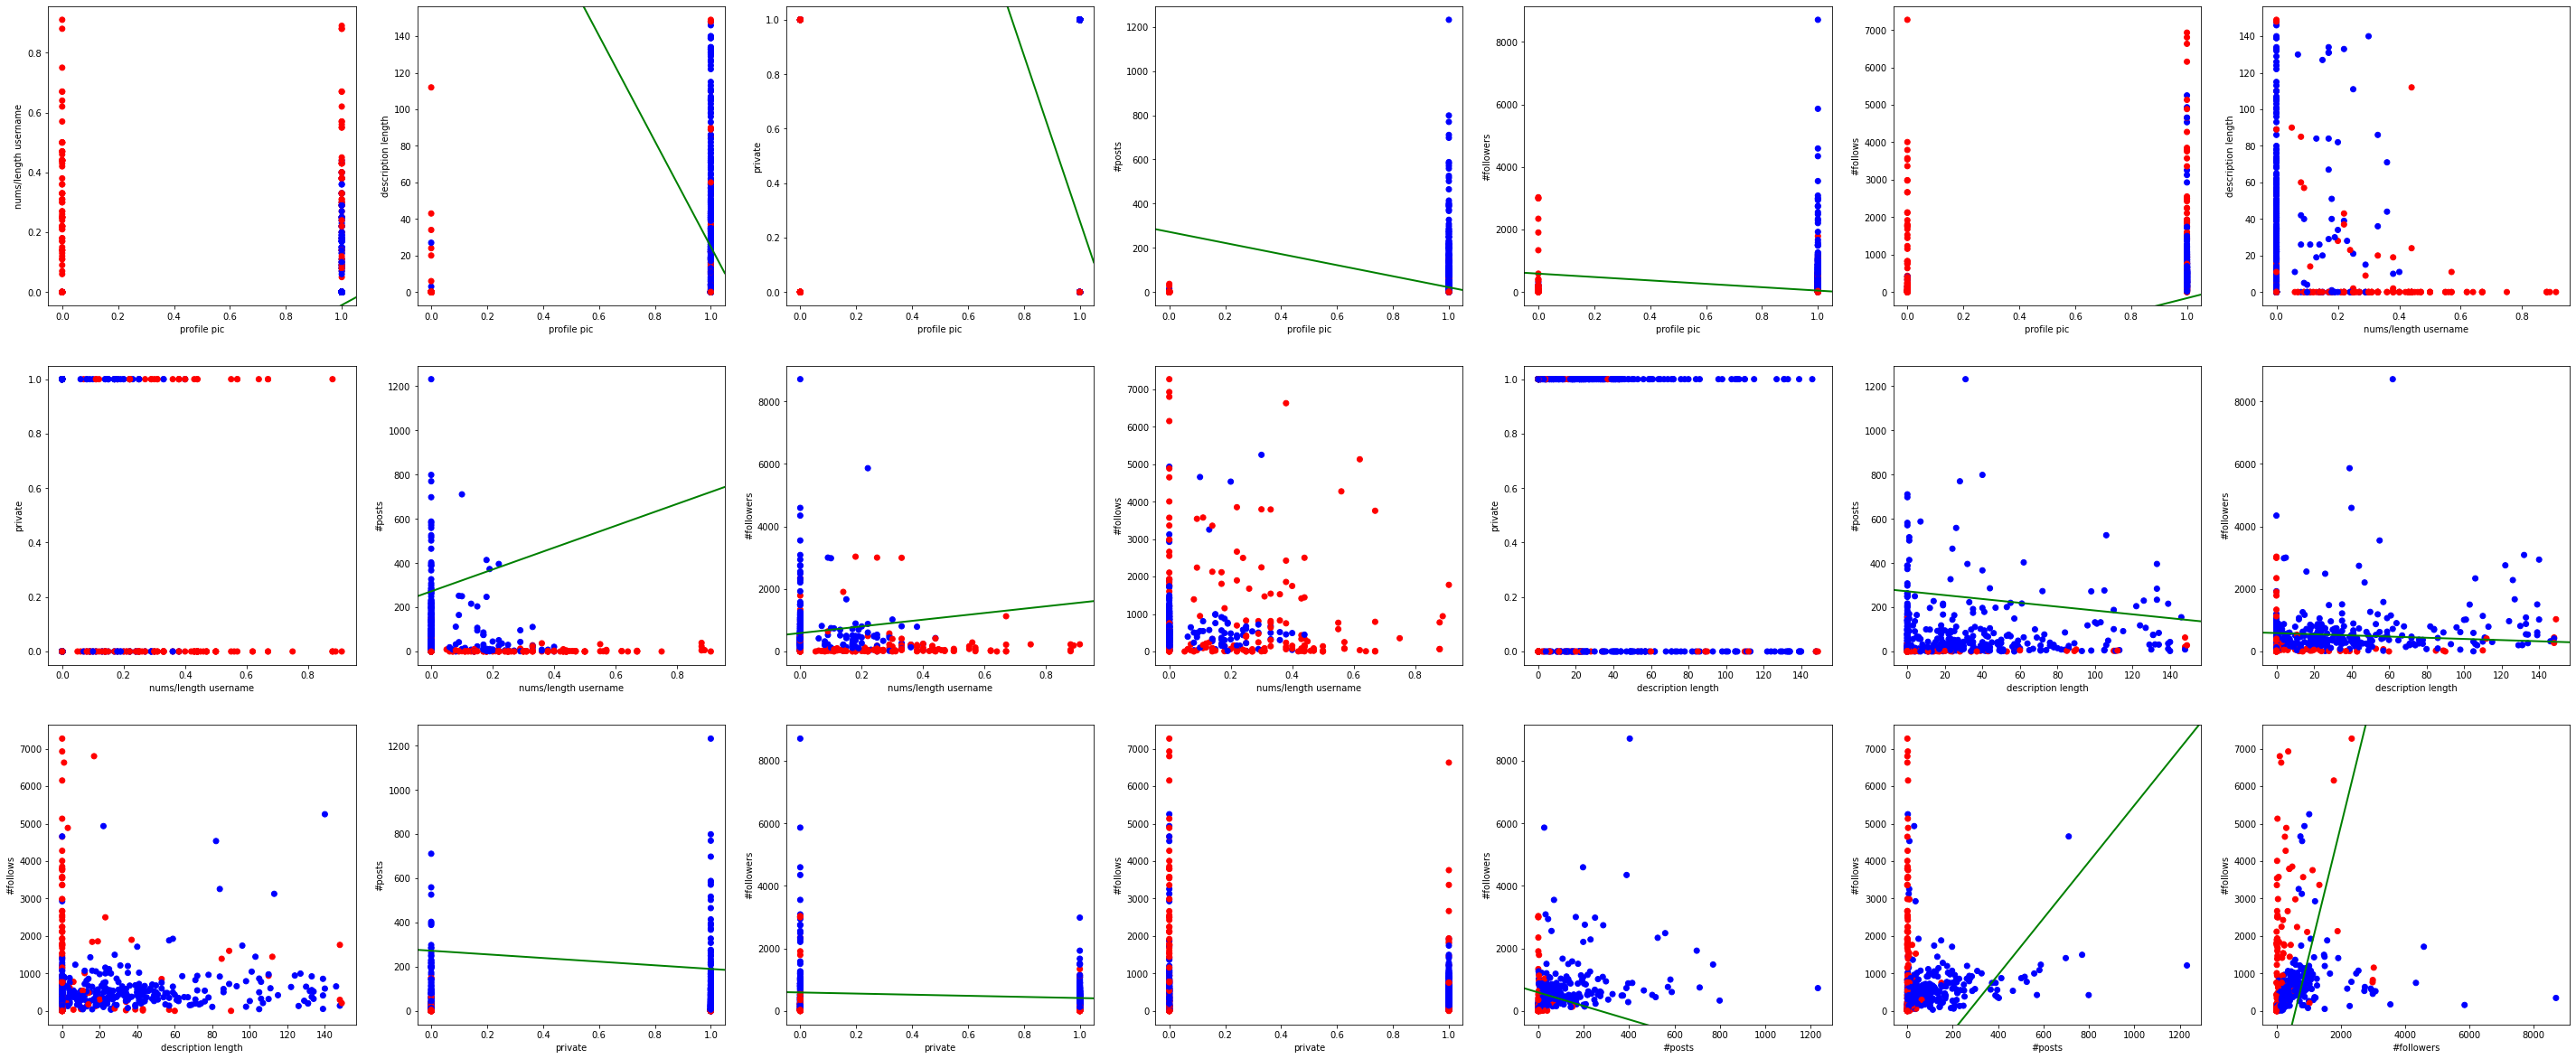

In [ ]:
plot_separator_on_data(X_pre_val3, y_pre_val3, dataset3 ,[], log_model3, "lr", repeatCombination = False)

Anche la regressione logistica ha restituito un risultato peggiore rispetto al dataset1 e dataset2.

### Support Vector Machine

In [ ]:
%%time

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=42, class_weight={1:3}))
])

#print(svm_model.get_params())

svm_grid = [
  {'svc__C': np.logspace(3, 5, 3), 'svc__kernel': ['linear']},
  {'svc__C': np.logspace(3, 5, 3), 'svc__gamma': ['scale'], 'svc__kernel': ['rbf']},
]

svm_model, score= grid_search_with_cross_validation(svm_model, svm_grid, k_fold,  dataset3, "fake",  scoring = "f1_macro")
models["Support Vector Machine3"] = {"Model": svm_model, "Score": score}

Best cross validation score: 0.9104836431351199

             Test set score: 0.8901555498559165

                Best params: {'svc__C': 100000.0, 'svc__kernel': 'linear'}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=100000.0, class_weight={1: 3}, kernel='linear',
                     random_state=42))])

CPU times: user 46.1 s, sys: 267 ms, total: 46.4 s
Wall time: 6min 4s


In [ ]:
svm_model3 =  Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=100000.0, class_weight={1: 3}, kernel='linear',
                     random_state=42))])

svm_model3.fit(X_pre_train3, y_pre_train3)
f1_measure = f1_score( y_pre_val3,  svm_model3.predict(X_pre_val3), average="macro")
models["Support Vector Machine3"] = {"Model": svm_model3, "Score": f1_measure}

In [ ]:
y_pred3 = svm_model3.predict(X_pre_val3)
measureModel(X_pre_val3, y_pre_val3, y_pred3, svm_model3)

Accuracy: 0.9043760129659644

Precision fake: 0.8442211055276382

Precision real: 0.9330143540669856

Recall fake: 0.8571428571428571

Recall real: 0.9263657957244655

f1_measure: 0.8901555498559165



In [ ]:
svm_model3.named_steps["svc"].coef_

array([[-0.67301563,  1.08654299, -0.27630174, -0.29255833, -1.11460738,
        -3.0810643 ,  1.42365015]])

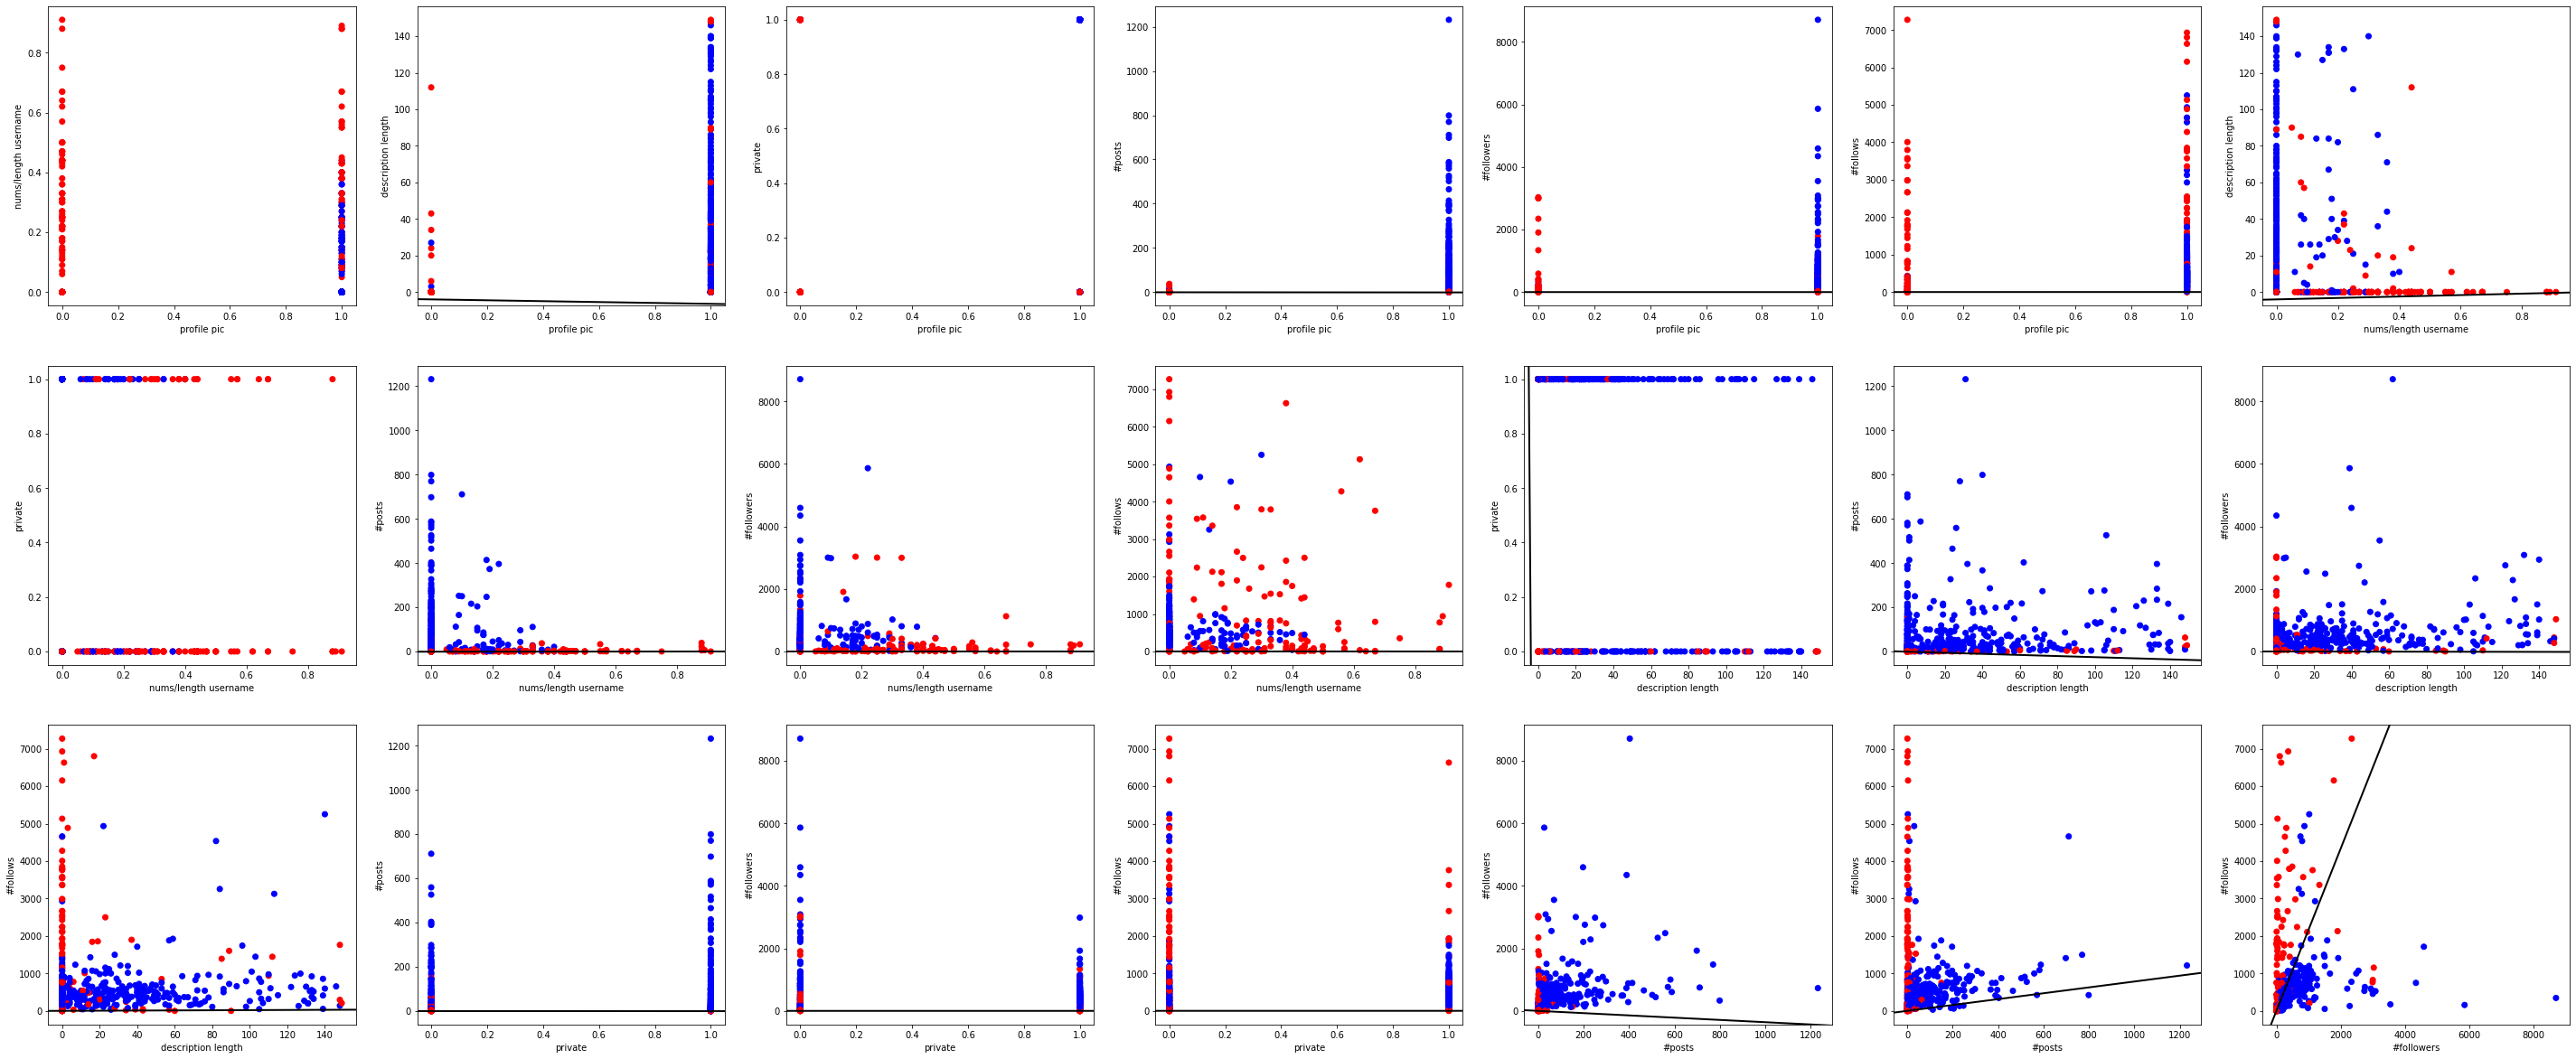

In [ ]:
plot_separator_on_data(X_pre_val3, y_pre_val3, dataset3 ,[], svm_model3, "svc", lineColor="black", repeatCombination = False)

In questo caso, il support vector machine ha restituito un risultato migliore del dataset1 ma comunque peggiore del dataset2.

## PARTE 4

In [ ]:
def difference_between_two_models(error1, error2, confidence, y_val):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

per_error = 1 - models["Perceptron3"]["Score"]
lre_error = 1 - models["Logistic Regression3"]["Score"]
svm_error = 1 - models["Support Vector Machine3"]["Score"]

print("Support Vector Machine vs Logistic Regression, intervallo di confidenza:")
difference_between_two_models(svm_error, lre_error, 0.95,  y_pre_val3)

print("Support Vector Machine vs Perceptron, intervallo di confidenza:")
difference_between_two_models(svm_error, per_error, 0.95, y_pre_val3)

print("Logistic Regression vs Perceptron, intervallo di confidenza:")
difference_between_two_models( lre_error, per_error, 0.95, y_pre_val3)


Support Vector Machine vs Logistic Regression, intervallo di confidenza:
Valore minimo: -0.018994799927812223
Valore massimo: 0.03841200682077345

Support Vector Machine vs Perceptron, intervallo di confidenza:
Valore minimo: 0.030319520729951706
Valore massimo: 0.09528445300252553

Logistic Regression vs Perceptron, intervallo di confidenza:
Valore minimo: 0.040550025110021676
Valore massimo: 0.10447115551541677



Support Vector Machine(f1_score=0.890) e Logistic Regression(f1_score=0.899) danno un risultato simile.

In [ ]:
print("F1_measure Perceptron: ", models["Perceptron3"]["Score"])
print("F1_measure Logistic Regression: ", models["Logistic Regression3"]["Score"])
print("F1_measure Support Vector Machine: ", models["Support Vector Machine3"]["Score"])


F1_measure Perceptron:  0.8273535629896779
F1_measure Logistic Regression:  0.8998641533023971
F1_measure Support Vector Machine:  0.8901555498559165


In [ ]:
def confusion_matrix_calculation(model):
    return confusion_matrix(y_pre_val3, model.predict(X_pre_val3))


In [ ]:
def confidence(acc, N, Z):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

def calculate_accuracy(conf_matrix):
    return np.diag(conf_matrix).sum() / conf_matrix.sum().sum()

In [ ]:
conf_perc3 = pd.DataFrame(confusion_matrix_calculation(model3))
conf_log_reg3 = pd.DataFrame(confusion_matrix_calculation(log_model3))
conf_SVM3 = pd.DataFrame(confusion_matrix_calculation(svm_model3))


In [ ]:
#con confidenza del 0.95 si ha Z=1.96
pd.DataFrame([confidence(calculate_accuracy(conf_perc3), len(X_pre_val3), 1.96),
              confidence(calculate_accuracy(conf_log_reg3), len(X_pre_val3), 1.96),
              confidence(calculate_accuracy(conf_SVM3), len(X_pre_val3), 1.96)],
                 index=["perceptron", "logreg", "SVM"], columns=["inf", "sup"])

inf       sup
perceptron  0.824090  0.879794
logreg      0.887552  0.932303
SVM         0.878606  0.925141

Dagli intervalli di confidenza al 95% abbiamo la conferma che Regressione logistica è il modello più accurato.

In [ ]:
hidden = [0,1,2,3,4]

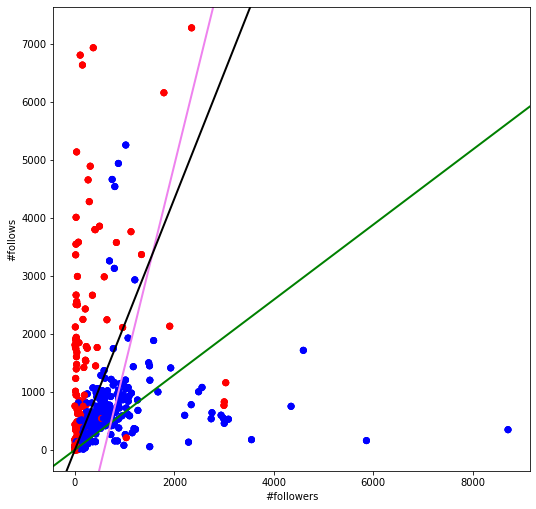

In [ ]:
plt.figure(figsize=(70, 70))
plot_separator_on_data(X_pre_val3, y_pre_val3, dataset3 ,hidden, models["Perceptron3"]["Model"], "per", repeatCombination=False, newFig = False, lineColor="green")
plot_separator_on_data(X_pre_val3, y_pre_val3, dataset3 ,hidden, models["Logistic Regression3"]["Model"], "lr", repeatCombination=False, newFig = False, lineColor="violet")
plot_separator_on_data(X_pre_val3, y_pre_val3, dataset3,hidden, models["Support Vector Machine3"]["Model"], "svc", repeatCombination=False, newFig = False, lineColor="black")


## PARTE 5

Dopo aver studiato il dataset3, siamo giunti alla conclusione che i risultati non sono troppo buoni. Ciò non ci sorprende: le feature del dataset1 e dataset2 erano abbastanza diverse fra di loro, infatti, molto probabilmente, per il dataset2 sono stati considerati profili di persone molto famose, a differenza del dataset1. Addestrare i modelli partendo quindi da un dataset così disparato non poteva effettuare miglioramenti rispetto ai modelli ottenuti 
rispetto ai singoli dataset. 

# Conclusione

In [ ]:
nostri_account =  pd.read_csv("dataset_nostri_profili_real.csv")
nostri_account_fake = pd.read_csv("dataset_nostri_profili_fake.csv")

Alla luce degli studi dei diversi modelli e dei diversi dataset, è risultato che la predizione migliore si ottiene utilizzando la Regressione Logistica sul nuovo dataset2 (f1_score= 0.945), ovvero il dataset ottenuto eliminando dal dataset2 le istanze con un numero di follower molto alto. Andiamo dunque a testare il Logistic Regression addestrato col dataset2 con i nostri profili Instagram ( e altri falsi cercati da noi), per verificare, con dati mai inseriti, che il modello funzioni.

In [ ]:
nostri_account.rename(columns = {'followersCount':'#followers', 'followsCount':'#follows', 'biography': 'description length',
                           'postsCount': '#posts','profilePicUrl': 'profile pic', 'private':'private',  'username': 'nums/length username',
                           'fullName':'fullname words' , 'externalUrl':'external URL', }, inplace = True)

nostri_account_fake.rename(columns = {'followersCount':'#followers', 'followsCount':'#follows', 'biography': 'description length',
                           'postsCount': '#posts','profilePicUrl': 'profile pic', 'private':'private',  'username': 'nums/length username',
                           'fullName':'fullname words' , 'externalUrl':'external URL', }, inplace = True)

In [ ]:
nostri_account["fake"] = 0

In [ ]:
nostri_account_fake["fake"] = 1

In [ ]:
dataset_nostri_account =  nostri_account.append(nostri_account_fake, ignore_index=True)

In [ ]:
dataset_nostri_account = pd.DataFrame(dataset_nostri_account, columns=dataset2.columns)


In [ ]:
dataset_nostri_account["name==username"] = np.where( dataset_nostri_account['fullname words'] == dataset_nostri_account["nums/length username"], 1,0)

In [ ]:
count = 0
for i in range(len(dataset_nostri_account)):
  count=0;
  if (dataset_nostri_account["nums/length username"][i] is np.NaN):
    dataset_nostri_account["nums/length username"][i] =0
  else:
    for let in dataset_nostri_account["nums/length username"][i]:
      if let.isdigit():
          count+=1;
    dataset_nostri_account["nums/length username"][i] = (float)(count/(len(dataset_nostri_account["nums/length username"][i])));
    

In [ ]:
count = 0
for i in range(len(dataset_nostri_account)):
  count=0;
  print(dataset_nostri_account["fullname words"][i])
  if (dataset_nostri_account["fullname words"][i] is np.NaN):
    dataset_nostri_account["nums/length fullname"][i] =0
  else:
    for let in dataset_nostri_account["fullname words"][i]:
      if let.isdigit():
          count+=1;
    print(count)
    dataset_nostri_account["nums/length fullname"][i] = (float)(count/(len(dataset_nostri_account["fullname words"][i])));
    

Slow Food International
0
Ministero della Salute
0
Università di Bologna
0
Angelica Solipaca
0
Campus di Cesena UNIBO
0
Associazione S.P.R.I.Te.
0
ingegneriadelsuicidio
0
enrique lopez
0
nan
اسلام سلامه
0
nan
john
0


In [ ]:
count = 0
for i in range(len(dataset_nostri_account)):
  count=0;
  if (dataset_nostri_account["fullname words"][i] is np.NaN):
    dataset_nostri_account["fullname words"][i] = 0
  else:
    print(dataset_nostri_account["fullname words"][i])
    word_list = dataset_nostri_account["fullname words"][i].split();
    dataset_nostri_account["fullname words"][i] = len(word_list)
    


Slow Food International
Ministero della Salute
Università di Bologna
Angelica Solipaca
Campus di Cesena UNIBO
Associazione S.P.R.I.Te.
ingegneriadelsuicidio
enrique lopez
اسلام سلامه
john


In [ ]:
def removeNan(feature):
  for i in range(len(dataset_nostri_account)):
    if (dataset_nostri_account[feature][i] is np.NaN):
        dataset_nostri_account[feature][i] = 0
    else:
        dataset_nostri_account[feature][i] = 0

In [ ]:
removeNan("profile pic")
removeNan("external URL")

In [ ]:
for i in range(len(dataset_nostri_account)):
  if (dataset_nostri_account["private"][i] is False):
      dataset_nostri_account["private"][i] = 0
  else:
      dataset_nostri_account["private"][i] = 1


In [ ]:
dataset_nostri_account["description length"] = dataset_nostri_account["description length"].fillna("")

In [ ]:
count = 0
for i in range(len(dataset_nostri_account)):
  if (dataset_nostri_account["description length"][i] == ""):
    dataset_nostri_account["description length"][i] = 0
  else:
    dataset_nostri_account["description length"][i] = len(dataset_nostri_account["description length"][i])


In [ ]:
dataset_nostri_account["#posts"] = dataset_nostri_account["#posts"].fillna(0)
dataset_nostri_account["#followers"] = dataset_nostri_account["#followers"].fillna(0)
dataset_nostri_account["#follows"] = dataset_nostri_account["#follows"].fillna(0)


In [ ]:
dataset_nostri_account

profile pic nums/length username fullname words  nums/length fullname  \
0            0                  0.0              3                   0.0   
1            0                  0.0              3                   0.0   
2            0                  0.0              3                   0.0   
3            0                  0.0              2                   0.0   
4            0                  0.0              4                   0.0   
5            0                  0.0              2                   0.0   
6            0                  0.0              1                   0.0   
7            0             0.714286              2                   0.0   
8            0                 0.25              0                   0.0   
9            0                  0.5              2                   0.0   
10           0             0.428571              0                   0.0   
11           0             0.214286              1                   0.0   

    name==username description length external URL private  #posts  \
0                0                 95            0       1    2164   
1                0                 58            0       0     310   
2                0                 84            0       0    1174   
3                0                  0            0       0      22   
4                0                113            0       0     217   
5                0                128            0       0     107   
6                1                139            0       0    3851   
7                0                  0            0       1       0   
8                0                  0            0       1       0   
9                0                  0            0       1       0   
10               0                  0            0       1       1   
11               0                  0            0       0       0   

    #followers  #follows  fake  
0        83563      1532     0  
1       633938        31     0  
2       115865       150     0  
3         1263      1040     0  
4         2173        21     0  
5          914      1348     0  
6       155256        16     0  
7            0       645     1  
8           63      1070     1  
9          416      1172     1  
10           2       863     1  
11          89       318     1

In [ ]:
y_to_predict = dataset_nostri_account["fake"]

In [ ]:
y_to_predict 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
Name: fake, dtype: int64

In [ ]:
X_nostri_account = dataset_nostri_account.drop("fake", axis=1)

Di seguito, vengoni messi a confronto le predizioni dei modelli del dataset2 e del nuovo dataset2 e confrontati il vero output.

Modello SVM ottenuto dall'addestramento col nuovo dataset2 (quello che aveva restituito l'f1_measure migliore).

In [ ]:
new_svm_y = new_svm_model2.predict(X_nostri_account)
pd.DataFrame(list(zip(y_to_predict, new_svm_y)),
               columns =['Real class', 'Predicted class'])

Real class  Predicted class
0            0                0
1            0                0
2            0                0
3            0                0
4            0                0
5            0                0
6            0                0
7            1                1
8            1                1
9            1                1
10           1                1
11           1                1

Modello Perceptron ottenuto dall'addestramento col dataset2.

In [ ]:
per_y = model2.predict(X_nostri_account)
pd.DataFrame(list(zip(y_to_predict, per_y)),
               columns =['Real class', 'Predicted class'])

Real class  Predicted class
0            0                0
1            0                0
2            0                0
3            0                1
4            0                0
5            0                0
6            0                0
7            1                1
8            1                1
9            1                1
10           1                1
11           1                1

Modello Logistic Regression ottenuto dall'addestramento col dataset2.

In [ ]:
log_y = log_model2.predict(X_nostri_account)
pd.DataFrame(list(zip(y_to_predict, log_y)),
               columns =['Real class', 'Predicted class'])

Real class  Predicted class
0            0                0
1            0                0
2            0                0
3            0                0
4            0                0
5            0                0
6            0                0
7            1                1
8            1                1
9            1                1
10           1                1
11           1                1

Modello SVM ottenuto dall'addestramento col dataset2.

In [ ]:
svm_y = svm_model2.predict(X_nostri_account)
pd.DataFrame(list(zip(y_to_predict, svm_y)),
               columns =['Real class', 'Predicted class'])

Real class  Predicted class
0            0                0
1            0                0
2            0                0
3            0                1
4            0                0
5            0                1
6            0                0
7            1                1
8            1                1
9            1                1
10           1                1
11           1                1

Modello Perceptron ottenuto dall'addestramento col nuovo dataset2.

In [ ]:
new_per_y = new_per_model2.predict(X_nostri_account)
pd.DataFrame(list(zip(y_to_predict, new_per_y)),
               columns =['Real class', 'Predicted class'])

Real class  Predicted class
0            0                0
1            0                0
2            0                0
3            0                0
4            0                0
5            0                0
6            0                0
7            1                1
8            1                1
9            1                1
10           1                1
11           1                1

Modello Logistic Regression ottenuto dall'addestramento col nuovo dataset2.

In [ ]:
new_log_y = new_log_model2.predict(X_nostri_account)
pd.DataFrame(list(zip(y_to_predict, new_log_y)),
               columns =['Real class', 'Predicted class'])

Real class  Predicted class
0            0                0
1            0                0
2            0                0
3            0                1
4            0                0
5            0                0
6            0                0
7            1                1
8            1                1
9            1                1
10           1                1
11           1                1

In [ ]:
hidden =[0,2,3,4,5,6,7,9,10]

Il seguente grafico rappresenta le tre rette generate dai tre modelli del nuovo dataset2, sovrapposte al nostro dataset. 

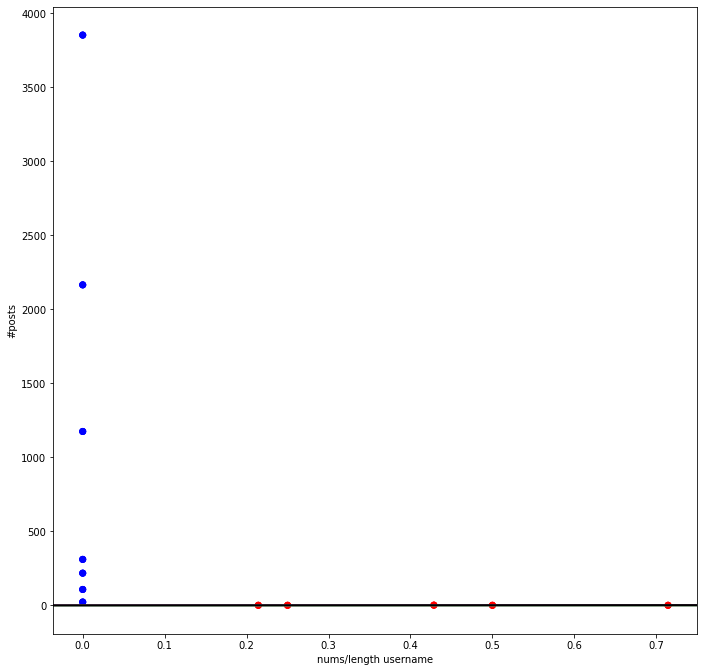

In [ ]:
yff =dataset_nostri_account[dataset_nostri_account["#followers"] < 2000000]["fake"]
xff = dataset_nostri_account[dataset_nostri_account["#followers"] < 2000000].drop(["fake"], axis=1)

plt.figure(figsize=(150, 150))
plot_separator_on_data(xff, yff, dataset_nostri_account, hidden, new_svm_model2, 
                       "svc", lineColor="green", newFig= False, repeatCombination=False)
plot_separator_on_data(xff, yff, dataset_nostri_account, hidden, new_per_model2,
                       "per", lineColor="violet", newFig= False, repeatCombination=False)
plot_separator_on_data(xff, yff, dataset_nostri_account, hidden, new_log_model2,
                       "lr", lineColor="black", newFig= False, repeatCombination=False)

In [ ]:
hidden =[0,1,2,3,4,5,6,7,8]

Il seguente grafico rappresenta le tre rette generate dai tre modelli del dataset2, sovrapposte al nostro dataset. 

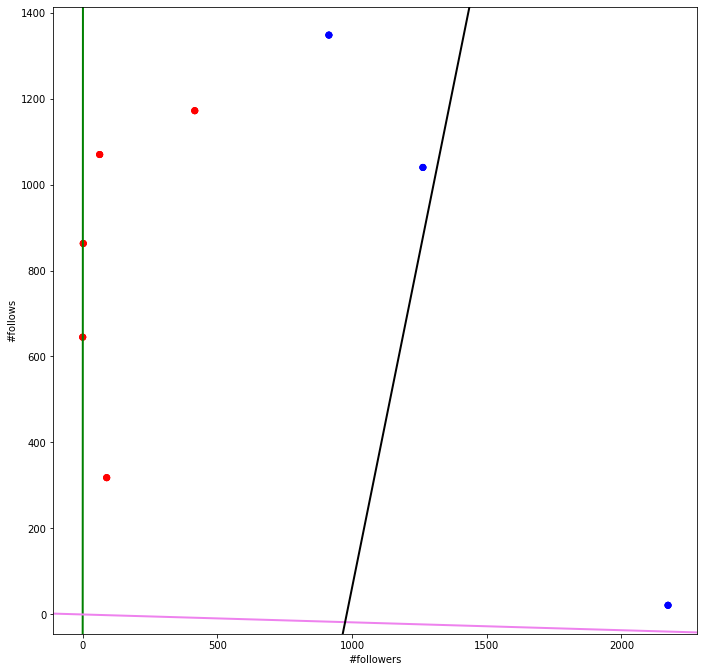

In [ ]:
yff =dataset_nostri_account[dataset_nostri_account["#followers"] < 20000]["fake"]
xff = dataset_nostri_account[dataset_nostri_account["#followers"] < 20000].drop(["fake"], axis=1)

plt.figure(figsize=(150, 150))
plot_separator_on_data(xff, yff, dataset_nostri_account, hidden, svm_model2, 
                       "svc", lineColor="green", newFig= False, repeatCombination=False)
plot_separator_on_data(xff, yff, dataset_nostri_account, hidden, model2,
                       "per", lineColor="violet", newFig= False, repeatCombination=False)
plot_separator_on_data(xff, yff, dataset_nostri_account, hidden, log_model2,
                       "lr", lineColor="black", newFig= False, repeatCombination=False)

La seguente funzione realizza un grafico tridimensionale e il relativo piano di separazione delle classi.


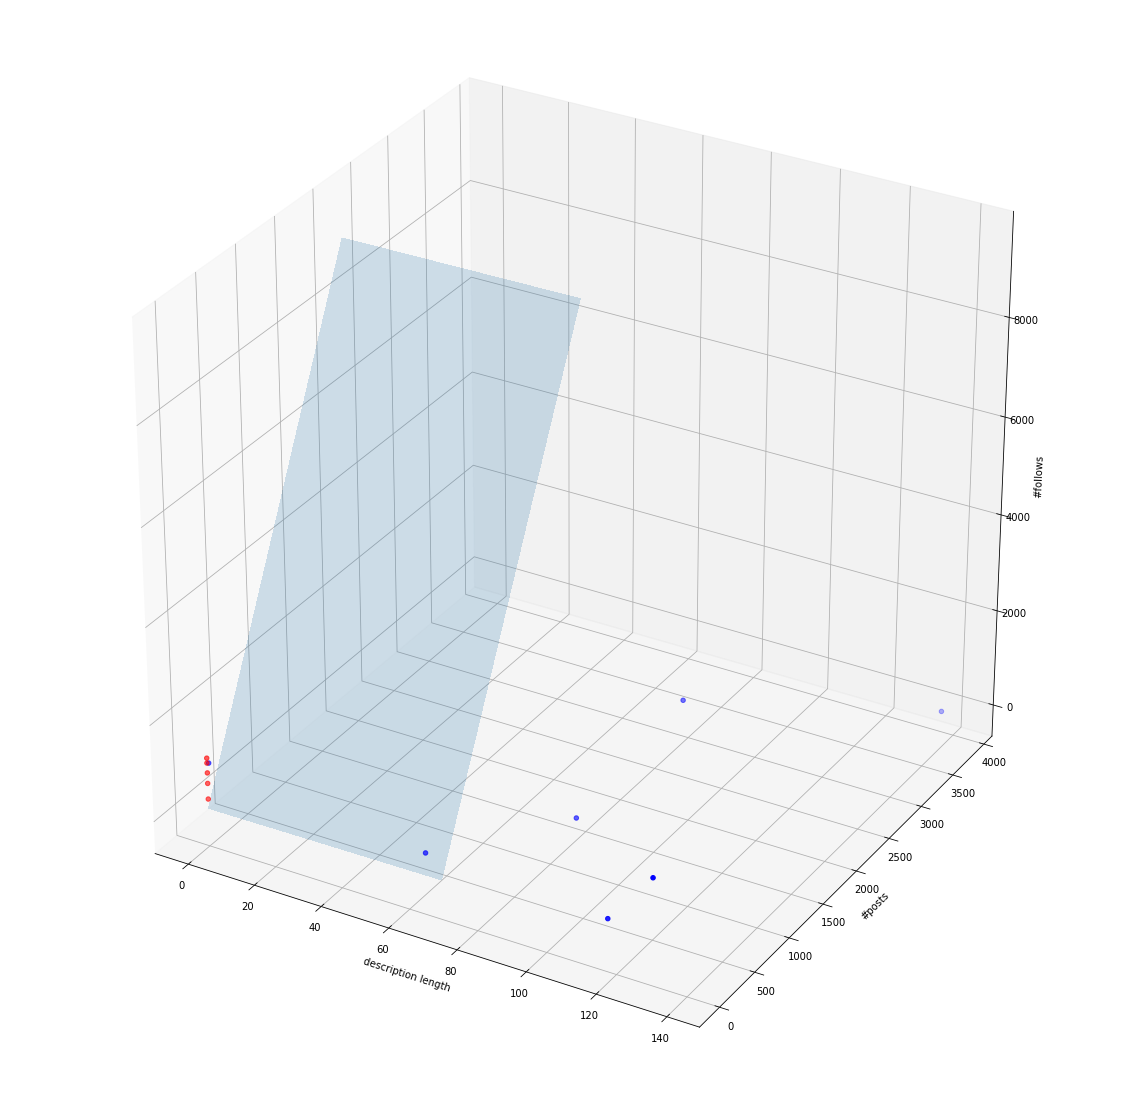

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')

tmp = dataset_nostri_account
xi = 5
yi = 8
zi = 10
x = tmp.columns[xi]
y = tmp.columns[yi]
z = tmp.columns[zi]

fake =  "fake"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

account_colors= tmp[fake].map(account_color_map)
# Plot Curve Fit
# Create dataframe with of x_fit and y_fit

#print(tmp)

# Pass to the model's predict() method to return z-fit


#print(zz)

#ax.set_zlim(0,10000)

ax.scatter(tmp[x], tmp[y], tmp[z], c=account_colors)
xlim, ylim = plt.xlim(), plt.ylim()

X = np.arange(0, tmp[x].max(), tmp[x].max()/2)
Y = np.arange(0,tmp[y].max(), tmp[y].max()/2)
X, Y = np.meshgrid(X, Y)
Z = separator_3d(svm_model2, X, Y,"svc",xi,yi,zi)

Z = np.asarray(Z).reshape(-1, 2)

surf = ax.plot_surface(X,Y,Z, linewidth=0, antialiased=False, alpha = 0.2)
plt.show()